# Business Understanding

Many people feel lost when they need to sell their car. They do not know how to calculate the best selling price and, for example, how to make a fair deal. The price of a used car depends on many factors and variables, initially, you may think that it is easy but it is not. You must be sure of some variables that determine the real value of your car, but the problem is what are these variables?
With this work I intend to conclude which are the most important variables that one should look at when evaluating the price of your used car, and most importantly, I intend to define a model that, with great precision, can determine the price it has to mark a car us


# Data Understanding

Starts with an initial data collection and proceeds with activities in order to get familiar with the data, to identify data quality problems, to discover first insights into the data, or to detect interesting subsets to form hypotheses for hidden information.

## Import Library

In [3]:

# Data Treatment
# ==============================================================================
import pandas as pd
import numpy as np

# PLots
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import plotly.express as px
from xgboost import plot_tree
import graphviz
plt.rcParams["figure.figsize"] = (16,8)
%matplotlib inline

# Preprocessing and modelling
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.preprocessing import  StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
import shap

# Setting n matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Export data
# ==============================================================================

import joblib #saving the model
import json #exporting columns
import pickle #saving the model

# Settings warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Deep learning
# ==============================================================================
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from keras.layers import Dropout
from keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Installs
# ==============================================================================
#!pip install plotly
#!pip install cufflinks
#!pip install graphviz
#!pip install xgboost
#!pip install hyperopt
#!pip install shap


## Read Dataset

In [4]:
vehicles = pd.read_csv('vehicles.csv')

### How big dataset is, in volume? and How many rows and columns?

In [5]:
vehicles.head()

id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   

                   region                         region_url  price  year  \
0                prescott    https://prescott.craigslist.org   6000   NaN   
1            fayetteville       https://fayar.craigslist.org  11900   NaN   
2            florida keys        https://keys.craigslist.org  21000   NaN   
3  worcester / central MA   https://worcester.craigslist.org   1500   NaN   
4              greensboro  https://greensboro.craigslist.org   4900   NaN   

  manufacturer model condition cylinders  ... size  type paint_color  \
0          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
1          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
2          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
3          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
4          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   

  image_url description county state lat long posting_date  
0       NaN         NaN    NaN    az NaN  NaN          NaN  
1       NaN         NaN    NaN    ar NaN  NaN          NaN  
2       NaN         NaN    NaN    fl NaN  NaN          NaN  
3       NaN         NaN    NaN    ma NaN  NaN          NaN  
4       NaN         NaN    NaN    nc NaN  NaN          NaN  

[5 rows x 26 columns]

In [6]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [7]:
df=vehicles

In [350]:
df.shape

(27546, 15)

### How much data is missing?

#### Columns consider initially as not important 

What all columns can be removed if they hold irrelevant information?

In [9]:
round((df.isnull().sum() / df.shape[0] * 100),2)

id                0.00
url               0.00
region            0.00
region_url        0.00
price             0.00
year              0.28
manufacturer      4.13
model             1.24
condition        40.79
cylinders        41.62
fuel              0.71
odometer          1.03
title_status      1.93
transmission      0.60
VIN              37.73
drive            30.59
size             71.77
type             21.75
paint_color      30.50
image_url         0.02
description       0.02
county          100.00
state             0.00
lat               1.53
long              1.53
posting_date      0.02
dtype: float64

After several tries, the key columns that I can get a hefty score on are:

In [10]:
key_columns = ['id','price','region','title_status','condition','year','manufacturer','model','cylinders','fuel','odometer','transmission','drive','type','paint_color']
df=df[key_columns]

#### Check for unique values

In [11]:
df.nunique()

id              426880
price            15655
region             404
title_status         6
condition            6
year               114
manufacturer        42
model            29667
cylinders            8
fuel                 5
odometer        104870
transmission         3
drive                3
type                13
paint_color         12
dtype: int64

We can see that the model, manufacturer and region may create difficulties when dealing with these categorical classes due to the large number of them.

#### Check the percentages of missing value

In [12]:
round((df.isnull().sum() / df.shape[0] * 100),2)

id               0.00
price            0.00
region           0.00
title_status     1.93
condition       40.79
year             0.28
manufacturer     4.13
model            1.24
cylinders       41.62
fuel             0.71
odometer         1.03
transmission     0.60
drive           30.59
type            21.75
paint_color     30.50
dtype: float64

We have to deal with missing values of:
   -- condition, cylinders,dive,type,paint color.


#### Check for null values

In [13]:
# method 1: where are null values
df.isnull().any()

id              False
price           False
region          False
title_status     True
condition        True
year             True
manufacturer     True
model            True
cylinders        True
fuel             True
odometer         True
transmission     True
drive            True
type             True
paint_color      True
dtype: bool

In [14]:
# method alternative: How many null values do we have?
df.isnull().sum()

id                   0
price                0
region               0
title_status      8242
condition       174104
year              1205
manufacturer     17646
model             5277
cylinders       177678
fuel              3013
odometer          4400
transmission      2556
drive           130567
type             92858
paint_color     130203
dtype: int64

In [15]:
# Second method alternative:How many null values do we have?
df.isna().sum()

id                   0
price                0
region               0
title_status      8242
condition       174104
year              1205
manufacturer     17646
model             5277
cylinders       177678
fuel              3013
odometer          4400
transmission      2556
drive           130567
type             92858
paint_color     130203
dtype: int64

#### Imputation values 


In [16]:

#df['year'].fillna(df.year.median(), inplace=True)
#df['year']= df.year.astype('int32')
#df['odometer'].fillna(df.odometer.median(), inplace=True)
#df['paint_color'].fillna('Unknown', inplace=True)

It has been tried to carry out the mutation of values in three of the most relevant variables and it has been verified that there is no considerable increase in the score, but rather it has been reduced, so it is decided to proceed to the elimination of the records with values null.

In [17]:
df.dropna(inplace=True)
df.shape

(115988, 15)

In [18]:
df.isnull().any() # we check that all of variables doesnt have any null register

id              False
price           False
region          False
title_status    False
condition       False
year            False
manufacturer    False
model           False
cylinders       False
fuel            False
odometer        False
transmission    False
drive           False
type            False
paint_color     False
dtype: bool

There are no more null values

#### Duplicates

I check for duplicate records using ID as index

In [19]:
before = df.shape

In [20]:
df.drop_duplicates('id', inplace=True, keep=False)
after = df.shape
duplicates = before[0]-after[0]
print('The number of duplicated rows and consequently removed is :' ,duplicates)
print('The number of records of cars is ',after[0],'with no duplicates and no missing fields.' )

The number of duplicated rows and consequently removed is : 0
The number of records of cars is  115988 with no duplicates and no missing fields.


# Data Preparation

I follow the below steps to do data preparation:

- Analysis target variables
- Create new features.
- Remove features
- Analisys imput variables
- Visualizations variables and its relationships
- Correlation variables

I can start transforming the data, but I have to start somewhere and then I can always iterate.

## Analysis target variables

First I represent the profile of target variable

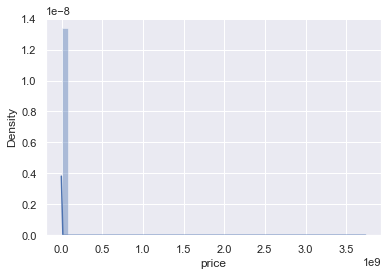

In [21]:
import seaborn as sns, numpy as np
sns.set_theme(); np.random.seed(0)
ax = sns.distplot(df['price'])

In [22]:
(df['price'] == 0.0).sum() 

4352

In [23]:
(df['price'] < 50).sum() # this is not price of car

5321

In [24]:
(df['price'] >0.050e+06).sum() # it is not relevant this amount of cars and I interpret them as outliers

1744

I re-profile the variable price by creating a subset of data where the price is in ranges of 50 and 50,000. dollars. That interval is where we can find a majority of vehicles for regular users.

In [25]:
df = df.drop(df[df['price']>0.050e+06].index)

In [26]:
df = df.drop(df[df['price']<50].index)

In [27]:
df.shape # dataset remains reduced to this subset

(108923, 15)

<function matplotlib.pyplot.show(close=None, block=None)>

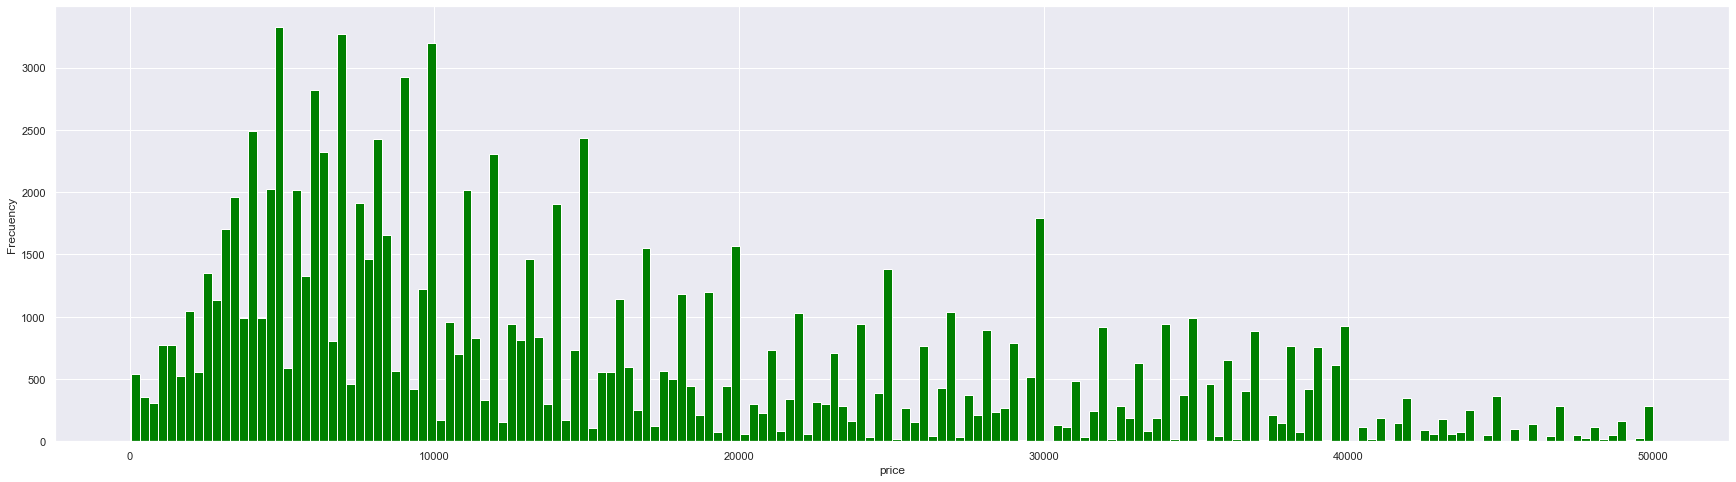

In [28]:
df['price'].hist( bins=170,figsize=(30,8),color='green')
plt.xlabel("price")
plt.ylabel("Frecuency")
plt.show

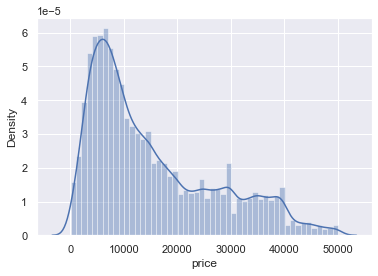

In [29]:
import seaborn as sns, numpy as np
sns.set_theme(); np.random.seed(0)
ax = sns.distplot(df['price'])

Above plot displays the distribution and range of price values of the cars, showing it is roughly normally distributed

## Analysis imput variables

### Create new features

Two new variables were created that were ultimately some of the most important in scoring the predictive model.

#### n_sold

In [30]:
# creating a count of sold cars by manufacturer
df_count = df.value_counts(["manufacturer", "model"]).reset_index(name='n_sold')
df_count

manufacturer                   model  n_sold
0             ford                   f-150    1691
1        chevrolet          silverado 1500    1429
2              ram                    1500     900
3           toyota                   camry     857
4            honda                  accord     831
...            ...                     ...     ...
11113         ford      superduty crew cab       1
11114         ford    superduty 4x4 diesel       1
11115         ford               superduty       1
11116         ford  super duty f350 diesel       1
11117        volvo             xc90 v8 awd       1

[11118 rows x 3 columns]

In [31]:
#adding the model numbers to our dataset
df= pd.merge(df, 
                      df_count, 
                      on =['manufacturer', 'model'], 
                      how ='inner')


#### Age

In [32]:
#getting age of the car from year
df['year'] = 2022 - df['year']
df = df.rename(columns={"year":"age"})

### Remove features

#### id

In [33]:
df.shape

(108923, 16)

In [34]:
df=df.drop(['id'], axis=1)

In [35]:
df.shape

(108923, 15)

### Distinguish categorical and numerical variables

In [36]:
# Determine columns by data types
num_type = (df.dtypes == np.float64) | (df.dtypes == np.int64)
cat_type = (df.dtypes == np.object)

cat_cols = df.columns[cat_type].tolist()
num_cols = df.columns[num_type].tolist()

print(f'Categorical columns: {cat_cols}')
print(f'Numerical columns: {num_cols}')

Categorical columns: ['region', 'title_status', 'condition', 'manufacturer', 'model', 'cylinders', 'fuel', 'transmission', 'drive', 'type', 'paint_color']
Numerical columns: ['price', 'age', 'odometer', 'n_sold']


###  Numerical Variable

In [37]:
df.describe()

price            age      odometer         n_sold
count  108923.000000  108923.000000  1.089230e+05  108923.000000
mean    15350.634953      12.661991  1.126694e+05     211.234478
std     11669.577498       9.519022  1.878603e+05     317.031879
min        50.000000       0.000000  0.000000e+00       1.000000
25%      6000.000000       7.000000  5.863100e+04      16.000000
50%     11499.000000      11.000000  1.050000e+05      80.000000
75%     22900.000000      16.000000  1.493525e+05     283.000000
max     50000.000000     122.000000  1.000000e+07    1691.000000

In [38]:
def plot_hist(variable):
    plt.hist(df[variable], bins = 150, color='orange')
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

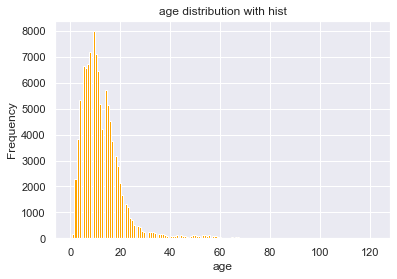

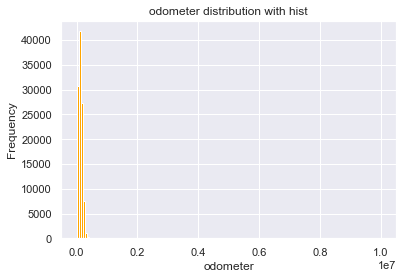

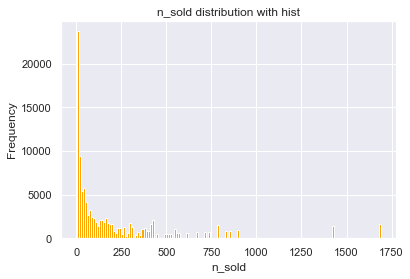

In [39]:
num_cols_study = ['age', 'odometer', 'n_sold']
for n in num_cols_study:
    plot_hist(n)

We will proceed to limit the margins of the values of these variables by identifying value margins that provide adjusted distributions of the same and without outliers. This is done by limiting the values in preprocess

#### n_sold

Values greater than 1200 units sold and those less than zero are removed

In [40]:
df = df.drop(df[df['n_sold']>1200].index)

In [41]:
df = df.drop(df[df['n_sold']<0].index)

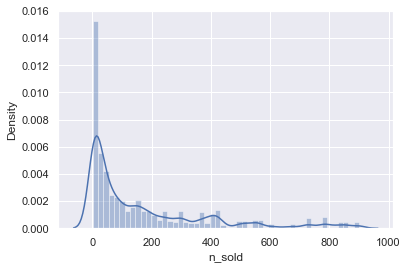

In [42]:
import seaborn as sns, numpy as np
sns.set_theme(); np.random.seed(0)
ax = sns.distplot(df['n_sold'])

#### odometer

Values greater than 250,000 km and those less than one are eliminated, these are used cars.

In [43]:
(df['odometer'] == 0.0).sum()

183

In [44]:
df = df.drop(df[df['odometer']>250000].index)

In [45]:
df = df.drop(df[df['odometer']<1].index)

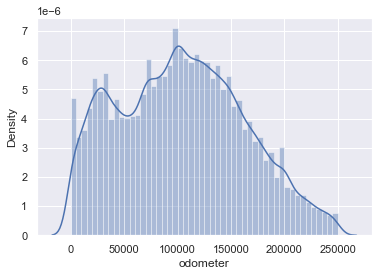

In [46]:
import seaborn as sns, numpy as np
sns.set_theme(); np.random.seed(0)
ax = sns.distplot(df['odometer'])

#### Age

Values over 30 years and those less than one are eliminated, these are used cars.

In [47]:
(df['age'] == 0.0).sum()

3

In [48]:
df = df.drop(df[df['age']>30].index)

In [49]:
df = df.drop(df[df['age']==0].index)

In [50]:
df = df.drop(df[df['age']<1].index)

In [51]:
by_odometer = df.sort_values('age',ascending=False)
by_odometer.head(80)

price                 region title_status  condition   age  \
33692   11500   appleton-oshkosh-FDL        clean  excellent  30.0   
83397   13850            san antonio        clean  excellent  30.0   
33149   17850                 mobile        clean   like new  30.0   
76129   11500                   yuma        clean  excellent  30.0   
96400    3500              milwaukee        clean       good  30.0   
...       ...                    ...          ...        ...   ...   
13666    2995            great falls        clean       good  30.0   
89205    9750  western massachusetts        clean  excellent  30.0   
52460    1400          western slope        clean       good  30.0   
104798  13500             wilmington        clean  excellent  30.0   
19138    9650                houston        clean       good  30.0   

       manufacturer                 model    cylinders fuel  odometer  \
33692     chevrolet              corvette  8 cylinders  gas   84189.0   
83397         mazda            mx-5 miata  4 cylinders  gas   83923.0   
33149     chevrolet              corvette  8 cylinders  gas   16003.0   
76129        toyota              cressida  4 cylinders  gas   29000.0   
96400      chrysler   lebaron convertible  6 cylinders  gas  120000.0   
...             ...                   ...          ...  ...       ...   
13666        toyota                 camry  4 cylinders  gas  173000.0   
89205      cadillac               allante  6 cylinders  gas   89000.0   
52460     chevrolet               caprice  8 cylinders  gas  140000.0   
104798         ford  f-150 xlt flare side  8 cylinders  gas   70667.0   
19138           gmc                sierra  8 cylinders  gas  120000.0   

       transmission drive         type paint_color  n_sold  
33692     automatic   rwd        coupe       white     566  
83397        manual   rwd  convertible       black      37  
33149        manual   rwd        coupe         red     566  
76129     automatic   rwd        sedan        blue       4  
96400     automatic   rwd  convertible         red       7  
...             ...   ...          ...         ...     ...  
13666        manual   fwd        sedan        blue     857  
89205     automatic   fwd  convertible         red      14  
52460     automatic   rwd        sedan      silver      17  
104798    automatic   rwd       pickup         red       1  
19138     automatic   4wd        truck        blue     298  

[80 rows x 15 columns]

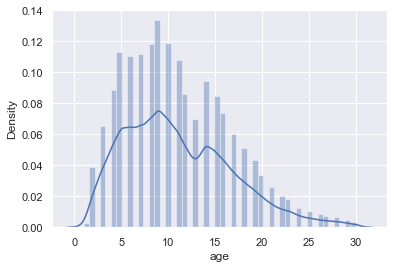

In [52]:
import seaborn as sns, numpy as np
sns.set_theme(); np.random.seed(0)
ax = sns.distplot(df['age'])

After preprocessing, the variables look like this

<function matplotlib.pyplot.show(close=None, block=None)>

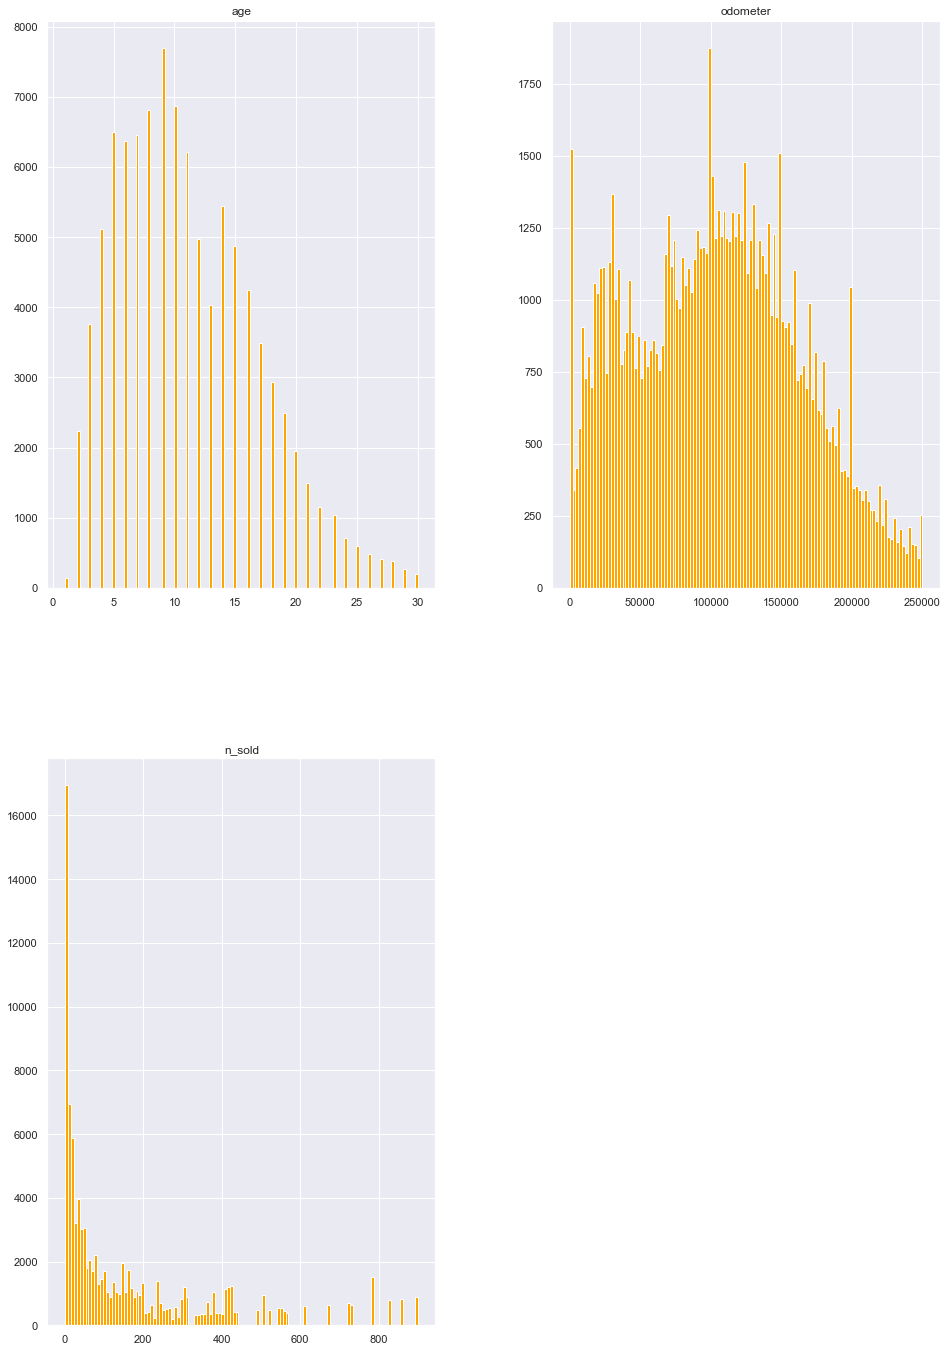

In [53]:
df[num_cols_study] = df[num_cols_study].astype(float)
df[num_cols_study].hist( bins=120,figsize=(16,24),color='orange')

plt.show

In [54]:
df.shape

(99316, 15)

In [55]:
# Create a plotting function
def hist_loop(data: df,
              rows: int,
              cols: int,
              figsize: tuple):

    """ Returns multiple histograms as subplots
    """
    fig, axes = plt.subplots(rows,cols, figsize=figsize)
    for i, ax in enumerate(axes.flatten()):
        if i < len(data.columns):
            data[sorted(data.columns)[i]].plot.hist(bins=30, ax=ax)
            ax.set_title(f'{sorted(data.columns)[i]} distribution')
            ax.tick_params(axis='x')
            ax.tick_params(axis='y')
            ax.get_yaxis().get_label().set_visible(False)
        else:
            fig.delaxes(ax=ax)
    fig.tight_layout()

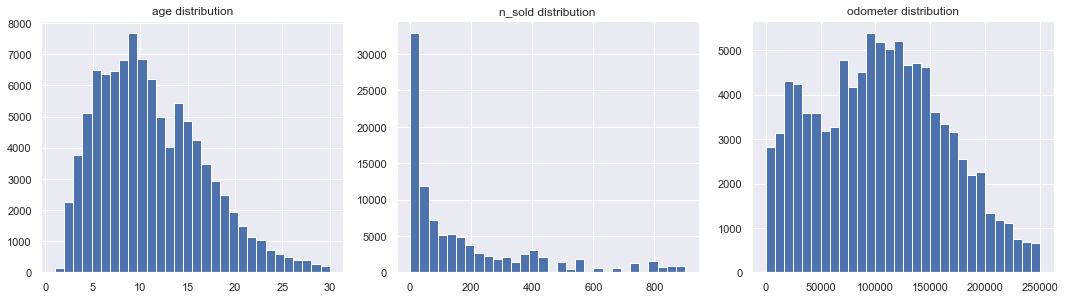

In [56]:
# Plot all numerical features
hist_loop(data=df[num_cols_study],
          rows=2,
          cols=3,
          figsize=(15,8))

* Above we plotted the distribution of each continuous feature. None of the distribution of numeric values are Gaussian distrubition

#### Correlation between numerical variables and price

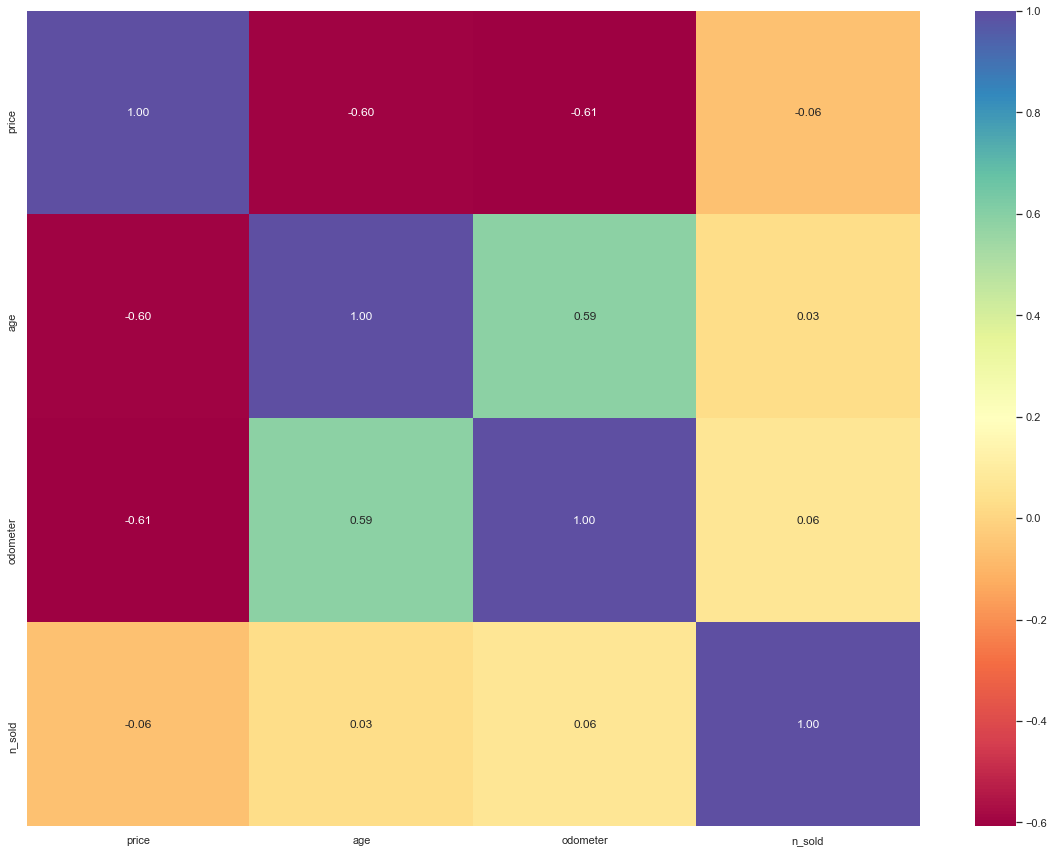

In [57]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot = True, fmt = ".2f", cmap = "Spectral");

* Heat maps shows the correlation value between each feature between -1 and +1. the most highly correlated relationship is odometer and age, the most negatively correlated features are price and odometer. Price and age also show a negative correlation and Price and n-sold too. Age and n_sold is highly positively correlated as well n_sold and odometer.

### Categorical variables

#### Manufacturer

In [58]:
df = df[df.groupby('manufacturer').manufacturer.transform('count') > 100]

In [59]:

df.groupby('manufacturer').size().sort_values(ascending=False)

manufacturer
ford             16175
chevrolet        13495
toyota            8946
honda             6238
nissan            5833
jeep              5208
gmc               4151
dodge             3723
ram               3552
bmw               2938
subaru            2609
hyundai           2469
mercedes-benz     2434
volkswagen        2099
lexus             2060
kia               1909
chrysler          1850
cadillac          1428
infiniti          1390
buick             1381
mazda             1243
audi              1194
acura             1167
lincoln           1041
mitsubishi         842
volvo              744
pontiac            708
mini               502
saturn             411
mercury            398
rover              348
jaguar             334
porsche            255
fiat               153
dtype: int64

In [60]:
df.shape

(99228, 15)

In [61]:
model_count=df
ax2= px.treemap(model_count,path=["manufacturer"],title="Car manufacturer distribution:")
ax2.show()



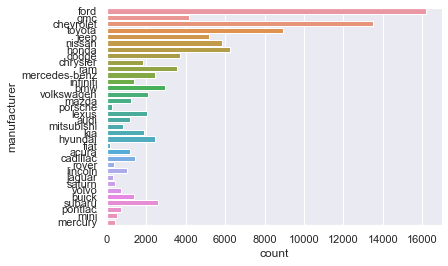

In [62]:
plt.style.use('tableau-colorblind10')
sns.countplot(y='manufacturer',data=df)
plt.show()

#### Region

In [63]:

df.groupby('region').size().sort_values(ascending=False)

region
vermont                1296
columbus               1268
albany                  978
rochester               953
jacksonville            947
                       ... 
west virginia (old)       4
st louis                  4
southwest MS              2
logan                     2
fort smith, AR            1
Length: 402, dtype: int64

In [64]:
model_count=df
ax2= px.treemap(model_count,path=["region"],title="Car region news distribution:")
ax2.show()



#### Title status

In [65]:
df.groupby('title_status').size().sort_values(ascending=False)

title_status
clean         93688
rebuilt        3361
salvage        1321
lien            747
missing          80
parts only       31
dtype: int64

In [66]:
model_count=df
ax2= px.treemap(model_count,path=['title_status'],title="Car title status distribution:")
ax2.show()



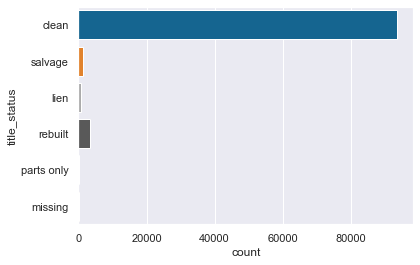

In [67]:
plt.style.use('tableau-colorblind10')
sns.countplot(y='title_status',data=df)
plt.show()

#### Model

In [68]:
df.groupby('model').size().sort_values(ascending=False)

model
1500                     897
camry                    821
accord                   795
civic                    758
wrangler                 748
                        ... 
cx-7 sv                    1
odyssey ex+l               1
odyssey ex w/ dvd          1
odyssey ex minivan 4d      1
& altima                   1
Length: 9743, dtype: int64

In [69]:
df = df[df.groupby('model').model.transform('count') > 170]



In [70]:
model_count=df
ax2= px.treemap(model_count,path=['model'],title="Car model distribution:")
ax2.show()


#### Condition

In [71]:
#df.loc[df['condition'] == 'like new'] = 'like_new'# better not use two words, so I join them

In [72]:
df.groupby('condition').size().sort_values(ascending=False)

condition
excellent    14664
good         14266
like new      2957
fair           969
new            131
salvage         73
dtype: int64

In [73]:
model_count=df
ax2= px.treemap(model_count,path=['condition'],title="Car condition distribution:")
ax2.show()

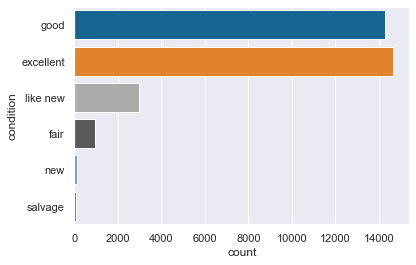

In [74]:
plt.style.use('tableau-colorblind10')
sns.countplot(y='condition',data=df)
plt.show()

#### Cylinders

In [75]:
df.groupby('cylinders').size().sort_values(ascending=False)

cylinders
4 cylinders     12825
6 cylinders     11726
8 cylinders      8151
5 cylinders       223
10 cylinders       77
3 cylinders        30
other              26
12 cylinders        2
dtype: int64

In [76]:
model_count=df
ax2= px.treemap(model_count,path=['cylinders'],title="Car cylinders distribution:")
ax2.show()

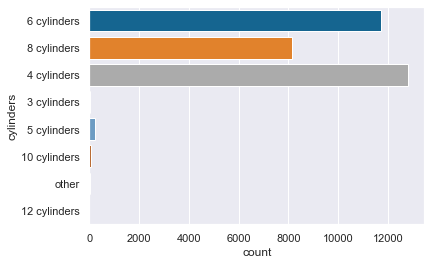

In [77]:
plt.style.use('tableau-colorblind10')
sns.countplot(y='cylinders',data=df)
plt.show()

#### Fuel

In [78]:
df.groupby('fuel').size().sort_values(ascending=False)

fuel
gas         30890
diesel       1486
hybrid        439
other         241
electric        4
dtype: int64

In [79]:
model_count=df
ax2= px.treemap(model_count,path=['fuel'],title="Car fuel distribution:")
ax2.show()

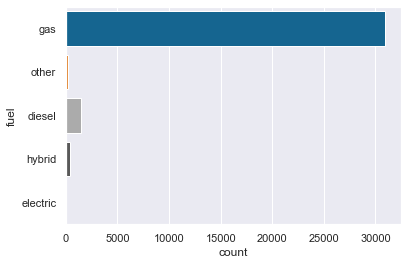

In [80]:
plt.style.use('tableau-colorblind10')
sns.countplot(y='fuel',data=df)
plt.show()

#### Transmission

In [81]:
df.groupby('transmission').size().sort_values(ascending=False)

transmission
automatic    27029
other         3954
manual        2077
dtype: int64

In [82]:
model_count=df
ax2= px.treemap(model_count,path=['transmission'],title="Car transmission distribution:")
ax2.show()

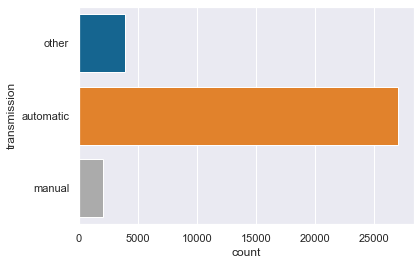

In [83]:
plt.style.use('tableau-colorblind10')
sns.countplot(y='transmission',data=df)
plt.show()

#### Drive

In [84]:
#df.loc[df['drive'] == '4wd'] = 'fourwd'# better not starting with numbers

In [85]:
df.groupby('drive').size().sort_values(ascending=False)

drive
4wd    14109
fwd    13273
rwd     5678
dtype: int64

In [86]:
model_count=df
ax2= px.treemap(model_count,path=['drive'],title="Car drive distribution:")
ax2.show()

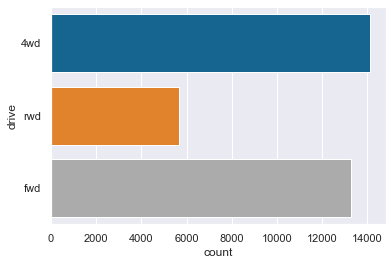

In [87]:
plt.style.use('tableau-colorblind10')
sns.countplot(y='drive',data=df)
plt.show()

#### Cartype

In [88]:
df.rename(columns = {'type':'cartype'}, inplace = True)# Type is a reserved word, it is better not ussing it

In [89]:
df.groupby('cartype').size().sort_values(ascending=False)

cartype
sedan          9868
SUV            8026
pickup         3917
truck          3848
coupe          2542
hatchback      1012
mini-van        993
wagon           973
other           764
van             508
convertible     396
offroad         193
bus              20
dtype: int64

In [90]:
model_count=df
ax2= px.treemap(model_count,path=['cartype'],title="Car type distribution:")
ax2.show()

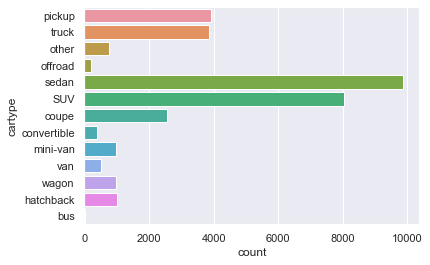

In [91]:
plt.style.use('tableau-colorblind10')
sns.countplot(y='cartype',data=df)
plt.show()

#### Paint color

In [92]:
df.groupby('paint_color').size().sort_values(ascending=False)

paint_color
white     6991
black     6034
silver    5068
grey      4036
red       3908
blue      3771
green      992
brown      906
custom     801
yellow     293
orange     158
purple     102
dtype: int64

In [93]:
model_count=df
ax2= px.treemap(model_count,path=['paint_color'],title="Car paint color distribution:")
ax2.show()

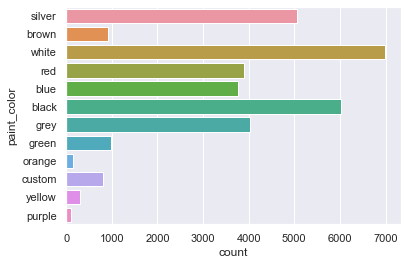

In [94]:
plt.style.use('tableau-colorblind10')
sns.countplot(y='paint_color',data=df)
plt.show()

#### Distribution of price by Categorical Variables

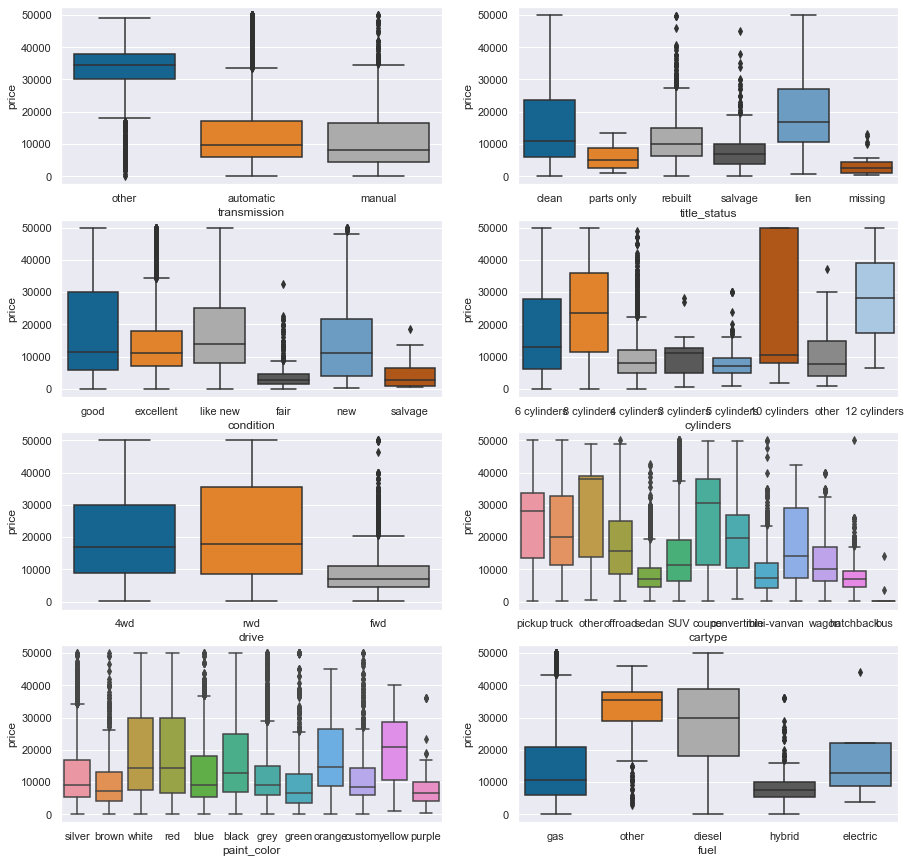

In [95]:
categorical = [ 'transmission','title_status','condition','cylinders','drive','cartype', 'paint_color', 'fuel']

df = df.explode('price')
df['price'] = df['price'].astype('float')



fig, ax = plt.subplots(4, 2, figsize=(15, 15))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x = var, y='price', data = df, ax = subplot)

### Relationships through visualizations

#### Comparison of car manufacturers and prices

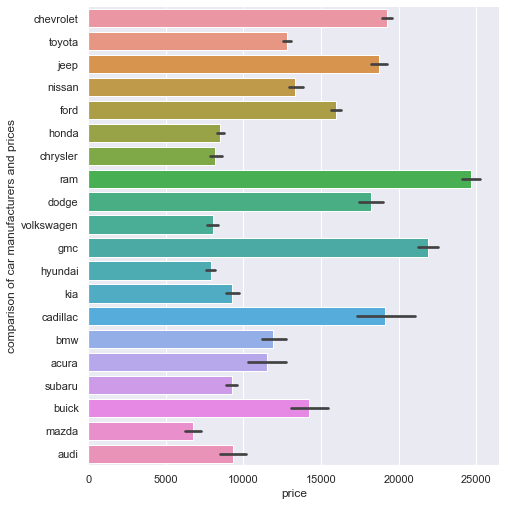

In [96]:
#comparison of car manufacturers and prices
g = sns.factorplot( y = "manufacturer", x = "price", data = df, kind = "bar", size = 7)
g.set_ylabels("comparison of car manufacturers and prices")
plt.show()

* The most expensive used cars ar which belongs manufacturers Ram, Gmc, Cadillac,Chevrolet, Jeep and Dodge.
* The cheapest used cars belongs manufacturersers of Asia like Mazda,Hiuday, Honda

#### Comparison of total sales of car models

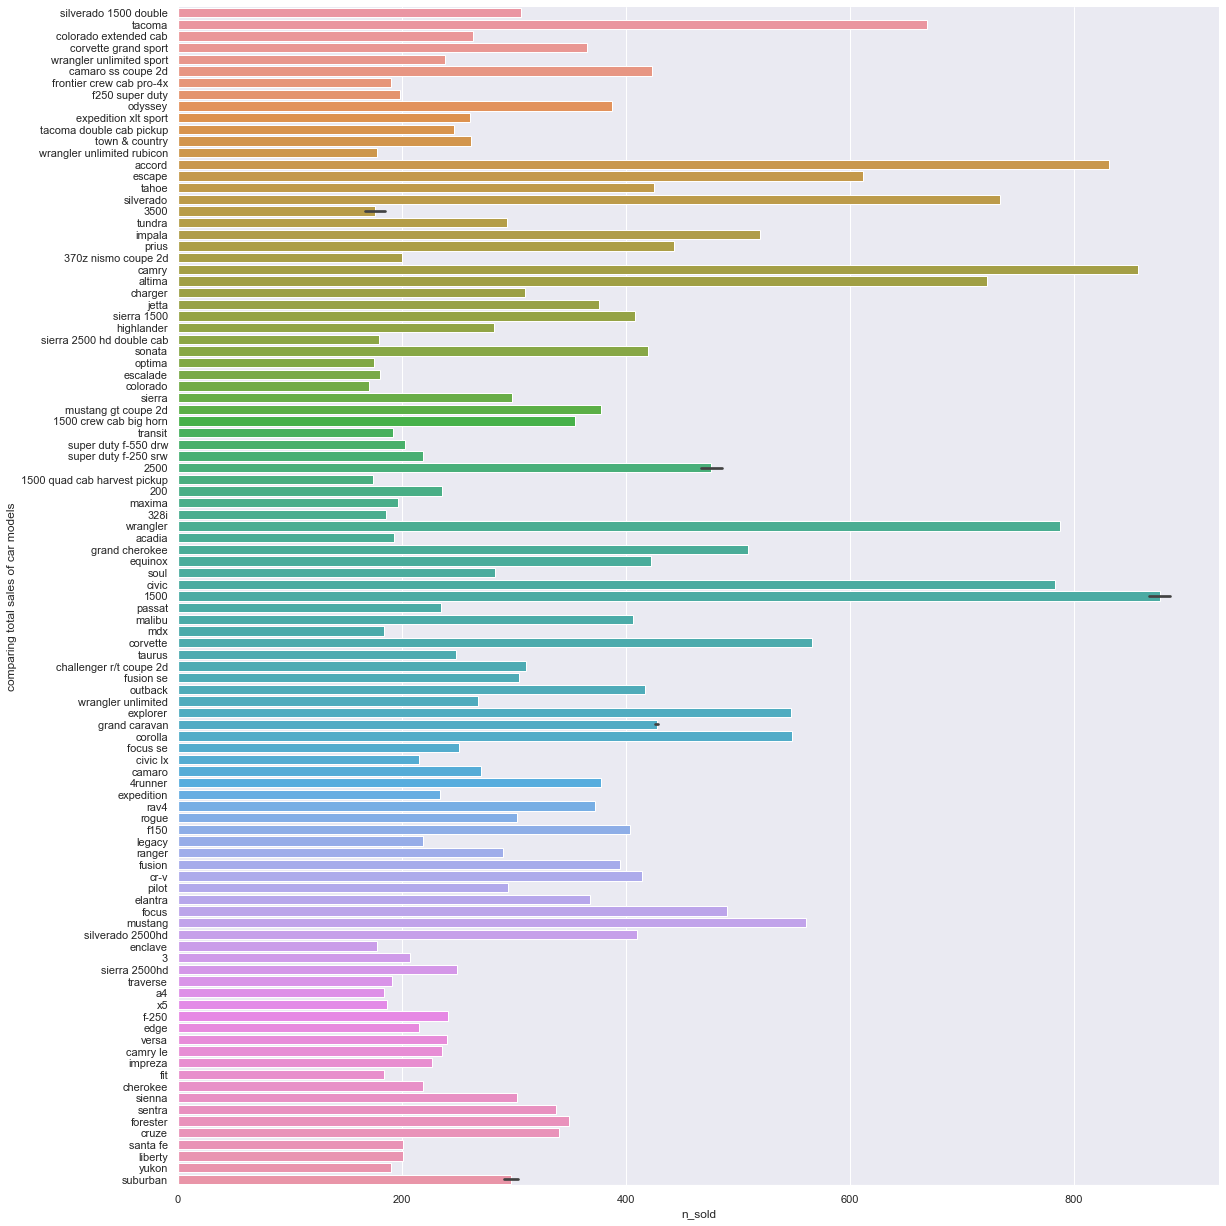

In [97]:
#comparison of car models and number units sold
g = sns.factorplot( x = "n_sold", y = "model", data = df, kind = "bar", size = 17)
g.set_ylabels("comparing total sales of car models")
plt.show()

* The models with more used cars in the market are Civic, camry, Accord, wrangler, tacoma

#### Comparison of total sales of car manufacturers

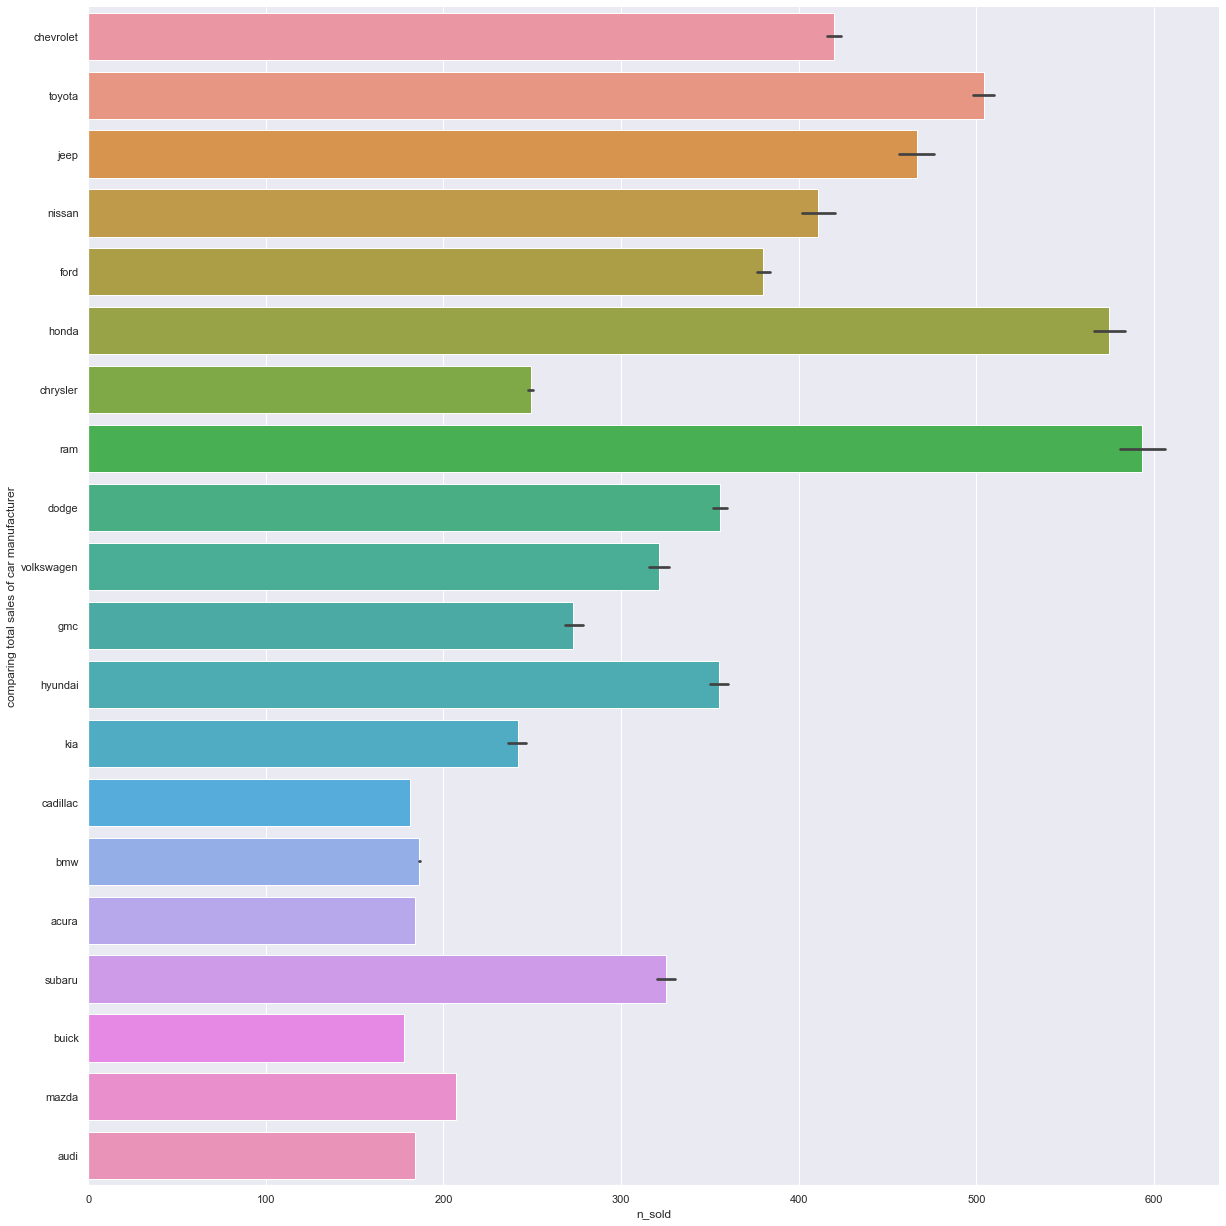

In [98]:
#comparison of car manufacturers and number units sold
g = sns.factorplot( x = "n_sold", y = "manufacturer", data = df, kind = "bar", size = 17)
g.set_ylabels("comparing total sales of car manufacturer")
plt.show()

* The manufacturers with more units in the market are Ram, Honda, Toyota, Jeep

#### Comparison of car ages and prices

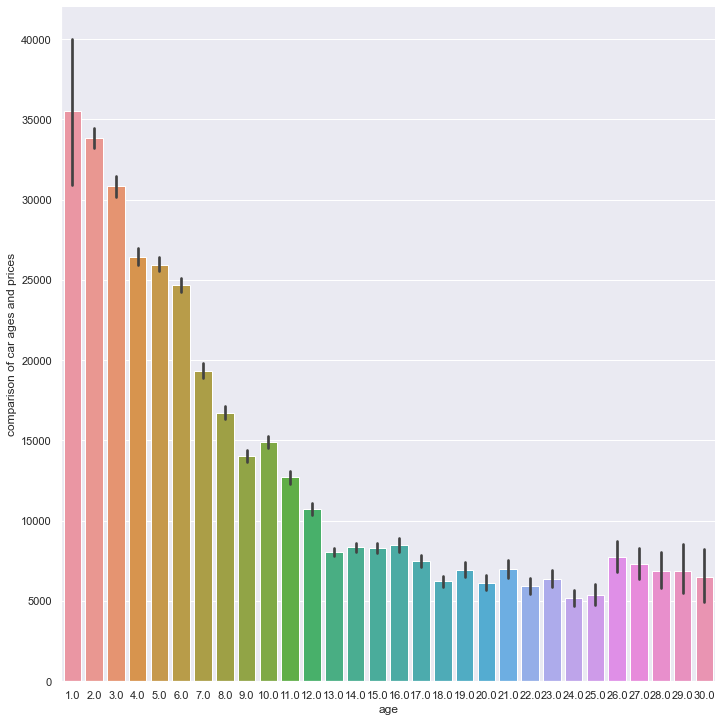

In [99]:
g = sns.factorplot( x = "age",y = "price", data = df, kind = "bar", size = 10)
g.set_ylabels("comparison of car ages and prices")
plt.show()

* The price of used cars decreases exponentially up to 12 years, after that the price continues to drop slightly but can be considered stable between 5-7k dollars.

#### Comparison of car condition and prices

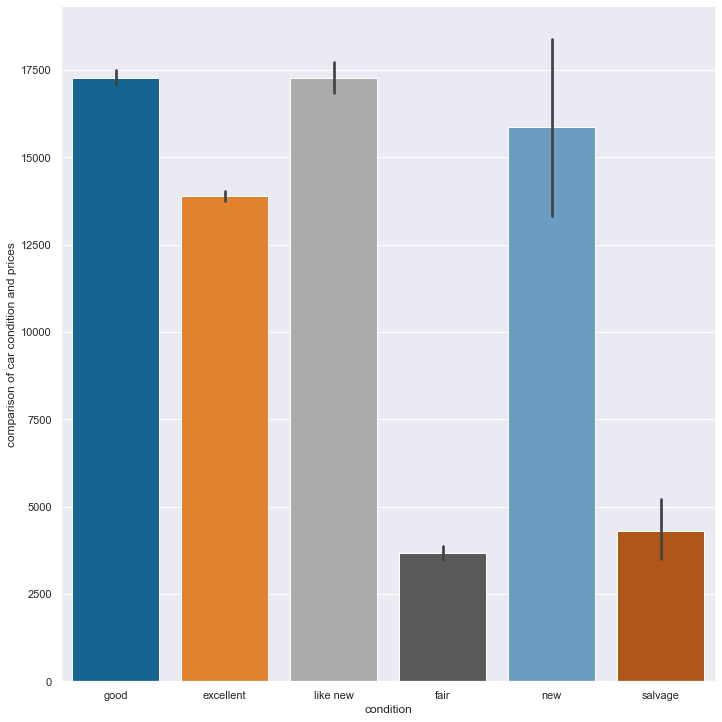

In [100]:
g = sns.factorplot( x = "condition",y = "price", data = df, kind = "bar", size = 10)
g.set_ylabels("comparison of car condition and prices")
plt.show()

* Most cars are advertised for sale claiming good condition and asking for higher prices.

#### Comparison the title status of the car versus prices

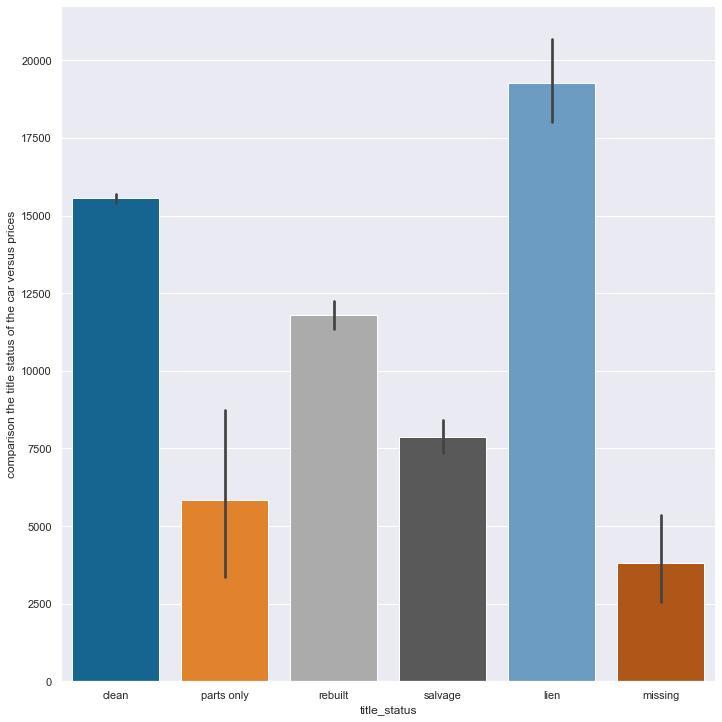

In [101]:
g = sns.factorplot( x = "title_status",y = "price", data = df, kind = "bar", size = 10)
g.set_ylabels("comparison the title status of the car versus prices")
plt.show()

* Cars in lien status (a right to keep possession of property belonging to another person until a debt owed by that person is paid) are the most expensive cars, followed by those in clean condition.

#### Transmission & price & age & odometer

In [102]:
manual = df[df['transmission']=='manual']
automatic = df[df['transmission']=='automatic']
other = df[df['transmission']=='other']

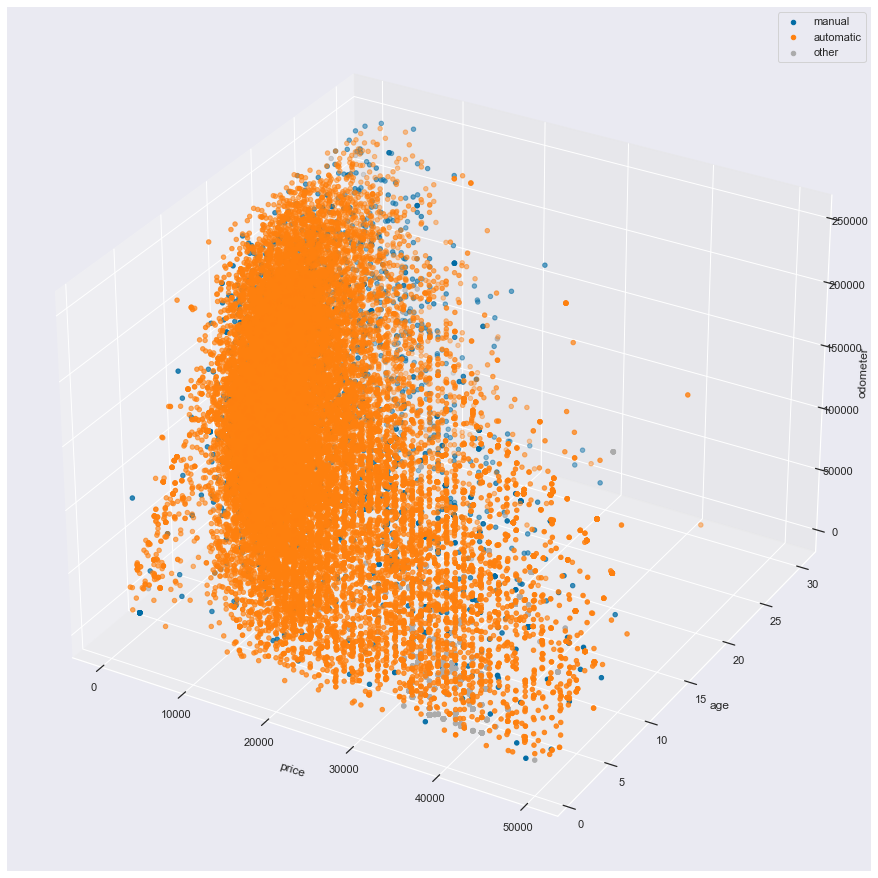

In [103]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.add_axes([0.5,0.3,3,3], projection='3d')

ax.scatter(manual['price'],manual['age'],manual['odometer'])
ax.scatter(automatic['price'],automatic['age'],automatic['odometer'])
ax.scatter(other['price'],other['age'],other['odometer'])

ax.set_xlabel('price')
ax.set_ylabel('age')
ax.set_zlabel('odometer')

ax.legend(['manual','automatic','other'])



plt.show()

#### Drive & price & age & odometer

In [104]:
fourwd = df[df['drive']=='4wd']
fwd = df[df['drive']=='fwd']
rwd = df[df['drive']=='rwd']


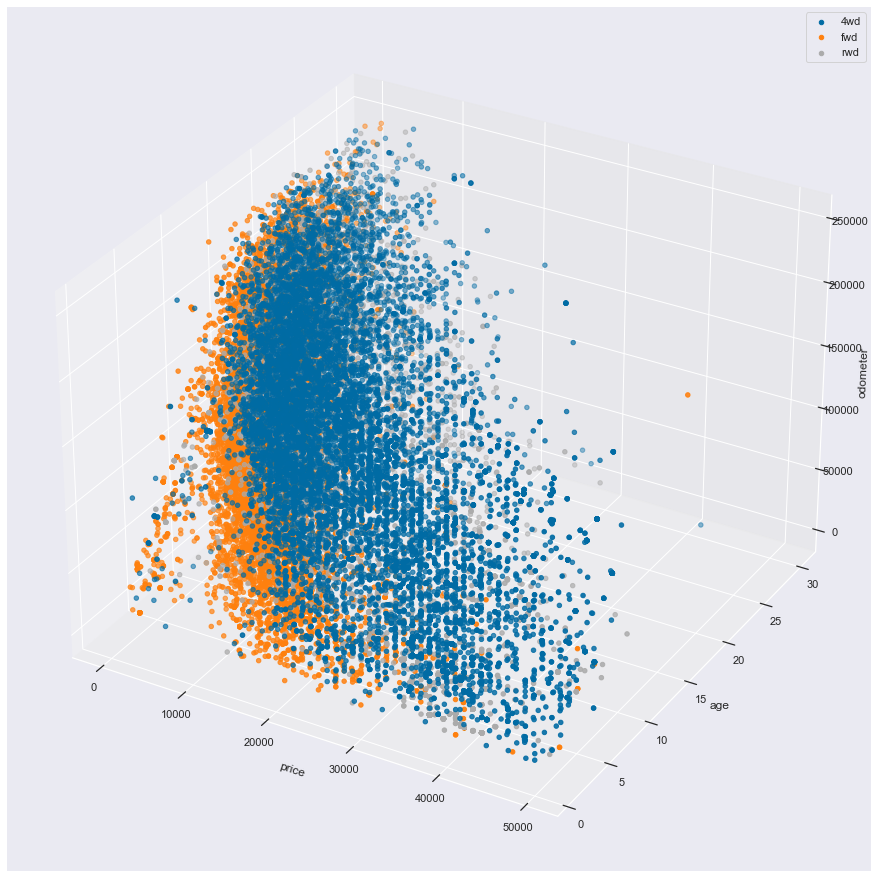

In [105]:
fig=plt.figure()
ax=fig.add_axes([0.5,0.3,3,3], projection='3d')

ax.scatter(fourwd['price'],fourwd['age'],fourwd['odometer'])
ax.scatter(fwd['price'],fwd['age'],fwd['odometer'])
ax.scatter(rwd['price'],rwd['age'],rwd['odometer'])


ax.set_xlabel('price')
ax.set_ylabel('age')
ax.set_zlabel('odometer')

ax.legend(['4wd','fwd','rwd'])



plt.show()

#### Drive & price & cylinders & odometer

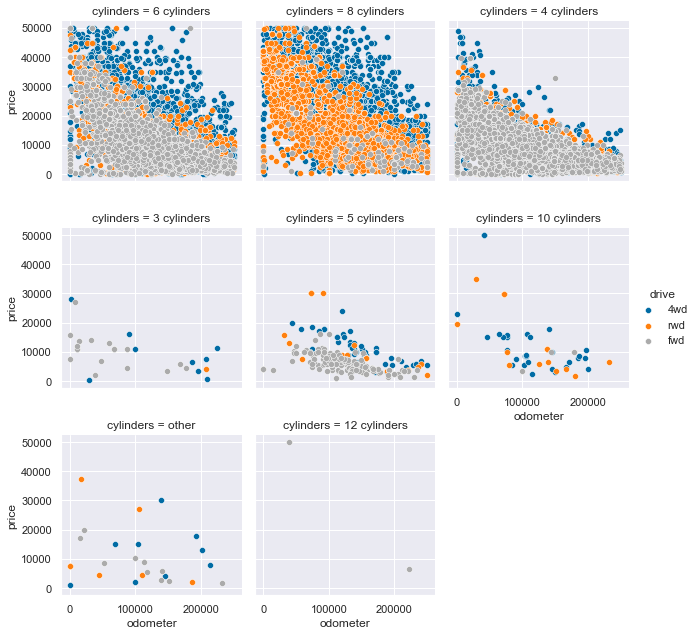

In [106]:
cond_plot = sns.FacetGrid(data=df, col='cylinders', hue = 'drive', col_wrap=3)
cond_plot.map(sns.scatterplot, 'odometer', 'price');
cond_plot.add_legend()

* For each individual size (cylinders) we can see the relationship between price, odometer and traction. As we can see, most of the cars are 4, 6 and 8 cylinders and the price is higher in 4 and 6 cylinders, while in 8 cylinders the price has a wide distribution. In 4 to 6 cylinders front-wheel drive predominates, but in 8 cylinders it is front-wheel drive.

#### Preprocessing categorical variables

* After several tests, it is more convenient to get the best score not using dummies or one hot encoder, at least with the manufacturer, model and region, otherwise the great number of columns generated  makes very difficult to get successful scores. Proportion between variables and records per variable decreases to non-recommended levels.
* The decision to apply the label encoder in all the categories favors the no need to group categories while it has been based on finally obtaining better scores with the tree-type algorithms.

In [107]:
le = LabelEncoder()
df['manufacturer'] = le.fit_transform(df['manufacturer'].astype(str))
mapping = dict(zip(le.classes_, range(len(le.classes_))))
mapping

{'acura': 0,
 'audi': 1,
 'bmw': 2,
 'buick': 3,
 'cadillac': 4,
 'chevrolet': 5,
 'chrysler': 6,
 'dodge': 7,
 'ford': 8,
 'gmc': 9,
 'honda': 10,
 'hyundai': 11,
 'jeep': 12,
 'kia': 13,
 'mazda': 14,
 'nissan': 15,
 'ram': 16,
 'subaru': 17,
 'toyota': 18,
 'volkswagen': 19}

In [108]:
le1 = LabelEncoder()
df['region'] = le1.fit_transform(df['region'].astype(str))
mapping = dict(zip(le1.classes_, range(len(le1.classes_))))
mapping

{'SF bay area': 0,
 'abilene': 1,
 'akron / canton': 2,
 'albany': 3,
 'albuquerque': 4,
 'altoona-johnstown': 5,
 'amarillo': 6,
 'ames': 7,
 'anchorage / mat-su': 8,
 'ann arbor': 9,
 'annapolis': 10,
 'appleton-oshkosh-FDL': 11,
 'asheville': 12,
 'ashtabula': 13,
 'athens': 14,
 'atlanta': 15,
 'auburn': 16,
 'augusta': 17,
 'austin': 18,
 'bakersfield': 19,
 'baltimore': 20,
 'baton rouge': 21,
 'battle creek': 22,
 'beaumont / port arthur': 23,
 'bellingham': 24,
 'bemidji': 25,
 'bend': 26,
 'billings': 27,
 'binghamton': 28,
 'birmingham': 29,
 'bismarck': 30,
 'bloomington': 31,
 'bloomington-normal': 32,
 'boise': 33,
 'boone': 34,
 'boston': 35,
 'boulder': 36,
 'bowling green': 37,
 'bozeman': 38,
 'brainerd': 39,
 'brownsville': 40,
 'brunswick': 41,
 'buffalo': 42,
 'butte': 43,
 'cape cod / islands': 44,
 'catskills': 45,
 'cedar rapids': 46,
 'central NJ': 47,
 'central louisiana': 48,
 'central michigan': 49,
 'champaign urbana': 50,
 'charleston': 51,
 'charlotte': 52

In [109]:
le2 = LabelEncoder()
df['title_status'] = le2.fit_transform(df['title_status'].astype(str))
mapping = dict(zip(le2.classes_, range(len(le2.classes_))))
mapping

{'clean': 0,
 'lien': 1,
 'missing': 2,
 'parts only': 3,
 'rebuilt': 4,
 'salvage': 5}

In [110]:
le3 = LabelEncoder()
df['model'] = le3.fit_transform(df['model'].astype(str))
mapping = dict(zip(le3.classes_, range(len(le3.classes_))))
mapping

{'1500': 0,
 '1500 crew cab big horn': 1,
 '1500 quad cab harvest pickup': 2,
 '200': 3,
 '2500': 4,
 '3': 5,
 '328i': 6,
 '3500': 7,
 '370z nismo coupe 2d': 8,
 '4runner': 9,
 'a4': 10,
 'acadia': 11,
 'accord': 12,
 'altima': 13,
 'camaro': 14,
 'camaro ss coupe 2d': 15,
 'camry': 16,
 'camry le': 17,
 'challenger r/t coupe 2d': 18,
 'charger': 19,
 'cherokee': 20,
 'civic': 21,
 'civic lx': 22,
 'colorado': 23,
 'colorado extended cab': 24,
 'corolla': 25,
 'corvette': 26,
 'corvette grand sport': 27,
 'cr-v': 28,
 'cruze': 29,
 'edge': 30,
 'elantra': 31,
 'enclave': 32,
 'equinox': 33,
 'escalade': 34,
 'escape': 35,
 'expedition': 36,
 'expedition xlt sport': 37,
 'explorer': 38,
 'f-250': 39,
 'f150': 40,
 'f250 super duty': 41,
 'fit': 42,
 'focus': 43,
 'focus se': 44,
 'forester': 45,
 'frontier crew cab pro-4x': 46,
 'fusion': 47,
 'fusion se': 48,
 'grand caravan': 49,
 'grand cherokee': 50,
 'highlander': 51,
 'impala': 52,
 'impreza': 53,
 'jetta': 54,
 'legacy': 55,
 'li

In [111]:
le4 = LabelEncoder()
df['condition'] = le4.fit_transform(df['condition'].astype(str))
mapping = dict(zip(le4.classes_, range(len(le4.classes_))))
mapping

{'excellent': 0, 'fair': 1, 'good': 2, 'like new': 3, 'new': 4, 'salvage': 5}

In [112]:
le5 = LabelEncoder()
df['cylinders'] = le5.fit_transform(df['cylinders'].astype(str))
mapping = dict(zip(le5.classes_, range(len(le5.classes_))))
mapping

{'10 cylinders': 0,
 '12 cylinders': 1,
 '3 cylinders': 2,
 '4 cylinders': 3,
 '5 cylinders': 4,
 '6 cylinders': 5,
 '8 cylinders': 6,
 'other': 7}

In [113]:
le6 = LabelEncoder()
df['fuel'] = le6.fit_transform(df['fuel'].astype(str))
mapping = dict(zip(le6.classes_, range(len(le6.classes_))))
mapping

{'diesel': 0, 'electric': 1, 'gas': 2, 'hybrid': 3, 'other': 4}

In [114]:
le7 = LabelEncoder()
df['transmission'] = le7.fit_transform(df['transmission'].astype(str))
mapping = dict(zip(le7.classes_, range(len(le7.classes_))))
mapping

{'automatic': 0, 'manual': 1, 'other': 2}

In [115]:
le8 = LabelEncoder()
df['drive'] = le8.fit_transform(df['drive'].astype(str))
mapping = dict(zip(le8.classes_, range(len(le8.classes_))))
mapping

{'4wd': 0, 'fwd': 1, 'rwd': 2}

In [116]:
le9 = LabelEncoder()
df['cartype'] = le9.fit_transform(df['cartype'].astype(str))
mapping = dict(zip(le9.classes_, range(len(le9.classes_))))
mapping

{'SUV': 0,
 'bus': 1,
 'convertible': 2,
 'coupe': 3,
 'hatchback': 4,
 'mini-van': 5,
 'offroad': 6,
 'other': 7,
 'pickup': 8,
 'sedan': 9,
 'truck': 10,
 'van': 11,
 'wagon': 12}

In [117]:
le10 = LabelEncoder()
df['paint_color'] = le10.fit_transform(df['paint_color'].astype(str))
mapping = dict(zip(le10.classes_, range(len(le10.classes_))))
mapping

{'black': 0,
 'blue': 1,
 'brown': 2,
 'custom': 3,
 'green': 4,
 'grey': 5,
 'orange': 6,
 'purple': 7,
 'red': 8,
 'silver': 9,
 'white': 10,
 'yellow': 11}

All of these dictionaries will be used in the prediction function after all

### Correlation matrix

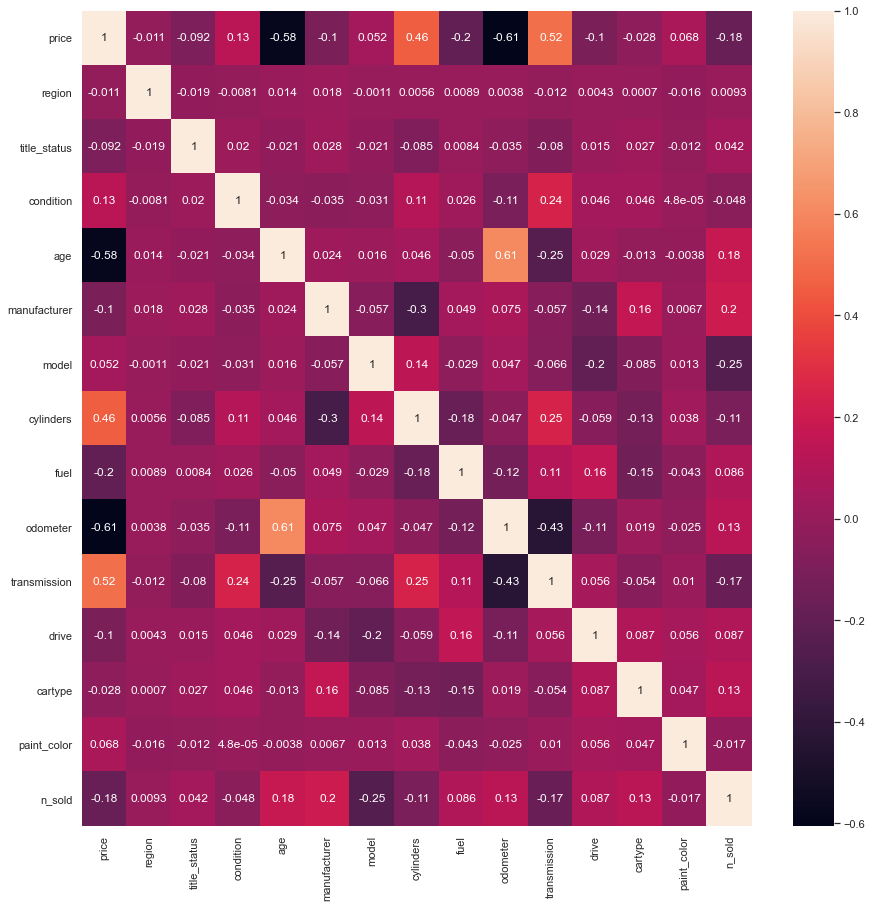

In [118]:
#We recalculate the correlation matrix, to see how they are in the dataframe prior to the transformations and modelling.

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [119]:
# with the following function we can select highly correlated features
# it will remove the first feature that is highly correlated with another feature

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [120]:
corr_features = correlation(df, 0.85) # 85% is a good value of the threshold
print(len(corr_features))
print(corr_features)

0
set()


#### checked for duplicate records

In [348]:
#Variables are checked for duplicate records
print('The number of duplicate registers is', df.duplicated().sum())

# length initial
length1=  len(df)

# dropping duplicate values
df.drop_duplicates(keep=False, inplace=True)
 
# length after removing duplicates
length2=len(df)
 
# printing all data frame lengths
print('the initial size of the dataframe is',length1,'and the size after removing duplicates is',length2)


The number of duplicate registers is 0
the initial size of the dataframe is 27546 and the size after removing duplicates is 27546


In [122]:
df.shape

(27546, 15)

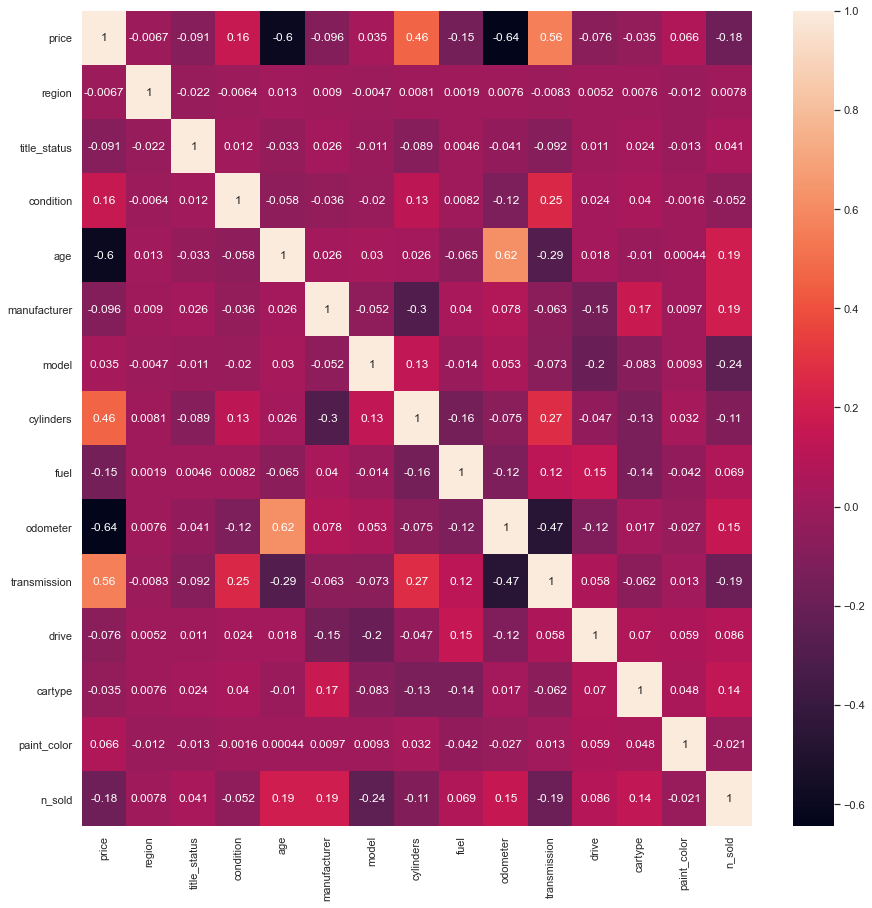

In [123]:
#We recalculate the correlation matrix, to see how they are in the dataframe prior to modeling and after having eliminated the duplicates.
 
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

#### EDA dataset 

In [124]:
df.head()

price  region  title_status  condition  age  manufacturer  model  \
295  34590.0      16             0          2  6.0             5     79   
296  29990.0      16             0          2  8.0             5     79   
297  34590.0      29             0          2  6.0             5     79   
298  33590.0      29             0          2  2.0             5     79   
299  34590.0      83             0          2  6.0             5     79   

     cylinders  fuel  odometer  transmission  drive  cartype  paint_color  \
295          5     2   29499.0             2      0        8            9   
296          6     2   26129.0             2      0        8            2   
297          5     2   29499.0             2      0        8            9   
298          5     4   15591.0             2      0        8           10   
299          5     2   29499.0             2      0        8            9   

     n_sold  
295   306.0  
296   306.0  
297   306.0  
298   306.0  
299   306.0

In [125]:
df.shape

(27546, 15)

# Modeling

Modeling techniques are selected and applied. Since some techniques like neural nets have specific requirements regarding the form of the data, there can be a loop back here to data prep.

## Determine Dependent and Independent Variables

In [126]:
X = df.drop(columns = ['price'])
y = df[['price']]

In [127]:
X

region  title_status  condition   age  manufacturer  model  cylinders  \
295         16             0          2   6.0             5     79          5   
296         16             0          2   8.0             5     79          6   
297         29             0          2   6.0             5     79          5   
298         29             0          2   2.0             5     79          5   
299         83             0          2   6.0             5     79          5   
...        ...           ...        ...   ...           ...    ...        ...   
100663     252             0          0   5.0             9      0          6   
100664     361             0          0   5.0             9      0          6   
100665       6             0          0   5.0             9      0          6   
100666     197             0          0  12.0             9      0          6   
101114     254             0          2  24.0             7      7          5   

        fuel  odometer  transmission  drive  cartype  paint_color  n_sold  
295        2   29499.0             2      0        8            9   306.0  
296        2   26129.0             2      0        8            2   306.0  
297        2   29499.0             2      0        8            9   306.0  
298        4   15591.0             2      0        8           10   306.0  
299        2   29499.0             2      0        8            9   306.0  
...      ...       ...           ...    ...      ...          ...     ...  
100663     2   84000.0             0      0       10           10     9.0  
100664     2   84000.0             0      0       10           10     9.0  
100665     2   84000.0             0      0       10           10     9.0  
100666     2   44000.0             0      2        8           10     9.0  
101114     0  230837.0             1      0       10            8     3.0  

[27546 rows x 14 columns]

In [128]:
y

price
295     34590.0
296     29990.0
297     34590.0
298     33590.0
299     34590.0
...         ...
100663  28900.0
100664  28900.0
100665  28900.0
100666  32500.0
101114  12500.0

[27546 rows x 1 columns]

## Split Dataset

In [129]:
# I want to split our dataset into subsets that minimize the potential for bias in our evaluation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [130]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22036, 14)
(22036, 1)
(5510, 14)
(5510, 1)


In [131]:
df.columns

Index(['price', 'region', 'title_status', 'condition', 'age', 'manufacturer',
       'model', 'cylinders', 'fuel', 'odometer', 'transmission', 'drive',
       'cartype', 'paint_color', 'n_sold'],
      dtype='object')

In [132]:
features = ['region', 'title_status', 'age', 'manufacturer', 'model',
       'condition', 'cylinders', 'fuel', 'odometer', 'transmission', 'drive',
       'type', 'paint_color', 'n_sold']

In [133]:


df[['age', 'odometer','n_sold']] = df[['age','odometer','n_sold']].astype('int64')

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27546 entries, 295 to 101114
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         27546 non-null  float64
 1   region        27546 non-null  int32  
 2   title_status  27546 non-null  int32  
 3   condition     27546 non-null  int32  
 4   age           27546 non-null  int64  
 5   manufacturer  27546 non-null  int32  
 6   model         27546 non-null  int32  
 7   cylinders     27546 non-null  int32  
 8   fuel          27546 non-null  int32  
 9   odometer      27546 non-null  int64  
 10  transmission  27546 non-null  int32  
 11  drive         27546 non-null  int32  
 12  cartype       27546 non-null  int32  
 13  paint_color   27546 non-null  int32  
 14  n_sold        27546 non-null  int64  
dtypes: float64(1), int32(11), int64(3)
memory usage: 2.2 MB


## Linear regression

### Linear regression Sklearn

In [135]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [136]:
print(regressor.intercept_)

[20380.78812605]


In [137]:
print(regressor.coef_)

[[-2.98018535e-01 -7.69919153e+02  4.87594474e+01 -7.77609355e+02
   1.34144235e+02  1.21962992e+01  3.47571611e+03 -4.71825979e+03
  -6.33262852e-02  4.12115325e+03 -1.13778918e+03 -1.20632415e+01
   1.18290189e+02  2.76259448e+00]]


In [138]:
y_pred = regressor.predict(X_test)
y_pred

array([[13049.04312779],
       [11627.37296186],
       [-3533.48829707],
       ...,
       [25586.01394818],
       [26958.8973893 ],
       [13776.2371468 ]])

In [139]:
from sklearn import metrics 
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error(MAE): 4279.479634835587
Mean Squared Error (MSE): 33113265.83587272
Root Mean Squared Error : 5754.412727279189


In [140]:
from sklearn.metrics import r2_score
print('r2_score:', r2_score(y_test, y_pred)) 

r2_score: 0.7677010909208345


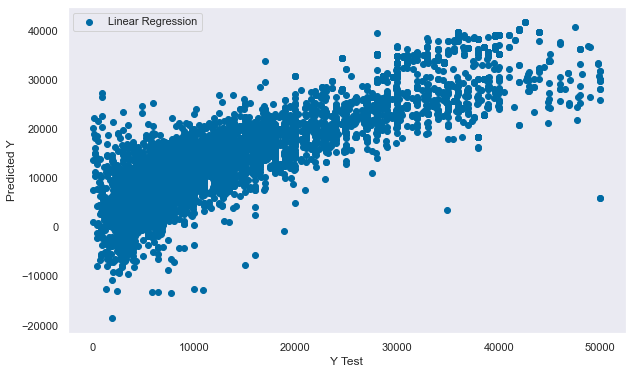

In [154]:
#figure all values
plt.figure(figsize = (10,6))
plt.scatter(y_test, y_pred, label='Linear Regression')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.legend(loc='upper left');
plt.grid()

In [151]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics 
regressor = LinearRegression()
y_pred_cros = cross_val_predict(regressor, X, y, cv=10)
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred_cros))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y, y_pred_cros))  
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y, y_pred_cros)))

Mean Absolute Error: 4521.754903471883
Mean Squared Error (MSE): 37873057.593026906
Root Mean Squared Error : 6154.109000743073


In [153]:
y_pred_cros.shape

(27546, 1)

In [150]:
y_pred.shape

(5510, 1)

In [152]:
from sklearn.metrics import r2_score
print('r2_score:', r2_score(y, y_pred_cros)) 

r2_score: 0.7389292723847731


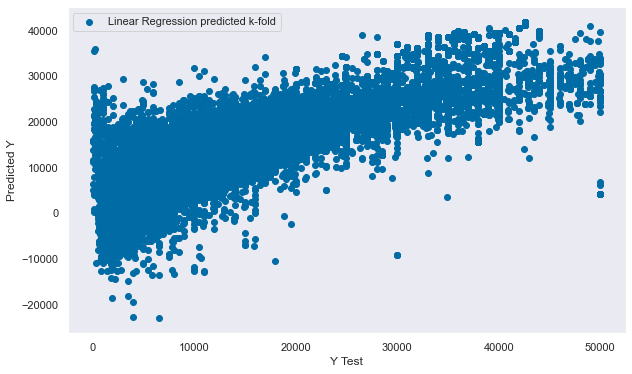

In [156]:
#figure all values
plt.figure(figsize = (10,6))
plt.scatter(y, y_pred_cros, label='Linear Regression predicted k-fold')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.legend(loc='upper left');
plt.grid()

* It is a certain high value for linear regression as an algorithm, which has been achieved after debugging the dataset and introducing conditions and filters in such a way that a subset of the same has been created that has favoured the score

### Linear regression Statsmodel

In [141]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     4969.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:05:04   Log-Likelihood:            -2.2267e+05
No. Observations:               22036   AIC:                         4.454e+05
Df Residuals:                   22021   BIC:                         4.455e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.038e+04    336.257     60.611   

* The value of r2 is very similar to the one provided by the algorithm of the sckitlearn library, we are still talking about the environment of 0.76

## Ridge

* In ridge regression, the cost function is altered by adding a penalty equivalent to square of the magnitude of the coefficients

In [157]:
from sklearn.linear_model import Ridge, Lasso

In [158]:
regressor_ridge = Ridge(alpha=1.0)
regressor_ridge.fit(X_train, y_train)

Ridge()

In [159]:
regressor_ridge.score(X_test,y_test)
y_pred_ridge = regressor_ridge.predict(X_test)

In [160]:
print("Error metrices with using RIDGE")
print('Mean Absolute Error(MAE) with RIDGE:', metrics.mean_absolute_error(y_test, y_pred_ridge))  
print('Mean Squared Error (MSE) with RIDGE:', metrics.mean_squared_error(y_test, y_pred_ridge))  
print('Root Mean Squared Error  with RIDGE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)))

Error metrices with using RIDGE
Mean Absolute Error(MAE) with RIDGE: 4279.4831997819065
Mean Squared Error (MSE) with RIDGE: 33113262.381451316
Root Mean Squared Error  with RIDGE: 5754.412427125059


In [161]:
from sklearn.metrics import r2_score

print("R2 using RIDGE                 :", r2_score(y_test, y_pred_ridge))


R2 using RIDGE                 : 0.767701115154576


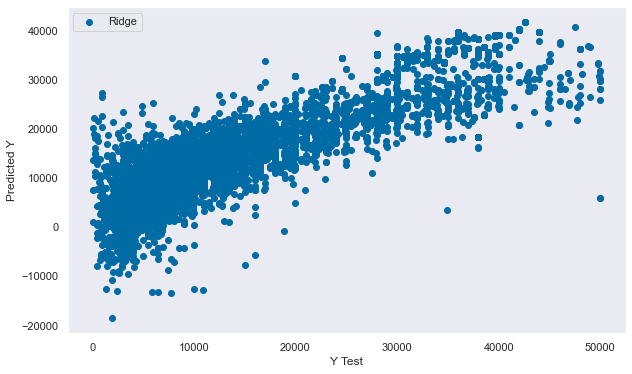

In [162]:
#figure all values
plt.figure(figsize = (10,6))
plt.scatter(y_test, y_pred_ridge, label='Ridge')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.legend(loc='upper left');
plt.grid()

* Rigde Regression, also called contracted regression or Tikhonov regularization, regularizes the resulting model by imposing a penalty on the size of the coefficients of the linear relationship between the predictive features and the target variable. In this case, the improvement in the R2 score is minimal.

## Lasso

* Lasso -Least Absolute Shrinkage and Selection Operator- is a linear model that will ignore some of the predictive features, which can be considered a type of automatic feature selection. Including fewer features means an easier-to-interpret model that can bring out the most important features of the data set. He has not offered any improvement.

In [163]:
regressor_lasso=Lasso(alpha = 2, max_iter = 1000, tol = 1e-5)
regressor_lasso.fit(X_train,y_train)
y_pred_lasso = regressor_lasso.predict(X_test)

In [164]:
print("Error metrices with using LASSO")
print('Mean Absolute Error(MAE) with LASSO:', metrics.mean_absolute_error(y_test, y_pred_lasso))  
print('Mean Squared Error (MSE) with LASSO:', metrics.mean_squared_error(y_test, y_pred_lasso))  
print('Root Mean Squared Error  with LASSO:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))

Error metrices with using LASSO
Mean Absolute Error(MAE) with LASSO: 4279.485525517419
Mean Squared Error (MSE) with LASSO: 33113300.08664563
Root Mean Squared Error  with LASSO: 5754.415703322591


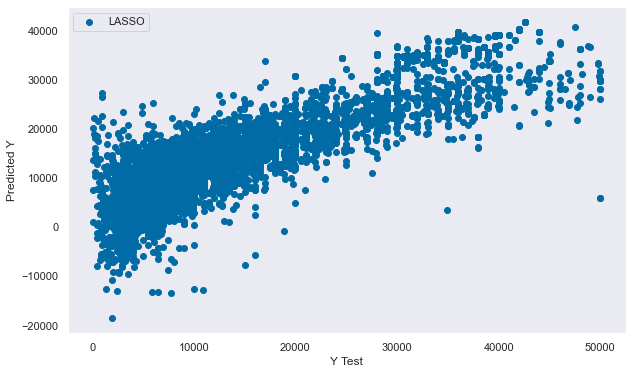

In [165]:
#figure all values
plt.figure(figsize = (10,6))
plt.scatter(y_test, y_pred_lasso, label='LASSO')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.legend(loc='upper left');
plt.grid()

In [166]:
from sklearn.metrics import r2_score

print("R2 using LASSO                 :", r2_score(y_test, y_pred_lasso))

R2 using LASSO                 : 0.7677008506419921


* 4 different models (linear regression scikit learn, Stats, ridge and Lasso,predicted values with actual prices. They have quite similar ranges

## Decision Tree

In [167]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [168]:
y_pred_dtr = dtr.predict(X_test)

In [169]:
print('Train Prediction:', dtr.score(X_train,y_train))
print('Test  Prediction:', dtr.score(X_test,y_pred_dtr))

Train Prediction: 0.9999309304646572
Test  Prediction: 1.0


### K-Folds Cross Validation

In k-fold cross validation .

In [170]:
from sklearn.model_selection import cross_val_score
train_scores = cross_val_score(dtr, X_train, y_train, cv=10).mean()
test_scores = cross_val_score(dtr, X_test, y_test, cv=10).mean()

In [171]:
print('Train Scores:',train_scores)
print('Test  Scores:',test_scores)

Train Scores: 0.8654643916278337
Test  Scores: 0.8176810435266473


In [172]:
cal = pd.DataFrame(np.c_[y_test,y_pred_dtr],columns = ['actual Price','predicted Price'])
cal

actual Price  predicted Price
0          10905.0           8250.0
1           5500.0           8250.0
2           1000.0           2650.0
3          14990.0          14990.0
4           5500.0           3000.0
...            ...              ...
5505       11995.0          12995.0
5506        6850.0           4495.0
5507       33495.0          36990.0
5508       47995.0          47995.0
5509       10999.0          10999.0

[5510 rows x 2 columns]

In [173]:
print(dtr.get_depth())
print(dtr.get_n_leaves())

38
16270


### Decision Tree with GridSearchCV

With GridSearchCV, we will have different parameter sets and pick to best option for the model after training

In [174]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [2,10,15,20,50],
          'min_samples_split': [2,3,4,5,10],
          'min_samples_leaf': [1,2,5]}
pp_dtr = DecisionTreeRegressor()
gcv = GridSearchCV(estimator=pp_dtr,param_grid=params)
gcv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 10, 15, 20, 50],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 3, 4, 5, 10]})

In [175]:
model = gcv.best_estimator_
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=10)

In [176]:
train_scores_dtr = cross_val_score(model, X_train, y_train, cv=10)
print('Train Scores:',train_scores.mean())

Train Scores: 0.8654643916278337


In [177]:
test_scores_dtr = cross_val_score(model, X_test, y_test, cv=10)
print('Test  Scores:',test_scores.mean())

Test  Scores: 0.8176810435266473


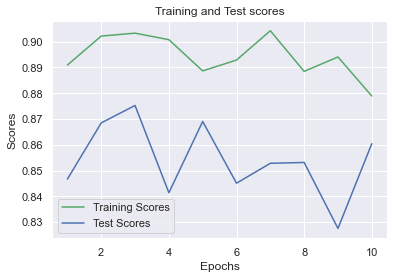

In [178]:
#Plot
import matplotlib.pyplot as plt
loss_train =train_scores_dtr
loss_val = test_scores_dtr
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training Scores')
plt.plot(epochs, loss_val, 'b', label='Test Scores')
plt.title('Training and Test scores')
plt.xlabel('Epochs')
plt.ylabel('Scores')
plt.legend()
plt.show()

* Above we plotted training and test scores. Although training scores are high, we can see test score is much lower than worse training score 
* After applying K-fold cross-validation and tunning with GridsearchCV, the score  does not noticeably improve

In [181]:
print("Error metrices with using Decision Tree")
print('Mean Absolute Error(MAE) with Decision Tree:', metrics.mean_absolute_error(y_test, y_pred_dtr))  
print('Mean Squared Error (MSE) with Decision Tree:', metrics.mean_squared_error(y_test, y_pred_dtr))  
print('Root Mean Squared Error  with Decision Tree:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dtr)))

Error metrices with using Decision Tree
Mean Absolute Error(MAE) with Decision Tree: 2444.7783121597095
Mean Squared Error (MSE) with Decision Tree: 20162415.123366605
Root Mean Squared Error  with Decision Tree: 4490.257801437085


In [180]:
from sklearn.metrics import r2_score
print("R2 using  Decision Tree:", r2_score(y_test, y_pred_dtr))


R2 using  Decision Tree: 0.858554965228307


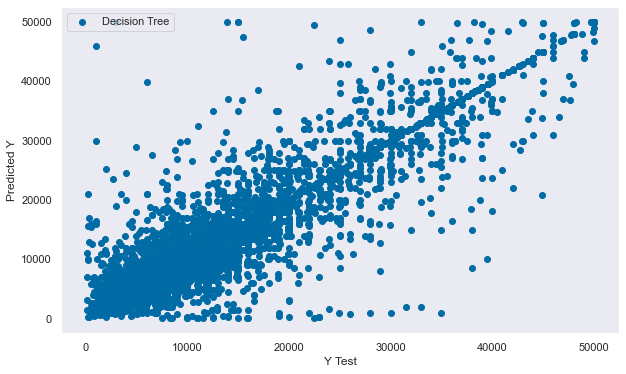

In [182]:
#figure all values
plt.figure(figsize = (10,6))
plt.scatter(y_test, y_pred_dtr, label='Decision Tree')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.legend(loc='upper left');
plt.grid()

Decision trees require little data preparation and behave well with large volumes of data, so it is seen that the result improves by almost 10 points over linear regressions

## Random Forest Regression

In [183]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train.values.ravel())

RandomForestRegressor()

In [184]:
y_pred_rf = rf.predict(X_test)

In [185]:
print('Train Prediction:', rf.score(X_train,y_train))
print('Test  Prediction:', rf.score(X_test,y_pred_rf))

Train Prediction: 0.990497354788239
Test  Prediction: 1.0


### K-Folds Cross Validation

In [186]:
from sklearn.model_selection import cross_val_score

In [187]:
train_scores_rf = cross_val_score(rf, X_train, y_train.values.ravel(), cv=10)
test_scores_rf = cross_val_score(rf, X_test, y_test.values.ravel(), cv=10)

In [188]:
print('Train Scores:',train_scores_rf.mean())
print('Test  Scores:',test_scores_rf.mean())

Train Scores: 0.9312474689670273
Test  Scores: 0.9122481701730265


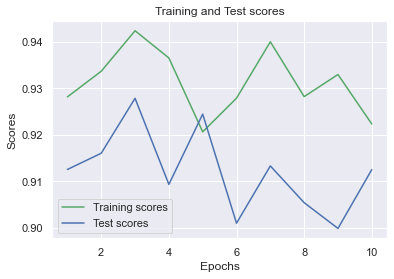

In [189]:
#Plot
import matplotlib.pyplot as plt
loss_train =train_scores_rf
loss_val = test_scores_rf
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training scores')
plt.plot(epochs, loss_val, 'b', label='Test scores')
plt.title('Training and Test scores')
plt.xlabel('Epochs')
plt.ylabel('Scores')
plt.legend()
plt.show()

In [190]:
print("Error metrices with using Random Forest Regression")
print('Mean Absolute Error(MAE) with Random Forest Regression:', metrics.mean_absolute_error(y_test, y_pred_rf))  
print('Mean Squared Error (MSE) with Random Forest Regression:', metrics.mean_squared_error(y_test, y_pred_rf))  
print('Root Mean Squared Error  with Random Forest Regression:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

Error metrices with using Random Forest Regression
Mean Absolute Error(MAE) with Random Forest Regression: 1742.2483519963703
Mean Squared Error (MSE) with Random Forest Regression: 9176092.550454892
Root Mean Squared Error  with Random Forest Regression: 3029.206587615789


In [ ]:
After applying K-fold cross-validation and tunning with GridsearchCV, the score  does not noticeably improve

In [191]:
from sklearn.metrics import r2_score
print("R2 using  Random Forest Regression:", r2_score(y_test, y_pred_rf))


R2 using  Random Forest Regression: 0.9356271199692149


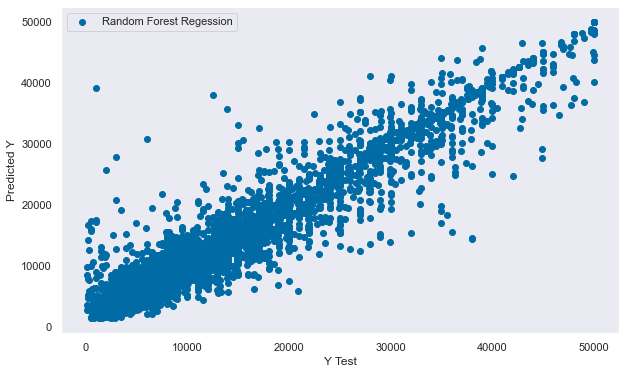

In [204]:
#figure all values
plt.figure(figsize = (10,6))
plt.scatter(y_test, y_pred_rf, label='Random Forest Regession')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.legend(loc='upper left');
plt.grid()

* The random forest is the first algorithm that provides a competitive model exceeding 90% of R2 score.

## XGBOOST

- Gradient boosting refers to a class of ensemble machine learning algorithms that can be used for classification or regression predictive modeling problems.
- Ensembles are constructed from decision tree models. Trees are added one at a time to the ensemble and fit to correct the prediction errors made by prior models. This is a type of ensemble machine learning model referred to as boosting.
- Models are fit using any arbitrary differentiable loss function and gradient descent optimization algorithm. This gives the technique its name, “gradient boosting,” as the loss gradient is minimized as the model is fit, much like a neural network.

In [327]:
# check xgboost version
import xgboost as xgb
print(xgb.__version__)

1.5.2


In [328]:
# Create the parameter grid
param_grid = {
     'learning_rate': np.arange(0.01, 0.5, 0.1),
    'max_depth': np.arange(3, 30, 2),
    'n_estimators': np.arange(50, 200, 15)
}

In [329]:
# create an xgboost regression model
xgb_model=xgb.XGBRegressor()

In [330]:
from sklearn.model_selection import RandomizedSearchCV

In [331]:
rand_neg_mse = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=10, scoring='neg_mean_squared_error', cv=3)

In [332]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [333]:
y_pred_xgb = xgb_model.predict(X_test)

### Feature importances

<BarContainer object of 14 artists>

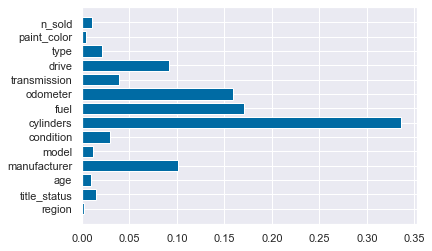

In [344]:
plt.barh(features, xgb_model.feature_importances_)

The most important characteristics, the ones that most influence the divisions during the model building process are: Odometer, cylinders, fuel, transmission and manufacturer.
Importance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more an attribute is used to make key decisions with decision trees, the higher its relative importance.
This importance is calculated explicitly for each attribute in the dataset, allowing attributes to be ranked and compared to each other.


### Metrics

In [337]:
print("Error metrices with using XGBoost")
print('Mean Absolute Error(MAE) with XGBoost:', metrics.mean_absolute_error(y_test, y_pred_xgb))  
print('Mean Squared Error (MSE) with XGBoost:', metrics.mean_squared_error(y_test, y_pred_xgb))  
print('Root Mean Squared Error  with XGBoost:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb)))

Error metrices with using XGBoost
Mean Absolute Error(MAE) with XGBoost: 2038.2411313799462
Mean Squared Error (MSE) with XGBoost: 9601891.39356654
Root Mean Squared Error  with XGBoost: 3098.6918842580235


In [338]:
print('r2_score:', r2_score(y_test, y_pred_xgb))

r2_score: 0.9326400208642136


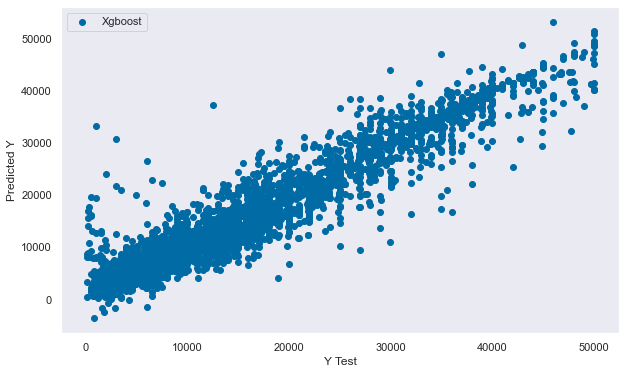

In [228]:
#figure all values
plt.figure(figsize = (10,6))
plt.scatter(y_test, y_pred_xgb, label='Xgboost')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.legend(loc='upper left');
plt.grid()

In [202]:
Comparison = pd.DataFrame(np.c_[y_test,y_pred_xgb],columns = ['actual Price','predicted Price'])
Comparison

actual Price  predicted Price
0          10905.0      9197.368164
1           5500.0     11504.345703
2           1000.0      2337.907227
3          14990.0     12827.632812
4           5500.0      5008.143555
...            ...              ...
5505       11995.0     14920.031250
5506        6850.0      6850.343750
5507       33495.0     32472.707031
5508       47995.0     49252.792969
5509       10999.0      9589.933594

[5510 rows x 2 columns]

In [203]:
# Saving model
joblib.dump(xgb_model,'xgb_model.pkl')

['xgb_model.pkl']

### Prediction

In [263]:
def get_price_xgb_model(region, title_status, condition, age, manufacturer, model,
       cylinders, fuel, odometer, transmission, drive, cartype,
       paint_color, n_sold):
    
    region_dict = {'SF bay area': 0,
                     'abilene': 1,
                     'akron / canton': 2,
                     'albany': 3,
                     'albuquerque': 4,
                     'altoona-johnstown': 5,
                     'amarillo': 6,
                     'ames': 7,
                     'anchorage / mat-su': 8,
                     'ann arbor': 9,
                     'annapolis': 10,
                     'appleton-oshkosh-FDL': 11,
                     'asheville': 12,
                     'ashtabula': 13,
                     'athens': 14,
                     'atlanta': 15,
                     'auburn': 16,
                     'augusta': 17,
                     'austin': 18,
                     'bakersfield': 19,
                     'baltimore': 20,
                     'baton rouge': 21,
                     'battle creek': 22,
                     'beaumont / port arthur': 23,
                     'bellingham': 24,
                     'bemidji': 25,
                     'bend': 26,
                     'billings': 27,
                     'binghamton': 28,
                     'birmingham': 29,
                     'bismarck': 30,
                     'bloomington': 31,
                     'bloomington-normal': 32,
                     'boise': 33,
                     'boone': 34,
                     'boston': 35,
                     'boulder': 36,
                     'bowling green': 37,
                     'bozeman': 38,
                     'brainerd': 39,
                     'brownsville': 40,
                     'brunswick': 41,
                     'buffalo': 42,
                     'butte': 43,
                     'cape cod / islands': 44,
                     'catskills': 45,
                     'cedar rapids': 46,
                     'central NJ': 47,
                     'central louisiana': 48,
                     'central michigan': 49,
                     'champaign urbana': 50,
                     'charleston': 51,
                     'charlotte': 52,
                     'charlottesville': 53,
                     'chattanooga': 54,
                     'chautauqua': 55,
                     'chicago': 56,
                     'chico': 57,
                     'chillicothe': 58,
                     'cincinnati': 59,
                     'clarksville': 60,
                     'cleveland': 61,
                     'clovis / portales': 62,
                     'college station': 63,
                     'colorado springs': 64,
                     'columbia': 65,
                     'columbia / jeff city': 66,
                     'columbus': 67,
                     'cookeville': 68,
                     'corpus christi': 69,
                     'corvallis/albany': 70,
                     'cumberland valley': 71,
                     'dallas / fort worth': 72,
                     'danville': 73,
                     'dayton / springfield': 74,
                     'daytona beach': 75,
                     'decatur': 76,
                     'deep east texas': 77,
                     'del rio / eagle pass': 78,
                     'delaware': 79,
                     'denver': 80,
                     'des moines': 81,
                     'detroit metro': 82,
                     'dothan': 83,
                     'dubuque': 84,
                     'duluth / superior': 85,
                     'east idaho': 86,
                     'east oregon': 87,
                     'eastern CO': 88,
                     'eastern CT': 89,
                     'eastern NC': 90,
                     'eastern kentucky': 91,
                     'eastern montana': 92,
                     'eastern panhandle': 93,
                     'eastern shore': 94,
                     'eau claire': 95,
                     'el paso': 96,
                     'elko': 97,
                     'elmira-corning': 98,
                     'erie': 99,
                     'eugene': 100,
                     'evansville': 101,
                     'fairbanks': 102,
                     'fargo / moorhead': 103,
                     'farmington': 104,
                     'fayetteville': 105,
                     'finger lakes': 106,
                     'flagstaff / sedona': 107,
                     'flint': 108,
                     'florence': 109,
                     'florence / muscle shoals': 110,
                     'florida keys': 111,
                     'fort collins / north CO': 112,
                     'fort dodge': 113,
                     'fort smith': 114,
                     'fort wayne': 115,
                     'frederick': 116,
                     'fredericksburg': 117,
                     'fresno / madera': 118,
                     'ft myers / SW florida': 119,
                     'gadsden-anniston': 120,
                     'gainesville': 121,
                     'galveston': 122,
                     'glens falls': 123,
                     'gold country': 124,
                     'grand forks': 125,
                     'grand island': 126,
                     'grand rapids': 127,
                     'great falls': 128,
                     'green bay': 129,
                     'greensboro': 130,
                     'greenville / upstate': 131,
                     'gulfport / biloxi': 132,
                     'hanford-corcoran': 133,
                     'harrisburg': 134,
                     'harrisonburg': 135,
                     'hartford': 136,
                     'hattiesburg': 137,
                     'hawaii': 138,
                     'heartland florida': 139,
                     'helena': 140,
                     'hickory / lenoir': 141,
                     'high rockies': 142,
                     'hilton head': 143,
                     'holland': 144,
                     'houma': 145,
                     'houston': 146,
                     'hudson valley': 147,
                     'humboldt county': 148,
                     'huntington-ashland': 149,
                     'huntsville / decatur': 150,
                     'imperial county': 151,
                     'indianapolis': 152,
                     'inland empire': 153,
                     'iowa city': 154,
                     'ithaca': 155,
                     'jackson': 156,
                     'jacksonville': 157,
                     'janesville': 158,
                     'jersey shore': 159,
                     'jonesboro': 160,
                     'joplin': 161,
                     'kalamazoo': 162,
                     'kalispell': 163,
                     'kansas city, MO': 164,
                     'kenai peninsula': 165,
                     'kennewick-pasco-richland': 166,
                     'kenosha-racine': 167,
                     'killeen / temple / ft hood': 168,
                     'kirksville': 169,
                     'klamath falls': 170,
                     'knoxville': 171,
                     'kokomo': 172,
                     'la crosse': 173,
                     'la salle co': 174,
                     'lafayette': 175,
                     'lafayette / west lafayette': 176,
                     'lake charles': 177,
                     'lake of the ozarks': 178,
                     'lakeland': 179,
                     'lancaster': 180,
                     'lansing': 181,
                     'laredo': 182,
                     'las cruces': 183,
                     'las vegas': 184,
                     'lawrence': 185,
                     'lawton': 186,
                     'lehigh valley': 187,
                     'lewiston / clarkston': 188,
                     'lexington': 189,
                     'lima / findlay': 190,
                     'lincoln': 191,
                     'little rock': 192,
                     'logan': 193,
                     'long island': 194,
                     'los angeles': 195,
                     'louisville': 196,
                     'lubbock': 197,
                     'lynchburg': 198,
                     'macon / warner robins': 199,
                     'madison': 200,
                     'maine': 201,
                     'manhattan': 202,
                     'mankato': 203,
                     'mansfield': 204,
                     'mason city': 205,
                     'mattoon-charleston': 206,
                     'mcallen / edinburg': 207,
                     'meadville': 208,
                     'medford-ashland': 209,
                     'memphis': 210,
                     'mendocino county': 211,
                     'merced': 212,
                     'meridian': 213,
                     'milwaukee': 214,
                     'minneapolis / st paul': 215,
                     'missoula': 216,
                     'mobile': 217,
                     'modesto': 218,
                     'mohave county': 219,
                     'monroe': 220,
                     'monterey bay': 221,
                     'montgomery': 222,
                     'morgantown': 223,
                     'moses lake': 224,
                     'muncie / anderson': 225,
                     'muskegon': 226,
                     'myrtle beach': 227,
                     'nashville': 228,
                     'new hampshire': 229,
                     'new haven': 230,
                     'new orleans': 231,
                     'new river valley': 232,
                     'new york city': 233,
                     'norfolk / hampton roads': 234,
                     'north central FL': 235,
                     'north dakota': 236,
                     'north jersey': 237,
                     'north mississippi': 238,
                     'north platte': 239,
                     'northeast SD': 240,
                     'northern WI': 241,
                     'northern michigan': 242,
                     'northern panhandle': 243,
                     'northwest CT': 244,
                     'northwest GA': 245,
                     'northwest KS': 246,
                     'northwest OK': 247,
                     'ocala': 248,
                     'odessa / midland': 249,
                     'ogden-clearfield': 250,
                     'okaloosa / walton': 251,
                     'oklahoma city': 252,
                     'olympic peninsula': 253,
                     'omaha / council bluffs': 254,
                     'oneonta': 255,
                     'orange county': 256,
                     'oregon coast': 257,
                     'orlando': 258,
                     'outer banks': 259,
                     'owensboro': 260,
                     'palm springs': 261,
                     'panama city': 262,
                     'parkersburg-marietta': 263,
                     'pensacola': 264,
                     'peoria': 265,
                     'philadelphia': 266,
                     'phoenix': 267,
                     'pierre / central SD': 268,
                     'pittsburgh': 269,
                     'plattsburgh-adirondacks': 270,
                     'poconos': 271,
                     'port huron': 272,
                     'portland': 273,
                     'potsdam-canton-massena': 274,
                     'prescott': 275,
                     'provo / orem': 276,
                     'pueblo': 277,
                     'pullman / moscow': 278,
                     'quad cities, IA/IL': 279,
                     'raleigh / durham / CH': 280,
                     'rapid city / west SD': 281,
                     'reading': 282,
                     'redding': 283,
                     'reno / tahoe': 284,
                     'rhode island': 285,
                     'richmond': 286,
                     'roanoke': 287,
                     'rochester': 288,
                     'rockford': 289,
                     'roseburg': 290,
                     'roswell / carlsbad': 291,
                     'sacramento': 292,
                     'saginaw-midland-baycity': 293,
                     'salem': 294,
                     'salina': 295,
                     'salt lake city': 296,
                     'san angelo': 297,
                     'san antonio': 298,
                     'san diego': 299,
                     'san luis obispo': 300,
                     'san marcos': 301,
                     'sandusky': 302,
                     'santa barbara': 303,
                     'santa fe / taos': 304,
                     'santa maria': 305,
                     'sarasota-bradenton': 306,
                     'savannah / hinesville': 307,
                     'scottsbluff / panhandle': 308,
                     'scranton / wilkes-barre': 309,
                     'seattle-tacoma': 310,
                     'sheboygan': 311,
                     'show low': 312,
                     'shreveport': 313,
                     'sierra vista': 314,
                     'sioux city': 315,
                     'sioux falls / SE SD': 316,
                     'siskiyou county': 317,
                     'skagit / island / SJI': 318,
                     'south bend / michiana': 319,
                     'south coast': 320,
                     'south dakota': 321,
                     'south florida': 322,
                     'south jersey': 323,
                     'southeast IA': 324,
                     'southeast KS': 325,
                     'southeast alaska': 326,
                     'southeast missouri': 327,
                     'southern WV': 328,
                     'southern illinois': 329,
                     'southern maryland': 330,
                     'southwest KS': 331,
                     'southwest MN': 332,
                     'southwest VA': 333,
                     'southwest michigan': 334,
                     'space coast': 335,
                     "spokane / coeur d'alene": 336,
                     'springfield': 337,
                     'st augustine': 338,
                     'st cloud': 339,
                     'st george': 340,
                     'st joseph': 341,
                     'st louis': 342,
                     'st louis, MO': 343,
                     'state college': 344,
                     'statesboro': 345,
                     'stillwater': 346,
                     'stockton': 347,
                     'susanville': 348,
                     'syracuse': 349,
                     'tallahassee': 350,
                     'tampa bay area': 351,
                     'terre haute': 352,
                     'texarkana': 353,
                     'texoma': 354,
                     'the thumb': 355,
                     'toledo': 356,
                     'topeka': 357,
                     'treasure coast': 358,
                     'tri-cities': 359,
                     'tucson': 360,
                     'tulsa': 361,
                     'tuscaloosa': 362,
                     'tuscarawas co': 363,
                     'twin falls': 364,
                     'twin tiers NY/PA': 365,
                     'tyler / east TX': 366,
                     'upper peninsula': 367,
                     'utica-rome-oneida': 368,
                     'valdosta': 369,
                     'ventura county': 370,
                     'vermont': 371,
                     'victoria': 372,
                     'visalia-tulare': 373,
                     'waco': 374,
                     'washington, DC': 375,
                     'waterloo / cedar falls': 376,
                     'watertown': 377,
                     'wausau': 378,
                     'wenatchee': 379,
                     'west virginia (old)': 380,
                     'western IL': 381,
                     'western KY': 382,
                     'western maryland': 383,
                     'western massachusetts': 384,
                     'western slope': 385,
                     'wichita': 386,
                     'wichita falls': 387,
                     'williamsport': 388,
                     'wilmington': 389,
                     'winchester': 390,
                     'winston-salem': 391,
                     'worcester / central MA': 392,
                     'wyoming': 393,
                     'yakima': 394,
                     'york': 395,
                     'youngstown': 396,
                     'yuba-sutter': 397,
                     'yuma': 398,
                     'zanesville / cambridge': 399}
    title_status_dict = {'clean': 0,
                     'lien': 1,
                     'missing': 2,
                     'parts only': 3,
                     'rebuilt': 4,
                     'salvage': 5}
    model_dict = {'1500': 0,
                 '1500 crew cab big horn': 1,
                 '1500 quad cab harvest pickup': 2,
                 '200': 3,
                 '2500': 4,
                 '3': 5,
                 '300': 6,
                 '328i': 7,
                 '3500': 8,
                 '370z nismo coupe 2d': 9,
                 '4runner': 10,
                 'a4': 11,
                 'acadia': 12,
                 'accord': 13,
                 'altima': 14,
                 'camaro': 15,
                 'camaro ss coupe 2d': 16,
                 'camry': 17,
                 'camry le': 18,
                 'challenger r/t coupe 2d': 19,
                 'charger': 20,
                 'cherokee': 21,
                 'civic': 22,
                 'civic lx': 23,
                 'colorado': 24,
                 'colorado extended cab': 25,
                 'corolla': 26,
                 'corvette': 27,
                 'corvette grand sport': 28,
                 'cr-v': 29,
                 'cruze': 30,
                 'durango': 31,
                 'edge': 32,
                 'elantra': 33,
                 'enclave': 34,
                 'equinox': 35,
                 'escalade': 36,
                 'escape': 37,
                 'expedition': 38,
                 'expedition xlt sport': 39,
                 'explorer': 40,
                 'f-250': 41,
                 'f150': 42,
                 'f250 super duty': 43,
                 'fit': 44,
                 'focus': 45,
                 'focus se': 46,
                 'forester': 47,
                 'frontier': 48,
                 'frontier crew cab pro-4x': 49,
                 'fusion': 50,
                 'fusion se': 51,
                 'grand caravan': 52,
                 'grand cherokee': 53,
                 'highlander': 54,
                 'impala': 55,
                 'impreza': 56,
                 'jetta': 57,
                 'legacy': 58,
                 'liberty': 59,
                 'malibu': 60,
                 'maxima': 61,
                 'mdx': 62,
                 'mustang': 63,
                 'mustang gt coupe 2d': 64,
                 'odyssey': 65,
                 'optima': 66,
                 'outback': 67,
                 'passat': 68,
                 'pathfinder': 69,
                 'patriot': 70,
                 'pilot': 71,
                 'prius': 72,
                 'ranger': 73,
                 'rav4': 74,
                 'rogue': 75,
                 'rx 350': 76,
                 'santa fe': 77,
                 'sentra': 78,
                 'sienna': 79,
                 'sierra': 80,
                 'sierra 1500': 81,
                 'sierra 2500 hd double cab': 82,
                 'sierra 2500hd': 83,
                 'silverado': 84,
                 'silverado 1500 double': 85,
                 'silverado 1500 ld': 86,
                 'silverado 2500hd': 87,
                 'sonata': 88,
                 'soul': 89,
                 'suburban': 90,
                 'super duty f-250 srw': 91,
                 'super duty f-550 drw': 92,
                 'tacoma': 93,
                 'tacoma double cab pickup': 94,
                 'tahoe': 95,
                 'taurus': 96,
                 'town & country': 97,
                 'transit': 98,
                 'traverse': 99,
                 'tundra': 100,
                 'versa': 101,
                 'wrangler': 102,
                 'wrangler unlimited': 103,
                 'wrangler unlimited rubicon': 104,
                 'wrangler unlimited sport': 105,
                 'x5': 106,
                 'yukon': 107}
    manufacturer_dic = {'acura': 0,
                     'audi': 1,
                     'bmw': 2,
                     'buick': 3,
                     'cadillac': 4,
                     'chevrolet': 5,
                     'chrysler': 6,
                     'dodge': 7,
                     'ford': 8,
                     'gmc': 9,
                     'honda': 10,
                     'hyundai': 11,
                     'jeep': 12,
                     'kia': 13,
                     'lexus': 14,
                     'mazda': 15,
                     'nissan': 16,
                     'ram': 17,
                     'subaru': 18,
                     'toyota': 19,
                     'volkswagen': 20}
    
    condition_dict = {'excellent': 0, 'fair': 1, 'good': 2, 'like new': 3, 'new': 4, 'salvage': 5}
    cylinders_dict = {'10 cylinders': 0,
                     '12 cylinders': 1,
                     '3 cylinders': 2,
                     '4 cylinders': 3,
                     '5 cylinders': 4,
                     '6 cylinders': 5,
                     '8 cylinders': 6,
                     'other': 7}
    fuel_dict = {'diesel': 0, 'electric': 1, 'gas': 2, 'hybrid': 3, 'other': 4}
    transmission_dict = {'automatic': 0, 'manual': 1, 'other': 2}
    drive_dict = {'SUV': 0,
                 'bus': 1,
                 'convertible': 2,
                 'coupe': 3,
                 'hatchback': 4,
                 'mini-van': 5,
                 'offroad': 6,
                 'other': 7,
                 'pickup': 8,
                 'sedan': 9,
                 'truck': 10,
                 'van': 11,
                 'wagon': 12}
    cartype_dict = {'SUV': 0,
                     'bus': 1,
                     'convertible': 2,
                     'coupe': 3,
                     'hatchback': 4,
                     'mini-van': 5,
                     'offroad': 6,
                     'other': 7,
                     'pickup': 8,
                     'sedan': 9,
                     'truck': 10,
                     'van': 11,
                     'wagon': 12}
    paint_color_dict = {'black': 0,
                     'blue': 1,
                     'brown': 2,
                     'custom': 3,
                     'green': 4,
                     'grey': 5,
                     'orange': 6,
                     'purple': 7,
                     'red': 8,
                     'silver': 9,
                     'white': 10,
                     'yellow': 11}
    features = ['region', 'title_status', 'condition', 'age', 'manufacturer', 'model',
       'cylinders', 'fuel', 'odometer', 'transmission', 'drive', 'cartype',
       'paint_color', 'n_sold']
    

    test_array = [region_dict[region],
                  title_status_dict[title_status],
                  condition_dict[condition],
                  age,
                  manufacturer_dic[manufacturer],
                  model_dict[model],
                  cylinders_dict[cylinders],
                  fuel_dict[fuel],
                  odometer,
                  transmission_dict[transmission],
                  drive_dict[drive],
                  cartype_dict[cartype],
                  paint_color_dict[paint_color],
                  n_sold]                                         


   
    test_array = np.array(test_array) # convert into numpy array
    
    test_array = test_array.reshape(1,-1) #reshape
    test_df = pd.DataFrame(test_array, columns = features)
 
    
    #declare path where you saved your model
    model_path = 'xgb_model.pkl'
    #open file
    file = open(model_path, "rb")
    #load the trained model
    trained_model = joblib.load(file)


    prediction = int(trained_model.predict(test_df))
    return prediction

In [264]:
price = get_price_xgb_model('atlanta',
                  'clean',
                  'excellent',
                  5,
                  'ford',
                  'focus',
                  '4 cylinders',
                  'gas',
                  100000,
                  'manual',
                  'sedan',
                  'coupe',
                  'silver',
                  10)
print(price)

13732


## XGBoost with Baesian optimization

In [230]:
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [247]:
space={'n_estimators':hp.choice('n_estimators', np.arange(2,30,1)),
       'max_depth': hp.choice("max_depth", np.arange(2, 20, 1)),
       'eta': hp.quniform('eta', 0.001, 0.8, 0.001),
        'gamma': hp.quniform('gamma', 0, 10, 0.1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
       'subsample' : hp.quniform('subsample', 0.01, 1, 0.01),
       'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.01)
      }

In [248]:
def hyperparameter_tuning(space):
    print(space)
    model = xgb.XGBRegressor(n_estimators=space['n_estimators'],
                             max_depth =space['max_depth'],
                             eta=space['eta'],
                             gamma=space['gamma'],
                           min_child_weight=space['min_child_weight'],
                            colsample_bytree=space['colsample_bytree'],
                            subsample=space['subsample'])

    eval_set  = [( X_train, y_train), ( X_test, y_test)]
    model.fit(X_train, y_train,
            eval_set=eval_set, eval_metric="rmse",
            early_stopping_rounds=15,verbose=1)

    y_pred_hyperopt = model.predict(X_test)
    mse_scr = metrics.mean_squared_error(y_test, y_pred_hyperopt)
    print("SCORE:", np.sqrt(mse_scr))
    #change the metric if you like
    return {'loss':mse_scr, 'status': STATUS_OK }

In [249]:
trials = Trials()
best = fmin(fn=hyperparameter_tuning,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

print (best)

{'colsample_bytree': 0.89, 'eta': 0.17, 'gamma': 8.700000000000001, 'max_depth': 13, 'min_child_weight': 1.0, 'n_estimators': 21, 'subsample': 0.23}
[0]	validation_0-rmse:16555.88477	validation_1-rmse:16520.05664                                                        
[1]	validation_0-rmse:13979.74219	validation_1-rmse:13969.75293                                                        
[2]	validation_0-rmse:11864.88769	validation_1-rmse:11880.65723                                                        
[3]	validation_0-rmse:10138.83106	validation_1-rmse:10183.54785                                                        
[4]	validation_0-rmse:8728.18945	validation_1-rmse:8809.97070                                                          
[5]	validation_0-rmse:7543.79688	validation_1-rmse:7655.34082                                                          
[6]	validation_0-rmse:6572.49561	validation_1-rmse:6705.06445                                                          
[7]	validat

[11]	validation_0-rmse:3925.08496	validation_1-rmse:3810.37378                                                         
[12]	validation_0-rmse:3848.15674	validation_1-rmse:3736.88965                                                         
[13]	validation_0-rmse:3798.43213	validation_1-rmse:3690.02124                                                         
[14]	validation_0-rmse:3759.54224	validation_1-rmse:3649.21973                                                         
[15]	validation_0-rmse:3707.02759	validation_1-rmse:3606.32397                                                         
[16]	validation_0-rmse:3685.81274	validation_1-rmse:3590.66089                                                         
[17]	validation_0-rmse:3600.65015	validation_1-rmse:3512.02246                                                         
[18]	validation_0-rmse:3587.74292	validation_1-rmse:3500.38794                                                         
[19]	validation_0-rmse:3568.95459	valida

[16]	validation_0-rmse:4046.36768	validation_1-rmse:3949.67993                                                         
[17]	validation_0-rmse:4018.41089	validation_1-rmse:3918.18115                                                         
[18]	validation_0-rmse:3987.86328	validation_1-rmse:3885.54199                                                         
[19]	validation_0-rmse:3948.18213	validation_1-rmse:3840.33765                                                         
[20]	validation_0-rmse:3883.89990	validation_1-rmse:3778.64185                                                         
[21]	validation_0-rmse:3846.66138	validation_1-rmse:3747.69873                                                         
[22]	validation_0-rmse:3827.47217	validation_1-rmse:3724.77295                                                         
[23]	validation_0-rmse:3793.12354	validation_1-rmse:3695.69165                                                         
SCORE:                                  

[1]	validation_0-rmse:15803.06836	validation_1-rmse:15742.50977                                                        
[2]	validation_0-rmse:14243.21289	validation_1-rmse:14193.28223                                                        
[3]	validation_0-rmse:12900.44336	validation_1-rmse:12869.19629                                                        
[4]	validation_0-rmse:11832.21680	validation_1-rmse:11805.25391                                                        
[5]	validation_0-rmse:10793.15137	validation_1-rmse:10755.17676                                                        
[6]	validation_0-rmse:9868.70898	validation_1-rmse:9819.34570                                                          
[7]	validation_0-rmse:9093.16504	validation_1-rmse:9045.30273                                                          
[8]	validation_0-rmse:8593.32031	validation_1-rmse:8542.59961                                                          
[9]	validation_0-rmse:8075.43603	validat

[9]	validation_0-rmse:7382.97656	validation_1-rmse:7369.78662                                                          
[10]	validation_0-rmse:6872.41553	validation_1-rmse:6875.63916                                                         
[11]	validation_0-rmse:6344.43213	validation_1-rmse:6351.43018                                                         
[12]	validation_0-rmse:5874.71484	validation_1-rmse:5906.95508                                                         
[13]	validation_0-rmse:5554.60596	validation_1-rmse:5591.17480                                                         
[14]	validation_0-rmse:5283.55029	validation_1-rmse:5329.71826                                                         
[15]	validation_0-rmse:4971.05176	validation_1-rmse:5036.02783                                                         
[16]	validation_0-rmse:4769.49365	validation_1-rmse:4850.84228                                                         
[17]	validation_0-rmse:4528.28857	valida

[5]	validation_0-rmse:4402.05176	validation_1-rmse:4420.40283                                                          
[6]	validation_0-rmse:3949.20703	validation_1-rmse:3999.07300                                                          
[7]	validation_0-rmse:3732.57642	validation_1-rmse:3805.95508                                                          
[8]	validation_0-rmse:3655.41699	validation_1-rmse:3734.93213                                                          
[9]	validation_0-rmse:3588.82031	validation_1-rmse:3670.81274                                                          
[10]	validation_0-rmse:3540.83545	validation_1-rmse:3662.50439                                                         
[11]	validation_0-rmse:3471.98364	validation_1-rmse:3623.18994                                                         
[12]	validation_0-rmse:3413.38867	validation_1-rmse:3594.90991                                                         
[13]	validation_0-rmse:3387.42285	valida

[6]	validation_0-rmse:2599.59497	validation_1-rmse:3911.18896                                                          
[7]	validation_0-rmse:2502.76538	validation_1-rmse:3971.65723                                                          
SCORE:                                                                                                                 
3773.8767728143102                                                                                                     
{'colsample_bytree': 0.25, 'eta': 0.577, 'gamma': 9.700000000000001, 'max_depth': 9, 'min_child_weight': 0.0, 'n_estimators': 3, 'subsample': 0.68}
[0]	validation_0-rmse:9516.83398	validation_1-rmse:9494.23242                                                          
[1]	validation_0-rmse:5738.65137	validation_1-rmse:5756.07568                                                          
[2]	validation_0-rmse:4427.70557	validation_1-rmse:4498.63281                                                          
SCORE:      

[26]	validation_0-rmse:661.24579	validation_1-rmse:2999.22583                                                          
SCORE:                                                                                                                 
2999.2263560089086                                                                                                     
{'colsample_bytree': 0.48, 'eta': 0.274, 'gamma': 9.9, 'max_depth': 9, 'min_child_weight': 4.0, 'n_estimators': 27, 'subsample': 0.74}
[0]	validation_0-rmse:14667.30371	validation_1-rmse:14627.57519                                                        
[1]	validation_0-rmse:10988.04883	validation_1-rmse:10968.17285                                                        
[2]	validation_0-rmse:8451.54785	validation_1-rmse:8453.78711                                                          
[3]	validation_0-rmse:6876.84277	validation_1-rmse:6904.93603                                                          
[4]	validation_0-rmse:576

[17]	validation_0-rmse:2924.47095	validation_1-rmse:3237.66528                                                         
[18]	validation_0-rmse:2905.03394	validation_1-rmse:3225.24268                                                         
SCORE:                                                                                                                 
3225.2428760335843                                                                                                     
{'colsample_bytree': 0.22, 'eta': 0.44, 'gamma': 7.1000000000000005, 'max_depth': 16, 'min_child_weight': 4.0, 'n_estimators': 16, 'subsample': 0.62}
[0]	validation_0-rmse:11767.93359	validation_1-rmse:11748.62891                                                        
[1]	validation_0-rmse:7580.60645	validation_1-rmse:7586.00879                                                          
[2]	validation_0-rmse:5389.39697	validation_1-rmse:5497.50342                                                          
[3]	valida

[1]	validation_0-rmse:17763.22070	validation_1-rmse:17715.77734                                                        
[2]	validation_0-rmse:16910.41992	validation_1-rmse:16866.20117                                                        
[3]	validation_0-rmse:16078.78809	validation_1-rmse:16038.89160                                                        
[4]	validation_0-rmse:15316.89453	validation_1-rmse:15284.29688                                                        
[5]	validation_0-rmse:14579.09863	validation_1-rmse:14549.28809                                                        
[6]	validation_0-rmse:13871.73340	validation_1-rmse:13842.37109                                                        
[7]	validation_0-rmse:13209.44434	validation_1-rmse:13178.36719                                                        
[8]	validation_0-rmse:12602.09766	validation_1-rmse:12578.29004                                                        
[9]	validation_0-rmse:12027.36035	valida

[0]	validation_0-rmse:14058.39746	validation_1-rmse:14051.65332                                                        
[1]	validation_0-rmse:10206.64062	validation_1-rmse:10212.33301                                                        
[2]	validation_0-rmse:7585.09912	validation_1-rmse:7642.44238                                                          
[3]	validation_0-rmse:5859.46045	validation_1-rmse:5964.04102                                                          
[4]	validation_0-rmse:4737.40527	validation_1-rmse:4885.79004                                                          
[5]	validation_0-rmse:4001.74634	validation_1-rmse:4221.70703                                                          
[6]	validation_0-rmse:3517.24634	validation_1-rmse:3783.17188                                                          
[7]	validation_0-rmse:3242.87549	validation_1-rmse:3551.42456                                                          
[8]	validation_0-rmse:3067.23438	validat

SCORE:                                                                                                                 
3055.9250689631863                                                                                                     
{'colsample_bytree': 0.9, 'eta': 0.773, 'gamma': 4.800000000000001, 'max_depth': 12, 'min_child_weight': 2.0, 'n_estimators': 22, 'subsample': 0.55}
[0]	validation_0-rmse:6081.01709	validation_1-rmse:6253.67041                                                          
[1]	validation_0-rmse:3448.91504	validation_1-rmse:3971.25708                                                          
[2]	validation_0-rmse:3000.58106	validation_1-rmse:3800.34814                                                          
[3]	validation_0-rmse:2814.69312	validation_1-rmse:3824.84155                                                          
[4]	validation_0-rmse:2641.57812	validation_1-rmse:3854.45557                                                          
[5]	validat

[6]	validation_0-rmse:6688.08105	validation_1-rmse:6760.14893                                                          
[7]	validation_0-rmse:6802.60010	validation_1-rmse:6906.41211                                                          
[8]	validation_0-rmse:7187.76562	validation_1-rmse:7330.73779                                                          
[9]	validation_0-rmse:7664.68652	validation_1-rmse:7811.41748                                                          
[10]	validation_0-rmse:8052.34522	validation_1-rmse:8232.06934                                                         
[11]	validation_0-rmse:8414.80664	validation_1-rmse:8625.52734                                                         
[12]	validation_0-rmse:8821.07910	validation_1-rmse:9081.91504                                                         
[13]	validation_0-rmse:9464.67578	validation_1-rmse:9688.13867                                                         
[14]	validation_0-rmse:9737.01269	valida

[8]	validation_0-rmse:5709.86182	validation_1-rmse:5858.55078                                                          
[9]	validation_0-rmse:5223.44873	validation_1-rmse:5385.76807                                                          
[10]	validation_0-rmse:4757.91602	validation_1-rmse:5018.28564                                                         
[11]	validation_0-rmse:4259.37353	validation_1-rmse:4590.19482                                                         
[12]	validation_0-rmse:3810.66455	validation_1-rmse:4253.02490                                                         
[13]	validation_0-rmse:3599.97388	validation_1-rmse:4069.86060                                                         
[14]	validation_0-rmse:3399.79004	validation_1-rmse:3913.53418                                                         
[15]	validation_0-rmse:3114.57983	validation_1-rmse:3714.39014                                                         
[16]	validation_0-rmse:2951.41968	valida

[2]	validation_0-rmse:9979.91504	validation_1-rmse:10023.17773                                                         
[3]	validation_0-rmse:8087.16406	validation_1-rmse:8157.35791                                                          
[4]	validation_0-rmse:6738.21240	validation_1-rmse:6881.65137                                                          
[5]	validation_0-rmse:5580.12695	validation_1-rmse:5783.73828                                                          
[6]	validation_0-rmse:4669.21777	validation_1-rmse:4944.56445                                                          
[7]	validation_0-rmse:3966.67578	validation_1-rmse:4336.06982                                                          
[8]	validation_0-rmse:3524.43457	validation_1-rmse:3989.68555                                                          
[9]	validation_0-rmse:3206.02368	validation_1-rmse:3735.73340                                                          
[10]	validation_0-rmse:2858.32056	valida

[1]	validation_0-rmse:9448.23242	validation_1-rmse:9419.63379                                                          
[2]	validation_0-rmse:6934.66455	validation_1-rmse:6940.35156                                                          
[3]	validation_0-rmse:5584.05957	validation_1-rmse:5610.28272                                                          
[4]	validation_0-rmse:4728.65772	validation_1-rmse:4797.05420                                                          
[5]	validation_0-rmse:4017.31689	validation_1-rmse:4145.61279                                                          
[6]	validation_0-rmse:3581.22412	validation_1-rmse:3737.26904                                                          
[7]	validation_0-rmse:3325.38696	validation_1-rmse:3526.21436                                                          
[8]	validation_0-rmse:3238.50903	validation_1-rmse:3452.85352                                                          
[9]	validation_0-rmse:3173.11377	validat

[13]	validation_0-rmse:1864.53320	validation_1-rmse:3354.92529                                                         
[14]	validation_0-rmse:1820.55896	validation_1-rmse:3356.39844                                                         
[15]	validation_0-rmse:1780.49377	validation_1-rmse:3359.82251                                                         
[16]	validation_0-rmse:1759.37854	validation_1-rmse:3363.22632                                                         
[17]	validation_0-rmse:1702.64600	validation_1-rmse:3367.85986                                                         
[18]	validation_0-rmse:1684.24304	validation_1-rmse:3370.35840                                                         
[19]	validation_0-rmse:1649.57776	validation_1-rmse:3375.60669                                                         
SCORE:                                                                                                                 
3338.771538838312                       

[6]	validation_0-rmse:8000.77393	validation_1-rmse:7900.70117                                                          
[7]	validation_0-rmse:7410.22998	validation_1-rmse:7293.34522                                                          
[8]	validation_0-rmse:7049.86182	validation_1-rmse:6932.14941                                                          
[9]	validation_0-rmse:6714.67969	validation_1-rmse:6591.12353                                                          
[10]	validation_0-rmse:6390.71240	validation_1-rmse:6257.81836                                                         
[11]	validation_0-rmse:6114.05078	validation_1-rmse:5981.93457                                                         
[12]	validation_0-rmse:5892.63232	validation_1-rmse:5760.70166                                                         
[13]	validation_0-rmse:5720.97900	validation_1-rmse:5590.08057                                                         
[14]	validation_0-rmse:5580.56641	valida

[10]	validation_0-rmse:9220.51465	validation_1-rmse:9171.97070                                                         
[11]	validation_0-rmse:8680.43262	validation_1-rmse:8636.06250                                                         
[12]	validation_0-rmse:8195.02441	validation_1-rmse:8151.14209                                                         
[13]	validation_0-rmse:7754.27100	validation_1-rmse:7707.32129                                                         
[14]	validation_0-rmse:7373.54883	validation_1-rmse:7319.50781                                                         
[15]	validation_0-rmse:7024.56299	validation_1-rmse:6971.07617                                                         
[16]	validation_0-rmse:6739.74023	validation_1-rmse:6691.38623                                                         
[17]	validation_0-rmse:6440.04443	validation_1-rmse:6389.41211                                                         
[18]	validation_0-rmse:6172.38770	valida

[13]	validation_0-rmse:2518.18555	validation_1-rmse:3265.95337                                                         
[14]	validation_0-rmse:2497.28516	validation_1-rmse:3261.40503                                                         
[15]	validation_0-rmse:2461.58447	validation_1-rmse:3246.35132                                                         
[16]	validation_0-rmse:2440.12378	validation_1-rmse:3251.03394                                                         
[17]	validation_0-rmse:2421.84131	validation_1-rmse:3257.42188                                                         
[18]	validation_0-rmse:2396.78052	validation_1-rmse:3256.42725                                                         
[19]	validation_0-rmse:2354.36182	validation_1-rmse:3250.75195                                                         
[20]	validation_0-rmse:2325.60620	validation_1-rmse:3257.19019                                                         
[21]	validation_0-rmse:2292.26782	valida

[12]	validation_0-rmse:4940.18408	validation_1-rmse:4950.30420                                                         
[13]	validation_0-rmse:4843.79785	validation_1-rmse:4852.97510                                                         
[14]	validation_0-rmse:4714.52490	validation_1-rmse:4729.08838                                                         
[15]	validation_0-rmse:4318.07959	validation_1-rmse:4352.01611                                                         
[16]	validation_0-rmse:4248.56348	validation_1-rmse:4304.03076                                                         
[17]	validation_0-rmse:3986.26538	validation_1-rmse:4061.96069                                                         
[18]	validation_0-rmse:3952.13574	validation_1-rmse:4028.75269                                                         
[19]	validation_0-rmse:3920.66894	validation_1-rmse:3998.09351                                                         
[20]	validation_0-rmse:3683.87109	valida

SCORE:                                                                                                                 
3202.0446893805383                                                                                                     
{'colsample_bytree': 0.46, 'eta': 0.41300000000000003, 'gamma': 9.4, 'max_depth': 3, 'min_child_weight': 6.0, 'n_estimators': 27, 'subsample': 0.74}
[0]	validation_0-rmse:12891.77930	validation_1-rmse:12776.98731                                                        
[1]	validation_0-rmse:8904.19727	validation_1-rmse:8819.91113                                                          
[2]	validation_0-rmse:6871.55566	validation_1-rmse:6792.07324                                                          
[3]	validation_0-rmse:5938.78955	validation_1-rmse:5876.16943                                                          
[4]	validation_0-rmse:5593.66895	validation_1-rmse:5525.33154                                                          
[5]	validat

[21]	validation_0-rmse:3566.66528	validation_1-rmse:4057.99341                                                         
[22]	validation_0-rmse:3343.00342	validation_1-rmse:3899.51782                                                         
[23]	validation_0-rmse:3221.85449	validation_1-rmse:3814.67114                                                         
[24]	validation_0-rmse:3032.05835	validation_1-rmse:3693.03906                                                         
[25]	validation_0-rmse:2860.86279	validation_1-rmse:3573.74438                                                         
SCORE:                                                                                                                 
3573.7441105719217                                                                                                     
{'colsample_bytree': 0.53, 'eta': 0.5750000000000001, 'gamma': 8.700000000000001, 'max_depth': 5, 'min_child_weight': 2.0, 'n_estimators': 29, 'subsample': 0.57

{'colsample_bytree': 0.32, 'eta': 0.354, 'gamma': 7.5, 'max_depth': 11, 'min_child_weight': 5.0, 'n_estimators': 12, 'subsample': 0.9}
[0]	validation_0-rmse:13202.61328	validation_1-rmse:13189.72070                                                        
[1]	validation_0-rmse:9080.08106	validation_1-rmse:9120.91797                                                          
[2]	validation_0-rmse:6644.74268	validation_1-rmse:6743.87598                                                          
[3]	validation_0-rmse:5399.62988	validation_1-rmse:5526.22510                                                          
[4]	validation_0-rmse:4504.51904	validation_1-rmse:4654.21728                                                          
[5]	validation_0-rmse:3855.26733	validation_1-rmse:4119.60449                                                          
[6]	validation_0-rmse:3529.37598	validation_1-rmse:3829.93213                                                          
[7]	validation_0-rmse:325

[14]	validation_0-rmse:7129.13525	validation_1-rmse:7158.20361                                                         
[15]	validation_0-rmse:7119.54395	validation_1-rmse:7149.34131                                                         
[16]	validation_0-rmse:7046.96582	validation_1-rmse:7084.13086                                                         
[17]	validation_0-rmse:7034.95068	validation_1-rmse:7077.34522                                                         
[18]	validation_0-rmse:7024.74268	validation_1-rmse:7060.18506                                                         
[19]	validation_0-rmse:6944.87402	validation_1-rmse:6981.01221                                                         
SCORE:                                                                                                                 
6981.012176596845                                                                                                      
{'colsample_bytree': 0.63, 'eta': 0.315,

[21]	validation_0-rmse:1267.62598	validation_1-rmse:2887.38696                                                         
[22]	validation_0-rmse:1235.76294	validation_1-rmse:2884.12451                                                         
[23]	validation_0-rmse:1213.03174	validation_1-rmse:2878.01343                                                         
[24]	validation_0-rmse:1185.94812	validation_1-rmse:2874.51099                                                         
[25]	validation_0-rmse:1140.91528	validation_1-rmse:2871.29639                                                         
[26]	validation_0-rmse:1115.52673	validation_1-rmse:2869.31714                                                         
SCORE:                                                                                                                 
2869.317217647599                                                                                                      
{'colsample_bytree': 0.8300000000000001,

2925.560483525826                                                                                                      
{'colsample_bytree': 0.7000000000000001, 'eta': 0.24, 'gamma': 4.0, 'max_depth': 16, 'min_child_weight': 9.0, 'n_estimators': 27, 'subsample': 0.09}
[0]	validation_0-rmse:15396.01074	validation_1-rmse:15345.92285                                                        
[1]	validation_0-rmse:12161.63086	validation_1-rmse:12113.48047                                                        
[2]	validation_0-rmse:9842.75098	validation_1-rmse:9796.13281                                                          
[3]	validation_0-rmse:8083.08691	validation_1-rmse:8064.10596                                                          
[4]	validation_0-rmse:6803.63867	validation_1-rmse:6783.12598                                                          
[5]	validation_0-rmse:5901.50293	validation_1-rmse:5881.53564                                                          
[6]	validat

[14]	validation_0-rmse:13380.22363	validation_1-rmse:13371.27441                                                       
[15]	validation_0-rmse:13046.61035	validation_1-rmse:13041.31445                                                       
[16]	validation_0-rmse:12721.87109	validation_1-rmse:12719.10644                                                       
[17]	validation_0-rmse:12403.21680	validation_1-rmse:12403.55762                                                       
[18]	validation_0-rmse:12094.61914	validation_1-rmse:12098.10156                                                       
[19]	validation_0-rmse:11796.16504	validation_1-rmse:11803.77734                                                       
[20]	validation_0-rmse:11504.00684	validation_1-rmse:11514.86231                                                       
[21]	validation_0-rmse:11219.26172	validation_1-rmse:11234.58008                                                       
[22]	validation_0-rmse:10948.19336	valid

[8]	validation_0-rmse:3307.09399	validation_1-rmse:3795.71167                                                          
[9]	validation_0-rmse:2945.87378	validation_1-rmse:3552.29907                                                          
[10]	validation_0-rmse:2657.20898	validation_1-rmse:3368.21484                                                         
[11]	validation_0-rmse:2457.56421	validation_1-rmse:3230.54639                                                         
[12]	validation_0-rmse:2285.20606	validation_1-rmse:3137.05542                                                         
[13]	validation_0-rmse:2168.14429	validation_1-rmse:3079.23022                                                         
[14]	validation_0-rmse:2072.11304	validation_1-rmse:3035.86963                                                         
[15]	validation_0-rmse:1981.23657	validation_1-rmse:3010.03418                                                         
[16]	validation_0-rmse:1913.61121	valida

[0]	validation_0-rmse:7180.95557	validation_1-rmse:7249.06397                                                          
[1]	validation_0-rmse:3832.26807	validation_1-rmse:4131.32520                                                          
[2]	validation_0-rmse:3042.68384	validation_1-rmse:3574.39917                                                          
[3]	validation_0-rmse:2795.74145	validation_1-rmse:3487.70142                                                          
[4]	validation_0-rmse:2687.66431	validation_1-rmse:3494.99683                                                          
[5]	validation_0-rmse:2632.57544	validation_1-rmse:3508.30518                                                          
SCORE:                                                                                                                 
3487.701651675472                                                                                                      
{'colsample_bytree': 0.86, 'eta': 0.334,

[7]	validation_0-rmse:4606.87451	validation_1-rmse:4515.64355                                                          
[8]	validation_0-rmse:4540.25928	validation_1-rmse:4449.20410                                                          
[9]	validation_0-rmse:4431.39551	validation_1-rmse:4342.81836                                                          
[10]	validation_0-rmse:4402.21045	validation_1-rmse:4314.26465                                                         
[11]	validation_0-rmse:4352.79590	validation_1-rmse:4254.62305                                                         
[12]	validation_0-rmse:4301.70996	validation_1-rmse:4205.51709                                                         
[13]	validation_0-rmse:4238.48779	validation_1-rmse:4154.84082                                                         
[14]	validation_0-rmse:4184.42041	validation_1-rmse:4108.17627                                                         
[15]	validation_0-rmse:4140.05420	valida

In [250]:
print("The best hyperparameters are : ","\n")
print(best)

The best hyperparameters are :  

{'colsample_bytree': 0.6900000000000001, 'eta': 0.23900000000000002, 'gamma': 6.800000000000001, 'max_depth': 14, 'min_child_weight': 6.0, 'n_estimators': 25, 'subsample': 0.92}


In [251]:
xgb_opt = xgb.XGBRegressor(n_estimators=best['n_estimators'],
                             max_depth =best['max_depth'],
                           min_child_weight=best['min_child_weight'],
                           gamma = best['gamma'],
                            colsample_bytree=best['colsample_bytree'],
                            subsample=best['subsample'])

In [252]:
xgb_opt.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6900000000000001,
             enable_categorical=False, gamma=6.800000000000001, gpu_id=-1,
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=14,
             min_child_weight=6.0, missing=nan, monotone_constraints='()',
             n_estimators=25, n_jobs=8, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.92, tree_method='exact', validate_parameters=1,
             verbosity=None)

### Feature importance

<BarContainer object of 14 artists>

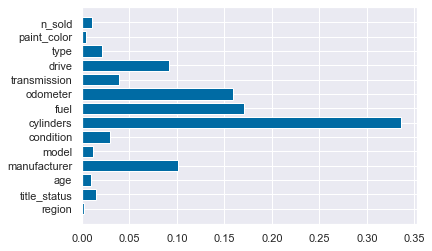

In [346]:
plt.barh(features, xgb_model.feature_importances_)

The most important characteristics, the ones that most influence the divisions during the model building process are: Odometer, cylinders, fuel, transmission and manufacturer.
Importance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more an attribute is used to make key decisions with decision trees, the higher its relative importance.
This importance is calculated explicitly for each attribute in the dataset, allowing attributes to be ranked and compared to each other.


### Metrics

In [253]:
# Predicting the Test set results
y_pred_XGB_OPT = xgb_opt.predict(X_test)

In [254]:
print('r2_score:', r2_score(y_test, y_pred_XGB_OPT))

r2_score: 0.9386479911324543


In [246]:
Comparison_xgb_opt = pd.DataFrame(np.c_[y_test,y_pred_XGB_OPT],columns = ['actual Price','predicted Price'])
Comparison_xgb_opt

actual Price  predicted Price
0          10905.0     10532.492188
1           5500.0     10931.658203
2           1000.0      2021.964478
3          14990.0     12969.118164
4           5500.0      4646.420898
...            ...              ...
5505       11995.0      9718.861328
5506        6850.0      8509.778320
5507       33495.0     29582.744141
5508       47995.0     45982.347656
5509       10999.0      9139.344727

[5510 rows x 2 columns]

In [255]:
print("Error metrices with using XGBoost_opt")
print('Mean Absolute Error(MAE) with XGBoost_opt:', metrics.mean_absolute_error(y_test, y_pred_XGB_OPT))  
print('Mean Squared Error (MSE) with XGBoost_opt:', metrics.mean_squared_error(y_test, y_pred_XGB_OPT))  
print('Root Mean Squared Error  with XGBoost_opt:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_XGB_OPT)))

Error metrices with using XGBoost_opt
Mean Absolute Error(MAE) with XGBoost_opt: 1793.5209234244594
Mean Squared Error (MSE) with XGBoost_opt: 8745479.637631536
Root Mean Squared Error  with XGBoost_opt: 2957.2757121431096


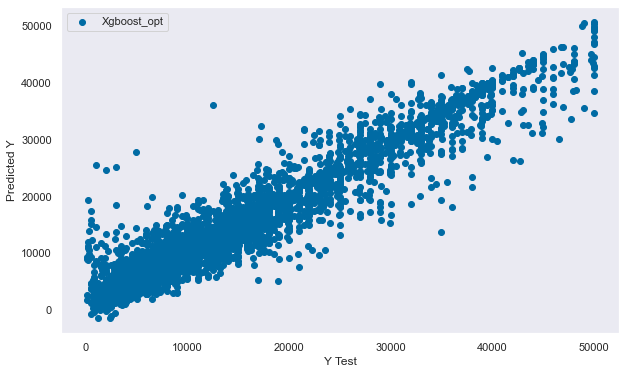

In [229]:
#figure all values
plt.figure(figsize = (10,6))
plt.scatter(y_test, y_pred_XGB_OPT, label='Xgboost_opt')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.legend(loc='upper left');
plt.grid()

### Prediction

In [315]:
# Saving model
joblib.dump(xgb_opt,'xgb_opt.pkl')

['xgb_opt.pkl']

<AxesSubplot:>

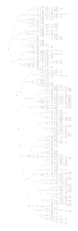

In [309]:
plot_tree(xgb_opt, num_trees=0, rankdir='LR')


In [260]:
X_train.head()

region  title_status  condition   age  manufacturer  model  cylinders  \
4242      254             0          2  13.0             6     90          5   
3822      204             0          2   5.0             8     37          5   
7113       74             0          2  13.0            10     12          5   
46937     269             0          2  12.0            10     28          3   
56569       4             0          2  14.0             8     39          6   

       fuel  odometer  transmission  drive  cartype  paint_color  n_sold  
4242      2   81950.0             0      2        5            9   262.0  
3822      2   70760.0             2      0        0            1   261.0  
7113      2  139000.0             0      1        9            0   831.0  
46937     2  158000.0             0      0        0            5   414.0  
56569     0  141000.0             0      0       10            9   241.0

In [1349]:

X_train.columns

Index(['region', 'title_status', 'condition', 'age', 'manufacturer', 'model',
       'cylinders', 'fuel', 'odometer', 'transmission', 'drive', 'cartype',
       'paint_color', 'n_sold'],
      dtype='object')

In [261]:
def get_price(region, title_status, condition, age, manufacturer, model,
       cylinders, fuel, odometer, transmission, drive, cartype,
       paint_color, n_sold):
    
    region_dict = {'SF bay area': 0,
                     'abilene': 1,
                     'akron / canton': 2,
                     'albany': 3,
                     'albuquerque': 4,
                     'altoona-johnstown': 5,
                     'amarillo': 6,
                     'ames': 7,
                     'anchorage / mat-su': 8,
                     'ann arbor': 9,
                     'annapolis': 10,
                     'appleton-oshkosh-FDL': 11,
                     'asheville': 12,
                     'ashtabula': 13,
                     'athens': 14,
                     'atlanta': 15,
                     'auburn': 16,
                     'augusta': 17,
                     'austin': 18,
                     'bakersfield': 19,
                     'baltimore': 20,
                     'baton rouge': 21,
                     'battle creek': 22,
                     'beaumont / port arthur': 23,
                     'bellingham': 24,
                     'bemidji': 25,
                     'bend': 26,
                     'billings': 27,
                     'binghamton': 28,
                     'birmingham': 29,
                     'bismarck': 30,
                     'bloomington': 31,
                     'bloomington-normal': 32,
                     'boise': 33,
                     'boone': 34,
                     'boston': 35,
                     'boulder': 36,
                     'bowling green': 37,
                     'bozeman': 38,
                     'brainerd': 39,
                     'brownsville': 40,
                     'brunswick': 41,
                     'buffalo': 42,
                     'butte': 43,
                     'cape cod / islands': 44,
                     'catskills': 45,
                     'cedar rapids': 46,
                     'central NJ': 47,
                     'central louisiana': 48,
                     'central michigan': 49,
                     'champaign urbana': 50,
                     'charleston': 51,
                     'charlotte': 52,
                     'charlottesville': 53,
                     'chattanooga': 54,
                     'chautauqua': 55,
                     'chicago': 56,
                     'chico': 57,
                     'chillicothe': 58,
                     'cincinnati': 59,
                     'clarksville': 60,
                     'cleveland': 61,
                     'clovis / portales': 62,
                     'college station': 63,
                     'colorado springs': 64,
                     'columbia': 65,
                     'columbia / jeff city': 66,
                     'columbus': 67,
                     'cookeville': 68,
                     'corpus christi': 69,
                     'corvallis/albany': 70,
                     'cumberland valley': 71,
                     'dallas / fort worth': 72,
                     'danville': 73,
                     'dayton / springfield': 74,
                     'daytona beach': 75,
                     'decatur': 76,
                     'deep east texas': 77,
                     'del rio / eagle pass': 78,
                     'delaware': 79,
                     'denver': 80,
                     'des moines': 81,
                     'detroit metro': 82,
                     'dothan': 83,
                     'dubuque': 84,
                     'duluth / superior': 85,
                     'east idaho': 86,
                     'east oregon': 87,
                     'eastern CO': 88,
                     'eastern CT': 89,
                     'eastern NC': 90,
                     'eastern kentucky': 91,
                     'eastern montana': 92,
                     'eastern panhandle': 93,
                     'eastern shore': 94,
                     'eau claire': 95,
                     'el paso': 96,
                     'elko': 97,
                     'elmira-corning': 98,
                     'erie': 99,
                     'eugene': 100,
                     'evansville': 101,
                     'fairbanks': 102,
                     'fargo / moorhead': 103,
                     'farmington': 104,
                     'fayetteville': 105,
                     'finger lakes': 106,
                     'flagstaff / sedona': 107,
                     'flint': 108,
                     'florence': 109,
                     'florence / muscle shoals': 110,
                     'florida keys': 111,
                     'fort collins / north CO': 112,
                     'fort dodge': 113,
                     'fort smith': 114,
                     'fort wayne': 115,
                     'frederick': 116,
                     'fredericksburg': 117,
                     'fresno / madera': 118,
                     'ft myers / SW florida': 119,
                     'gadsden-anniston': 120,
                     'gainesville': 121,
                     'galveston': 122,
                     'glens falls': 123,
                     'gold country': 124,
                     'grand forks': 125,
                     'grand island': 126,
                     'grand rapids': 127,
                     'great falls': 128,
                     'green bay': 129,
                     'greensboro': 130,
                     'greenville / upstate': 131,
                     'gulfport / biloxi': 132,
                     'hanford-corcoran': 133,
                     'harrisburg': 134,
                     'harrisonburg': 135,
                     'hartford': 136,
                     'hattiesburg': 137,
                     'hawaii': 138,
                     'heartland florida': 139,
                     'helena': 140,
                     'hickory / lenoir': 141,
                     'high rockies': 142,
                     'hilton head': 143,
                     'holland': 144,
                     'houma': 145,
                     'houston': 146,
                     'hudson valley': 147,
                     'humboldt county': 148,
                     'huntington-ashland': 149,
                     'huntsville / decatur': 150,
                     'imperial county': 151,
                     'indianapolis': 152,
                     'inland empire': 153,
                     'iowa city': 154,
                     'ithaca': 155,
                     'jackson': 156,
                     'jacksonville': 157,
                     'janesville': 158,
                     'jersey shore': 159,
                     'jonesboro': 160,
                     'joplin': 161,
                     'kalamazoo': 162,
                     'kalispell': 163,
                     'kansas city, MO': 164,
                     'kenai peninsula': 165,
                     'kennewick-pasco-richland': 166,
                     'kenosha-racine': 167,
                     'killeen / temple / ft hood': 168,
                     'kirksville': 169,
                     'klamath falls': 170,
                     'knoxville': 171,
                     'kokomo': 172,
                     'la crosse': 173,
                     'la salle co': 174,
                     'lafayette': 175,
                     'lafayette / west lafayette': 176,
                     'lake charles': 177,
                     'lake of the ozarks': 178,
                     'lakeland': 179,
                     'lancaster': 180,
                     'lansing': 181,
                     'laredo': 182,
                     'las cruces': 183,
                     'las vegas': 184,
                     'lawrence': 185,
                     'lawton': 186,
                     'lehigh valley': 187,
                     'lewiston / clarkston': 188,
                     'lexington': 189,
                     'lima / findlay': 190,
                     'lincoln': 191,
                     'little rock': 192,
                     'logan': 193,
                     'long island': 194,
                     'los angeles': 195,
                     'louisville': 196,
                     'lubbock': 197,
                     'lynchburg': 198,
                     'macon / warner robins': 199,
                     'madison': 200,
                     'maine': 201,
                     'manhattan': 202,
                     'mankato': 203,
                     'mansfield': 204,
                     'mason city': 205,
                     'mattoon-charleston': 206,
                     'mcallen / edinburg': 207,
                     'meadville': 208,
                     'medford-ashland': 209,
                     'memphis': 210,
                     'mendocino county': 211,
                     'merced': 212,
                     'meridian': 213,
                     'milwaukee': 214,
                     'minneapolis / st paul': 215,
                     'missoula': 216,
                     'mobile': 217,
                     'modesto': 218,
                     'mohave county': 219,
                     'monroe': 220,
                     'monterey bay': 221,
                     'montgomery': 222,
                     'morgantown': 223,
                     'moses lake': 224,
                     'muncie / anderson': 225,
                     'muskegon': 226,
                     'myrtle beach': 227,
                     'nashville': 228,
                     'new hampshire': 229,
                     'new haven': 230,
                     'new orleans': 231,
                     'new river valley': 232,
                     'new york city': 233,
                     'norfolk / hampton roads': 234,
                     'north central FL': 235,
                     'north dakota': 236,
                     'north jersey': 237,
                     'north mississippi': 238,
                     'north platte': 239,
                     'northeast SD': 240,
                     'northern WI': 241,
                     'northern michigan': 242,
                     'northern panhandle': 243,
                     'northwest CT': 244,
                     'northwest GA': 245,
                     'northwest KS': 246,
                     'northwest OK': 247,
                     'ocala': 248,
                     'odessa / midland': 249,
                     'ogden-clearfield': 250,
                     'okaloosa / walton': 251,
                     'oklahoma city': 252,
                     'olympic peninsula': 253,
                     'omaha / council bluffs': 254,
                     'oneonta': 255,
                     'orange county': 256,
                     'oregon coast': 257,
                     'orlando': 258,
                     'outer banks': 259,
                     'owensboro': 260,
                     'palm springs': 261,
                     'panama city': 262,
                     'parkersburg-marietta': 263,
                     'pensacola': 264,
                     'peoria': 265,
                     'philadelphia': 266,
                     'phoenix': 267,
                     'pierre / central SD': 268,
                     'pittsburgh': 269,
                     'plattsburgh-adirondacks': 270,
                     'poconos': 271,
                     'port huron': 272,
                     'portland': 273,
                     'potsdam-canton-massena': 274,
                     'prescott': 275,
                     'provo / orem': 276,
                     'pueblo': 277,
                     'pullman / moscow': 278,
                     'quad cities, IA/IL': 279,
                     'raleigh / durham / CH': 280,
                     'rapid city / west SD': 281,
                     'reading': 282,
                     'redding': 283,
                     'reno / tahoe': 284,
                     'rhode island': 285,
                     'richmond': 286,
                     'roanoke': 287,
                     'rochester': 288,
                     'rockford': 289,
                     'roseburg': 290,
                     'roswell / carlsbad': 291,
                     'sacramento': 292,
                     'saginaw-midland-baycity': 293,
                     'salem': 294,
                     'salina': 295,
                     'salt lake city': 296,
                     'san angelo': 297,
                     'san antonio': 298,
                     'san diego': 299,
                     'san luis obispo': 300,
                     'san marcos': 301,
                     'sandusky': 302,
                     'santa barbara': 303,
                     'santa fe / taos': 304,
                     'santa maria': 305,
                     'sarasota-bradenton': 306,
                     'savannah / hinesville': 307,
                     'scottsbluff / panhandle': 308,
                     'scranton / wilkes-barre': 309,
                     'seattle-tacoma': 310,
                     'sheboygan': 311,
                     'show low': 312,
                     'shreveport': 313,
                     'sierra vista': 314,
                     'sioux city': 315,
                     'sioux falls / SE SD': 316,
                     'siskiyou county': 317,
                     'skagit / island / SJI': 318,
                     'south bend / michiana': 319,
                     'south coast': 320,
                     'south dakota': 321,
                     'south florida': 322,
                     'south jersey': 323,
                     'southeast IA': 324,
                     'southeast KS': 325,
                     'southeast alaska': 326,
                     'southeast missouri': 327,
                     'southern WV': 328,
                     'southern illinois': 329,
                     'southern maryland': 330,
                     'southwest KS': 331,
                     'southwest MN': 332,
                     'southwest VA': 333,
                     'southwest michigan': 334,
                     'space coast': 335,
                     "spokane / coeur d'alene": 336,
                     'springfield': 337,
                     'st augustine': 338,
                     'st cloud': 339,
                     'st george': 340,
                     'st joseph': 341,
                     'st louis': 342,
                     'st louis, MO': 343,
                     'state college': 344,
                     'statesboro': 345,
                     'stillwater': 346,
                     'stockton': 347,
                     'susanville': 348,
                     'syracuse': 349,
                     'tallahassee': 350,
                     'tampa bay area': 351,
                     'terre haute': 352,
                     'texarkana': 353,
                     'texoma': 354,
                     'the thumb': 355,
                     'toledo': 356,
                     'topeka': 357,
                     'treasure coast': 358,
                     'tri-cities': 359,
                     'tucson': 360,
                     'tulsa': 361,
                     'tuscaloosa': 362,
                     'tuscarawas co': 363,
                     'twin falls': 364,
                     'twin tiers NY/PA': 365,
                     'tyler / east TX': 366,
                     'upper peninsula': 367,
                     'utica-rome-oneida': 368,
                     'valdosta': 369,
                     'ventura county': 370,
                     'vermont': 371,
                     'victoria': 372,
                     'visalia-tulare': 373,
                     'waco': 374,
                     'washington, DC': 375,
                     'waterloo / cedar falls': 376,
                     'watertown': 377,
                     'wausau': 378,
                     'wenatchee': 379,
                     'west virginia (old)': 380,
                     'western IL': 381,
                     'western KY': 382,
                     'western maryland': 383,
                     'western massachusetts': 384,
                     'western slope': 385,
                     'wichita': 386,
                     'wichita falls': 387,
                     'williamsport': 388,
                     'wilmington': 389,
                     'winchester': 390,
                     'winston-salem': 391,
                     'worcester / central MA': 392,
                     'wyoming': 393,
                     'yakima': 394,
                     'york': 395,
                     'youngstown': 396,
                     'yuba-sutter': 397,
                     'yuma': 398,
                     'zanesville / cambridge': 399}
    title_status_dict = {'clean': 0,
                     'lien': 1,
                     'missing': 2,
                     'parts only': 3,
                     'rebuilt': 4,
                     'salvage': 5}
    model_dict = {'1500': 0,
                 '1500 crew cab big horn': 1,
                 '1500 quad cab harvest pickup': 2,
                 '200': 3,
                 '2500': 4,
                 '3': 5,
                 '300': 6,
                 '328i': 7,
                 '3500': 8,
                 '370z nismo coupe 2d': 9,
                 '4runner': 10,
                 'a4': 11,
                 'acadia': 12,
                 'accord': 13,
                 'altima': 14,
                 'camaro': 15,
                 'camaro ss coupe 2d': 16,
                 'camry': 17,
                 'camry le': 18,
                 'challenger r/t coupe 2d': 19,
                 'charger': 20,
                 'cherokee': 21,
                 'civic': 22,
                 'civic lx': 23,
                 'colorado': 24,
                 'colorado extended cab': 25,
                 'corolla': 26,
                 'corvette': 27,
                 'corvette grand sport': 28,
                 'cr-v': 29,
                 'cruze': 30,
                 'durango': 31,
                 'edge': 32,
                 'elantra': 33,
                 'enclave': 34,
                 'equinox': 35,
                 'escalade': 36,
                 'escape': 37,
                 'expedition': 38,
                 'expedition xlt sport': 39,
                 'explorer': 40,
                 'f-250': 41,
                 'f150': 42,
                 'f250 super duty': 43,
                 'fit': 44,
                 'focus': 45,
                 'focus se': 46,
                 'forester': 47,
                 'frontier': 48,
                 'frontier crew cab pro-4x': 49,
                 'fusion': 50,
                 'fusion se': 51,
                 'grand caravan': 52,
                 'grand cherokee': 53,
                 'highlander': 54,
                 'impala': 55,
                 'impreza': 56,
                 'jetta': 57,
                 'legacy': 58,
                 'liberty': 59,
                 'malibu': 60,
                 'maxima': 61,
                 'mdx': 62,
                 'mustang': 63,
                 'mustang gt coupe 2d': 64,
                 'odyssey': 65,
                 'optima': 66,
                 'outback': 67,
                 'passat': 68,
                 'pathfinder': 69,
                 'patriot': 70,
                 'pilot': 71,
                 'prius': 72,
                 'ranger': 73,
                 'rav4': 74,
                 'rogue': 75,
                 'rx 350': 76,
                 'santa fe': 77,
                 'sentra': 78,
                 'sienna': 79,
                 'sierra': 80,
                 'sierra 1500': 81,
                 'sierra 2500 hd double cab': 82,
                 'sierra 2500hd': 83,
                 'silverado': 84,
                 'silverado 1500 double': 85,
                 'silverado 1500 ld': 86,
                 'silverado 2500hd': 87,
                 'sonata': 88,
                 'soul': 89,
                 'suburban': 90,
                 'super duty f-250 srw': 91,
                 'super duty f-550 drw': 92,
                 'tacoma': 93,
                 'tacoma double cab pickup': 94,
                 'tahoe': 95,
                 'taurus': 96,
                 'town & country': 97,
                 'transit': 98,
                 'traverse': 99,
                 'tundra': 100,
                 'versa': 101,
                 'wrangler': 102,
                 'wrangler unlimited': 103,
                 'wrangler unlimited rubicon': 104,
                 'wrangler unlimited sport': 105,
                 'x5': 106,
                 'yukon': 107}
    manufacturer_dic = {'acura': 0,
                     'audi': 1,
                     'bmw': 2,
                     'buick': 3,
                     'cadillac': 4,
                     'chevrolet': 5,
                     'chrysler': 6,
                     'dodge': 7,
                     'ford': 8,
                     'gmc': 9,
                     'honda': 10,
                     'hyundai': 11,
                     'jeep': 12,
                     'kia': 13,
                     'lexus': 14,
                     'mazda': 15,
                     'nissan': 16,
                     'ram': 17,
                     'subaru': 18,
                     'toyota': 19,
                     'volkswagen': 20}
    
    condition_dict = {'excellent': 0, 'fair': 1, 'good': 2, 'like new': 3, 'new': 4, 'salvage': 5}
    cylinders_dict = {'10 cylinders': 0,
                     '12 cylinders': 1,
                     '3 cylinders': 2,
                     '4 cylinders': 3,
                     '5 cylinders': 4,
                     '6 cylinders': 5,
                     '8 cylinders': 6,
                     'other': 7}
    fuel_dict = {'diesel': 0, 'electric': 1, 'gas': 2, 'hybrid': 3, 'other': 4}
    transmission_dict = {'automatic': 0, 'manual': 1, 'other': 2}
    drive_dict = {'SUV': 0,
                 'bus': 1,
                 'convertible': 2,
                 'coupe': 3,
                 'hatchback': 4,
                 'mini-van': 5,
                 'offroad': 6,
                 'other': 7,
                 'pickup': 8,
                 'sedan': 9,
                 'truck': 10,
                 'van': 11,
                 'wagon': 12}
    cartype_dict = {'SUV': 0,
                     'bus': 1,
                     'convertible': 2,
                     'coupe': 3,
                     'hatchback': 4,
                     'mini-van': 5,
                     'offroad': 6,
                     'other': 7,
                     'pickup': 8,
                     'sedan': 9,
                     'truck': 10,
                     'van': 11,
                     'wagon': 12}
    paint_color_dict = {'black': 0,
                     'blue': 1,
                     'brown': 2,
                     'custom': 3,
                     'green': 4,
                     'grey': 5,
                     'orange': 6,
                     'purple': 7,
                     'red': 8,
                     'silver': 9,
                     'white': 10,
                     'yellow': 11}
    features = ['region', 'title_status', 'condition', 'age', 'manufacturer', 'model',
       'cylinders', 'fuel', 'odometer', 'transmission', 'drive', 'cartype',
       'paint_color', 'n_sold']
    

    test_array = [region_dict[region],
                  title_status_dict[title_status],
                  condition_dict[condition],
                  age,
                  manufacturer_dic[manufacturer],
                  model_dict[model],
                  cylinders_dict[cylinders],
                  fuel_dict[fuel],
                  odometer,
                  transmission_dict[transmission],
                  drive_dict[drive],
                  cartype_dict[cartype],
                  paint_color_dict[paint_color],
                  n_sold]                                         


   
    test_array = np.array(test_array) # convert into numpy array
    
    test_array = test_array.reshape(1,-1) #reshape
    test_df = pd.DataFrame(test_array, columns = features)
 
    
    #declare path where you saved your model
    model_path = 'xgb_opt.pkl'
    #open file
    file = open(model_path, "rb")
    #load the trained model
    trained_model = joblib.load(file)


    prediction = int(trained_model.predict(test_df))
    return prediction

In [306]:
price = get_price('amarillo',
                  'clean',
                  'excellent',
                  5,
                  'ford',
                  'focus',
                  '4 cylinders',
                  'gas',
                  100000,
                  'manual',
                  'sedan',
                  'coupe',
                  'silver',
                  10)
print(price)

15105


## Neural Network

In [265]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22036, 14)
(22036, 1)
(5510, 14)
(5510, 1)


In [266]:
print('X_train, y_train shapes:', X_train.shape, y_train.shape)
print('X_test, y_test shapes:', X_train.shape, y_train.shape)
print('Some prices: ', y_train[:5])

X_train, y_train shapes: (22036, 14) (22036, 1)
X_test, y_test shapes: (22036, 14) (22036, 1)
Some prices:           price
4242    6900.0
3822   29590.0
7113    6999.0
46937   7200.0
56569  20000.0


### Neural Network option 1

In [267]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train =scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [268]:

model = tf.keras.models.Sequential()

In [269]:

# We add first layer with activation layer tanh, 14 features imput
model.add(Dense(100, input_shape=(14,),activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# second layer
model.add(Dense(100,activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# third layer
model.add(Dense(100,activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# fourth layer
model.add(Dense(100,activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# output layer
# to predict the price
model.add(Dense(1))


In [270]:
# Compile model

model.compile(
    optimizer = 'adam',
    loss = 'mse'
    
)

In [271]:
callback_1 = keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    mode='min',
    patience = 14,
    verbose = 1
)


history=model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          batch_size=32,
          validation_data=(X_test, y_test),
          callbacks=[callback_1]
          )

Epoch 1/100
689/689 [==============================] - 4s 4ms/step - loss: 384666464.0000 - val_loss: 379106176.0000
Epoch 2/100
689/689 [==============================] - 2s 3ms/step - loss: 373658176.0000 - val_loss: 363003104.0000
Epoch 3/100
689/689 [==============================] - 2s 3ms/step - loss: 354538240.0000 - val_loss: 338633216.0000
Epoch 4/100
689/689 [==============================] - 2s 3ms/step - loss: 329732320.0000 - val_loss: 312864224.0000
Epoch 5/100
689/689 [==============================] - 2s 3ms/step - loss: 300806944.0000 - val_loss: 279685216.0000
Epoch 6/100
689/689 [==============================] - 2s 3ms/step - loss: 269456416.0000 - val_loss: 246041312.0000
Epoch 7/100
689/689 [==============================] - 2s 3ms/step - loss: 237154080.0000 - val_loss: 213771584.0000
Epoch 8/100
689/689 [==============================] - 2s 3ms/step - loss: 205148240.0000 - val_loss: 180626016.0000
Epoch 9/100
689/689 [==============================] - 2s 3ms/st

689/689 [==============================] - 2s 3ms/step - loss: 28540978.0000 - val_loss: 14351774.0000
Epoch 72/100
689/689 [==============================] - 2s 3ms/step - loss: 28085620.0000 - val_loss: 14278552.0000
Epoch 73/100
689/689 [==============================] - 2s 3ms/step - loss: 28424034.0000 - val_loss: 14030884.0000
Epoch 74/100
689/689 [==============================] - 2s 3ms/step - loss: 28955212.0000 - val_loss: 14168262.0000
Epoch 75/100
689/689 [==============================] - 2s 3ms/step - loss: 27468284.0000 - val_loss: 13999698.0000
Epoch 76/100
689/689 [==============================] - 2s 3ms/step - loss: 27899272.0000 - val_loss: 14046152.0000
Epoch 77/100
689/689 [==============================] - 2s 3ms/step - loss: 28016976.0000 - val_loss: 14100111.0000
Epoch 78/100
689/689 [==============================] - 2s 3ms/step - loss: 27752498.0000 - val_loss: 14029323.0000
Epoch 79/100
689/689 [==============================] - 2s 3ms/step - loss: 27547444.

In [272]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1500      
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               1

<AxesSubplot:>

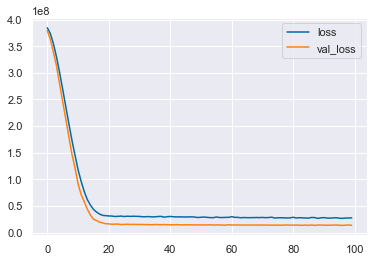

In [273]:
losses = pd.DataFrame(model.history.history)
losses.plot()

Above we plotted training and test losses and training loss has elbow shape, the higher epoch getting lower loss values. Test losses are more volatile and lower than trainig! 

In [274]:
y_pred_nn = model.predict(X_test)

In [276]:
print("Error metrices with using NN")
print('Mean Absolute Error(MAE) with NN:', metrics.mean_absolute_error(y_test, y_pred_nn))  
print('Mean Squared Error (MSE) with NN:', metrics.mean_squared_error(y_test, y_pred_nn))  
print('Root Mean Squared Error  with NN:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_nn)))

Error metrices with using NN
Mean Absolute Error(MAE) with NN: 2543.830970235226
Mean Squared Error (MSE) with NN: 13853779.56487909
Root Mean Squared Error  with NN: 3722.0665717957127


In [277]:
from sklearn.metrics import r2_score

print("R2 using NN                    :", r2_score(y_test, y_pred_nn))


R2 using NN                    : 0.9028118248590797


In [278]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

loss     val_loss  epoch
0  384666464.0  379106176.0      0
1  373658176.0  363003104.0      1
2  354538240.0  338633216.0      2
3  329732320.0  312864224.0      3
4  300806944.0  279685216.0      4

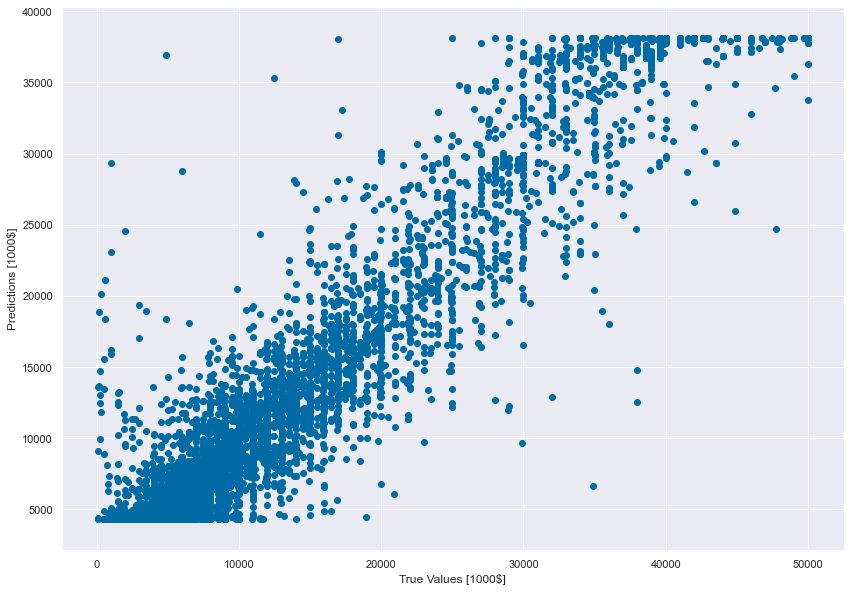

In [279]:
test_predictions = model.predict(X_test).flatten()
plt.figure(figsize = (14,10))
plt.scatter(y_test, test_predictions, label='Neural Network_opt_1')
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

### Neural Network option 2

In [280]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22036, 14)
(22036, 1)
(5510, 14)
(5510, 1)


In [281]:
print('X_train, y_train shapes:', X_train.shape, y_train.shape)
print('X_test, y_test shapes:', X_train.shape, y_train.shape)
print('Some prices: ', y_train[:5])

X_train, y_train shapes: (22036, 14) (22036, 1)
X_test, y_test shapes: (22036, 14) (22036, 1)
Some prices:           price
4242    6900.0
3822   29590.0
7113    6999.0
46937   7200.0
56569  20000.0


In [282]:
model2 = tf.keras.models.Sequential()

In [283]:
# We add first layer with activation layer relu, 14 features imput
model2.add(Dense(100, input_shape=(14,),activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))

# second layer
model2.add(Dense(100,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))

# third layer
model2.add(Dense(100,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))

# fourth layer
model2.add(Dense(100,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))

# output layer
# to predict the price
model2.add(Dense(1))


In [284]:
# Compile model

model2.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics=['mae']
)

In [285]:
callback_1 = keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    mode='min',
    patience = 20,
    verbose = 1
)


history=model2.fit(x=X_train, 
          y=y_train, 
          epochs=500,
          batch_size=16,
          validation_data=(X_test, y_test),
          callbacks=[callback_1]
          )

Epoch 1/500
1378/1378 [==============================] - 5s 3ms/step - loss: 378927904.0000 - mae: 15413.6953 - val_loss: 362826176.0000 - val_mae: 15240.8828
Epoch 2/500
1378/1378 [==============================] - 4s 3ms/step - loss: 341004192.0000 - mae: 14715.7100 - val_loss: 309357856.0000 - val_mae: 14218.2646
Epoch 3/500
1378/1378 [==============================] - 4s 3ms/step - loss: 283468832.0000 - mae: 13512.6436 - val_loss: 245898256.0000 - val_mae: 12844.2979
Epoch 4/500
1378/1378 [==============================] - 4s 3ms/step - loss: 219483008.0000 - mae: 11966.7979 - val_loss: 177068560.0000 - val_mae: 11066.9014
Epoch 5/500
1378/1378 [==============================] - 4s 3ms/step - loss: 157892336.0000 - mae: 10173.2207 - val_loss: 117563320.0000 - val_mae: 9113.3262
Epoch 6/500
1378/1378 [==============================] - 4s 3ms/step - loss: 105849328.0000 - mae: 8308.1172 - val_loss: 69972928.0000 - val_mae: 7133.3149
Epoch 7/500
1378/1378 [===========================

1378/1378 [==============================] - 4s 3ms/step - loss: 23543518.0000 - mae: 3610.1467 - val_loss: 11830252.0000 - val_mae: 2359.0925
Epoch 54/500
1378/1378 [==============================] - 4s 3ms/step - loss: 24950082.0000 - mae: 3729.2812 - val_loss: 12062490.0000 - val_mae: 2438.4443
Epoch 55/500
1378/1378 [==============================] - 4s 3ms/step - loss: 25426424.0000 - mae: 3778.5688 - val_loss: 12292004.0000 - val_mae: 2420.9980
Epoch 56/500
1378/1378 [==============================] - 4s 3ms/step - loss: 24078024.0000 - mae: 3660.4937 - val_loss: 11750438.0000 - val_mae: 2391.8477
Epoch 57/500
1378/1378 [==============================] - 4s 3ms/step - loss: 24688322.0000 - mae: 3729.8191 - val_loss: 12307137.0000 - val_mae: 2444.8142
Epoch 58/500
1378/1378 [==============================] - 4s 3ms/step - loss: 24483710.0000 - mae: 3685.8860 - val_loss: 11923481.0000 - val_mae: 2369.4155
Epoch 59/500
1378/1378 [==============================] - 4s 3ms/step - loss:

<AxesSubplot:>

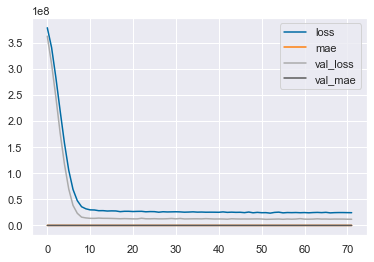

In [286]:
losses2 = pd.DataFrame(model2.history.history)
losses2.plot()

Training loss has elbow shape, and lossess getting lower with epoch. Validation losses getting higher and worse, altough start with lower losses

In [287]:
y_pred_nn2 = model2.predict(X_test)

In [295]:
print("Error metrices with using NN")
print('Mean Absolute Error(MAE) with NN:', metrics.mean_absolute_error(y_test, y_pred_nn2))  
print('Mean Squared Error (MSE) with NN:', metrics.mean_squared_error(y_test, y_pred_nn2))  
print('Root Mean Squared Error  with NN:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_nn2)))

Error metrices with using NN
Mean Absolute Error(MAE) with NN: 2375.6340476920514
Mean Squared Error (MSE) with NN: 11843766.285243284
Root Mean Squared Error  with NN: 3441.4773405099277


In [289]:
from sklearn.metrics import r2_score

print("R2 using NN2                   :", r2_score(y_test, y_pred_nn2))

R2 using NN2                   : 0.9169126355253656


In [290]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [291]:
hist.head()

loss           mae     val_loss       val_mae  epoch
0  378927904.0  15413.695312  362826176.0  15240.882812      0
1  341004192.0  14715.709961  309357856.0  14218.264648      1
2  283468832.0  13512.643555  245898256.0  12844.297852      2
3  219483008.0  11966.797852  177068560.0  11066.901367      3
4  157892336.0  10173.220703  117563320.0   9113.326172      4

In [292]:
import matplotlib.pyplot as plt

def show_loss_mae_evolution(history):
    
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('MSE')
    ax1.plot(hist['epoch'], hist['loss'], label='Train Error')
    ax1.plot(hist['epoch'], hist['val_loss'], label = 'Val Error')
    ax1.grid()
    ax1.legend()

    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('mae')
    ax2.plot(hist['epoch'], hist['mae'], label='Train mae')
    ax2.plot(hist['epoch'], hist['val_mae'], label = 'Val Mae')
    ax2.grid()
    ax2.legend()

    plt.show()
    
def show_samples(x_test, y_test, model):
    predictions = model.predict(x_test)
    predicted_classes = np.argmax(predictions, -1)
    
    L = 5
    W = 5
    fig, axes = plt.subplots(L, W, figsize=(14, 14))
    axes = axes.ravel()

    for i in np.arange(0, L * W):
        ind = np.random.randint(len(y_test))
        axes[i].imshow(x_test[ind].reshape(28, 28))
        prob_pred = np.max(predictions[ind, :])
        class_pred = int(predicted_classes[ind])
        original_class = int(y_test[ind])
        if class_pred == original_class:
            color = 'green'
        else:
            color = 'red'
        title = "Pred: {0} \n Target: {1} \n Prob: {2:.3f}".format(
        class_pred, original_class, prob_pred)
        axes[i].set_title(title, color=color)
        axes[i].axis('off')

    plt.subplots_adjust(wspace=0.5)

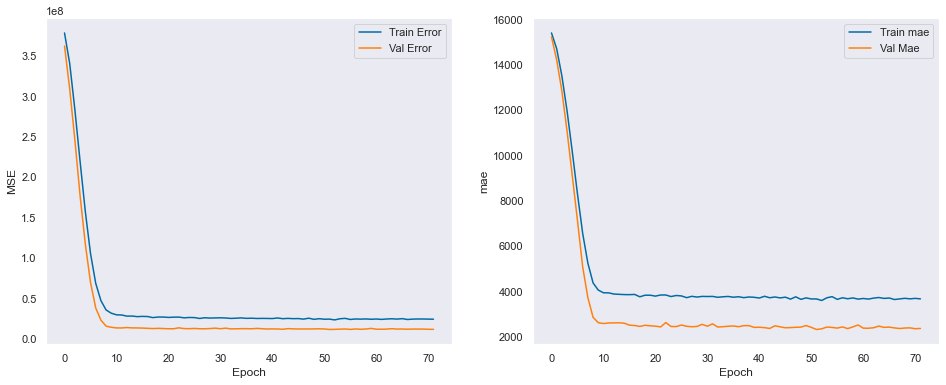

In [293]:
show_loss_mae_evolution(history)

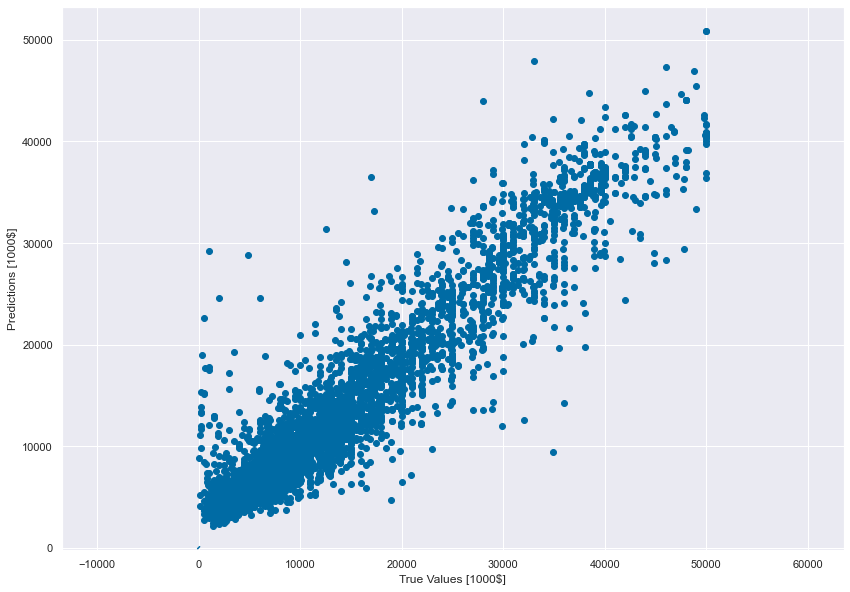

In [294]:
test_predictions = model2.predict(X_test).flatten()
plt.figure(figsize = (14,10))
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

## Comparison

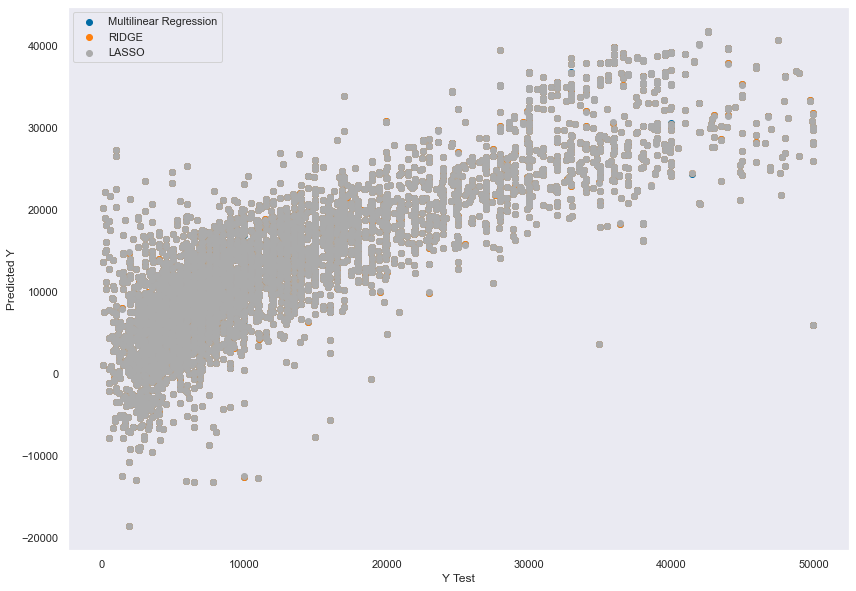

In [296]:
#figure all values
plt.figure(figsize = (14,10))
plt.scatter(y_test, y_pred, label='Multilinear Regression')
plt.scatter(y_test, y_pred_ridge, label='RIDGE')
plt.scatter(y_test, y_pred_lasso, label='LASSO')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.legend(loc='upper left');
plt.grid()

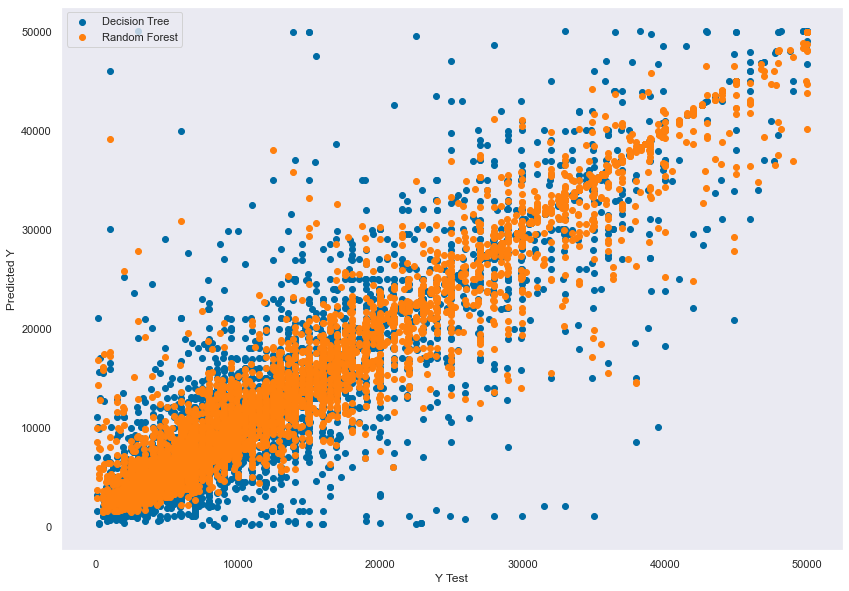

In [297]:
#figure all values
plt.figure(figsize = (14,10))

plt.scatter(y_test, y_pred_dtr, label='Decision Tree')
plt.scatter(y_test, y_pred_rf, label='Random Forest')

plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.legend(loc='upper left');
plt.grid()

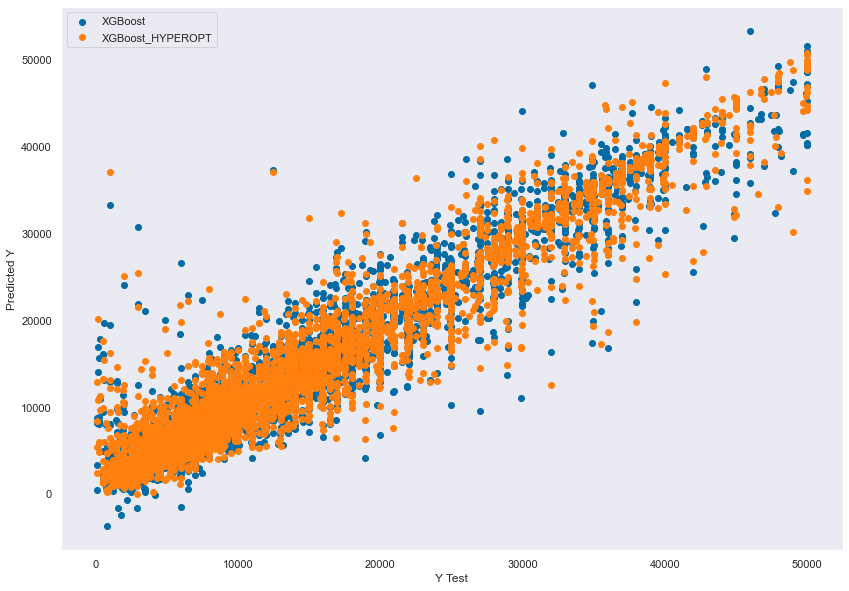

In [298]:
#figure all values
plt.figure(figsize = (14,10))

plt.scatter(y_test, y_pred_xgb, label='XGBoost')
plt.scatter(y_test, y_pred_XGB_OPT, label='XGBoost_HYPEROPT')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.legend(loc='upper left');
plt.grid()

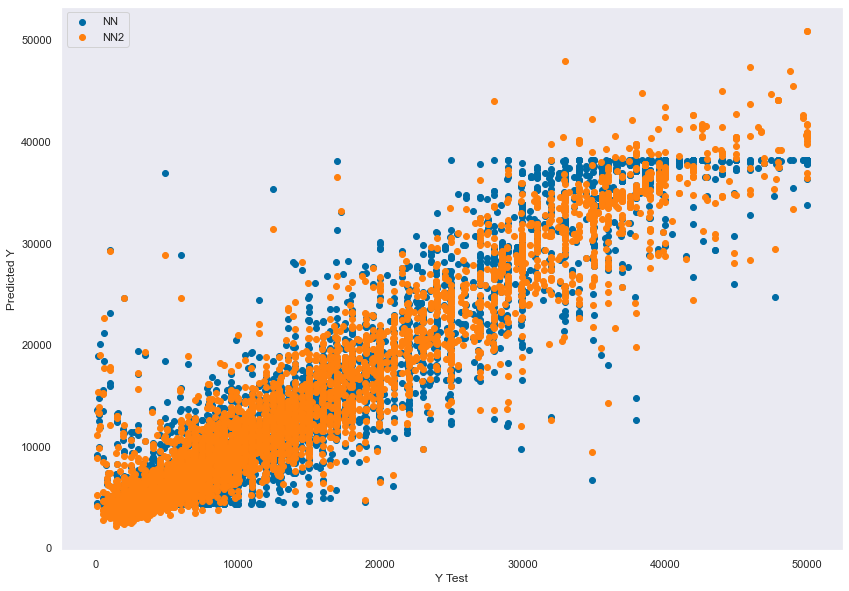

In [299]:
#figure all values
plt.figure(figsize = (14,10))
plt.scatter(y_test, y_pred_nn, label='NN')
plt.scatter(y_test, y_pred_nn2, label='NN2')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.legend(loc='upper left');
plt.grid()

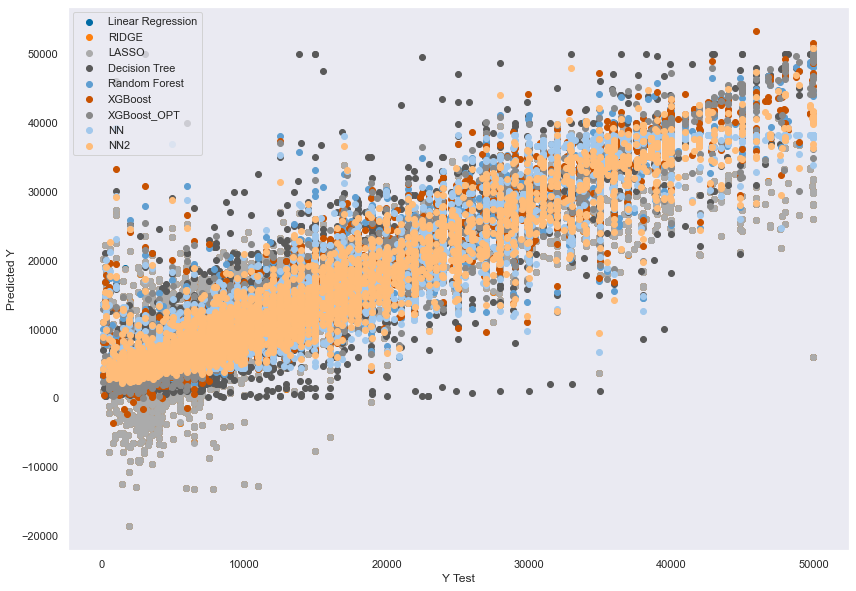

In [300]:
#figure all values
plt.figure(figsize = (14,10))
plt.scatter(y_test, y_pred, label='Linear Regression')
plt.scatter(y_test, y_pred_ridge, label='RIDGE')
plt.scatter(y_test, y_pred_lasso, label='LASSO')
plt.scatter(y_test, y_pred_dtr, label='Decision Tree')
plt.scatter(y_test, y_pred_rf, label='Random Forest')
plt.scatter(y_test, y_pred_xgb, label='XGBoost')
plt.scatter(y_test, y_pred_XGB_OPT, label='XGBoost_OPT')
plt.scatter(y_test, y_pred_nn, label='NN')
plt.scatter(y_test, y_pred_nn2, label='NN2')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.legend(loc='upper left');
plt.grid()

In [304]:
print("MSE using MultiLinear Regression:", metrics.mean_squared_error(y_test, y_pred))
print("MSE using RIDGE                 :", metrics.mean_squared_error(y_test, y_pred_ridge))
print("MSE using LASSO                 :", metrics.mean_squared_error(y_test, y_pred_lasso))

print("MSE using Decision Tree         :", metrics.mean_squared_error(y_test, y_pred_dtr))
print("MSE using Random Forest         :", metrics.mean_squared_error(y_test, y_pred_rf))

print("MSE using XGBoost               :", metrics.mean_squared_error(y_test, y_pred_xgb))
print("MSE using XGBoost_OPT           :", metrics.mean_squared_error(y_test, y_pred_XGB_OPT))

print("MSE using NN                    :", metrics.mean_squared_error(y_test, y_pred_nn))
print("MSE using NN2                   :", metrics.mean_squared_error(y_test, y_pred_nn2))

MSE using MultiLinear Regression: 33113265.83587272
MSE using RIDGE                 : 33113262.381451316
MSE using LASSO                 : 33113300.08664563
MSE using Decision Tree         : 20162415.123366605
MSE using Random Forest         : 9176092.550454892
MSE using XGBoost               : 8567236.241716148
MSE using XGBoost_OPT      : 8745479.637631536
MSE using NN                    : 13853779.56487909
MSE using NN2                   : 11843766.285243284


In [347]:
from sklearn.metrics import r2_score
print("R2 using MultiLinear Regression:", r2_score(y_test, y_pred))
print("R2 using RIDGE                 :", r2_score(y_test, y_pred_ridge))
print("R2 using LASSO                 :", r2_score(y_test, y_pred_lasso))

print("R2 using Decision Tree         :", r2_score(y_test, y_pred_dtr))
print("R2 using Random Forest         :", r2_score(y_test, y_pred_rf))

print("R2 using XGBoost               :", r2_score(y_test, y_pred_xgb))
print("R2 using XGBoost_OPT           :", r2_score(y_test, y_pred_XGB_OPT))

print("R2 using NN                    :", r2_score(y_test, y_pred_nn))
print("R2 using NN2                   :", r2_score(y_test, y_pred_nn2))

R2 using MultiLinear Regression: 0.7677010909208345
R2 using RIDGE                 : 0.767701115154576
R2 using LASSO                 : 0.7677008506419921
R2 using Decision Tree         : 0.858554965228307
R2 using Random Forest         : 0.9356271199692149
R2 using XGBoost               : 0.9326400208642136
R2 using XGBoost_OPT           : 0.9386479911324543
R2 using NN                    : 0.9028118248590797
R2 using NN2                   : 0.9169126355253656


# Evaluation


Respectively, the R2 XGBoost score is the best model for car price prediction. In general, tree-based models have offered the best results. Regarding the line regression, the decision tree already supposes an important jump in performance, taking us to values higher than 85%, and it is already with the Random Forest and with the XGboost that we reach higher R2 scores. The Neural Networks trained with Deep learning are close, and perhaps with a greater number of records they could exceed the machine learning models, now they have fallen just two points behind the XGboost model. Regression and Ridge and Lasso have a fairly similar R2 score to Linear Regression, and have not been competitive.






# Deployment

In order to prepare the model for a productivization, two aspects have been created. On the one hand, the prediction function has been written that can be executed in Jupyter Notebook  and with which the results can already be obtained in a production environment.
 And on the other hand, an API has been developed with FastAPI technology so that the pickel file can be implemented in any other App in such a way that the functioning of the model is not compromised and it can evolve in successive versions while always serving the user. Username. In this way, a third party can use the WEB service and charge for a subscription or a call within a SaaS framework with the developed model.


##  Prediction function

In [582]:
def get_price(region, title_status, condition, age, manufacturer, model,
       cylinders, fuel, odometer, transmission, drive, cartype,
       paint_color, n_sold):
    
    region_dict = {'SF bay area': 0,
                     'abilene': 1,
                     'akron / canton': 2,
                     'albany': 3,
                     'albuquerque': 4,
                     'altoona-johnstown': 5,
                     'amarillo': 6,
                     'ames': 7,
                     'anchorage / mat-su': 8,
                     'ann arbor': 9,
                     'annapolis': 10,
                     'appleton-oshkosh-FDL': 11,
                     'asheville': 12,
                     'ashtabula': 13,
                     'athens': 14,
                     'atlanta': 15,
                     'auburn': 16,
                     'augusta': 17,
                     'austin': 18,
                     'bakersfield': 19,
                     'baltimore': 20,
                     'baton rouge': 21,
                     'battle creek': 22,
                     'beaumont / port arthur': 23,
                     'bellingham': 24,
                     'bemidji': 25,
                     'bend': 26,
                     'billings': 27,
                     'binghamton': 28,
                     'birmingham': 29,
                     'bismarck': 30,
                     'bloomington': 31,
                     'bloomington-normal': 32,
                     'boise': 33,
                     'boone': 34,
                     'boston': 35,
                     'boulder': 36,
                     'bowling green': 37,
                     'bozeman': 38,
                     'brainerd': 39,
                     'brownsville': 40,
                     'brunswick': 41,
                     'buffalo': 42,
                     'butte': 43,
                     'cape cod / islands': 44,
                     'catskills': 45,
                     'cedar rapids': 46,
                     'central NJ': 47,
                     'central louisiana': 48,
                     'central michigan': 49,
                     'champaign urbana': 50,
                     'charleston': 51,
                     'charlotte': 52,
                     'charlottesville': 53,
                     'chattanooga': 54,
                     'chautauqua': 55,
                     'chicago': 56,
                     'chico': 57,
                     'chillicothe': 58,
                     'cincinnati': 59,
                     'clarksville': 60,
                     'cleveland': 61,
                     'clovis / portales': 62,
                     'college station': 63,
                     'colorado springs': 64,
                     'columbia': 65,
                     'columbia / jeff city': 66,
                     'columbus': 67,
                     'cookeville': 68,
                     'corpus christi': 69,
                     'corvallis/albany': 70,
                     'cumberland valley': 71,
                     'dallas / fort worth': 72,
                     'danville': 73,
                     'dayton / springfield': 74,
                     'daytona beach': 75,
                     'decatur': 76,
                     'deep east texas': 77,
                     'del rio / eagle pass': 78,
                     'delaware': 79,
                     'denver': 80,
                     'des moines': 81,
                     'detroit metro': 82,
                     'dothan': 83,
                     'dubuque': 84,
                     'duluth / superior': 85,
                     'east idaho': 86,
                     'east oregon': 87,
                     'eastern CO': 88,
                     'eastern CT': 89,
                     'eastern NC': 90,
                     'eastern kentucky': 91,
                     'eastern montana': 92,
                     'eastern panhandle': 93,
                     'eastern shore': 94,
                     'eau claire': 95,
                     'el paso': 96,
                     'elko': 97,
                     'elmira-corning': 98,
                     'erie': 99,
                     'eugene': 100,
                     'evansville': 101,
                     'fairbanks': 102,
                     'fargo / moorhead': 103,
                     'farmington': 104,
                     'fayetteville': 105,
                     'finger lakes': 106,
                     'flagstaff / sedona': 107,
                     'flint': 108,
                     'florence': 109,
                     'florence / muscle shoals': 110,
                     'florida keys': 111,
                     'fort collins / north CO': 112,
                     'fort dodge': 113,
                     'fort smith': 114,
                     'fort wayne': 115,
                     'frederick': 116,
                     'fredericksburg': 117,
                     'fresno / madera': 118,
                     'ft myers / SW florida': 119,
                     'gadsden-anniston': 120,
                     'gainesville': 121,
                     'galveston': 122,
                     'glens falls': 123,
                     'gold country': 124,
                     'grand forks': 125,
                     'grand island': 126,
                     'grand rapids': 127,
                     'great falls': 128,
                     'green bay': 129,
                     'greensboro': 130,
                     'greenville / upstate': 131,
                     'gulfport / biloxi': 132,
                     'hanford-corcoran': 133,
                     'harrisburg': 134,
                     'harrisonburg': 135,
                     'hartford': 136,
                     'hattiesburg': 137,
                     'hawaii': 138,
                     'heartland florida': 139,
                     'helena': 140,
                     'hickory / lenoir': 141,
                     'high rockies': 142,
                     'hilton head': 143,
                     'holland': 144,
                     'houma': 145,
                     'houston': 146,
                     'hudson valley': 147,
                     'humboldt county': 148,
                     'huntington-ashland': 149,
                     'huntsville / decatur': 150,
                     'imperial county': 151,
                     'indianapolis': 152,
                     'inland empire': 153,
                     'iowa city': 154,
                     'ithaca': 155,
                     'jackson': 156,
                     'jacksonville': 157,
                     'janesville': 158,
                     'jersey shore': 159,
                     'jonesboro': 160,
                     'joplin': 161,
                     'kalamazoo': 162,
                     'kalispell': 163,
                     'kansas city, MO': 164,
                     'kenai peninsula': 165,
                     'kennewick-pasco-richland': 166,
                     'kenosha-racine': 167,
                     'killeen / temple / ft hood': 168,
                     'kirksville': 169,
                     'klamath falls': 170,
                     'knoxville': 171,
                     'kokomo': 172,
                     'la crosse': 173,
                     'la salle co': 174,
                     'lafayette': 175,
                     'lafayette / west lafayette': 176,
                     'lake charles': 177,
                     'lake of the ozarks': 178,
                     'lakeland': 179,
                     'lancaster': 180,
                     'lansing': 181,
                     'laredo': 182,
                     'las cruces': 183,
                     'las vegas': 184,
                     'lawrence': 185,
                     'lawton': 186,
                     'lehigh valley': 187,
                     'lewiston / clarkston': 188,
                     'lexington': 189,
                     'lima / findlay': 190,
                     'lincoln': 191,
                     'little rock': 192,
                     'logan': 193,
                     'long island': 194,
                     'los angeles': 195,
                     'louisville': 196,
                     'lubbock': 197,
                     'lynchburg': 198,
                     'macon / warner robins': 199,
                     'madison': 200,
                     'maine': 201,
                     'manhattan': 202,
                     'mankato': 203,
                     'mansfield': 204,
                     'mason city': 205,
                     'mattoon-charleston': 206,
                     'mcallen / edinburg': 207,
                     'meadville': 208,
                     'medford-ashland': 209,
                     'memphis': 210,
                     'mendocino county': 211,
                     'merced': 212,
                     'meridian': 213,
                     'milwaukee': 214,
                     'minneapolis / st paul': 215,
                     'missoula': 216,
                     'mobile': 217,
                     'modesto': 218,
                     'mohave county': 219,
                     'monroe': 220,
                     'monterey bay': 221,
                     'montgomery': 222,
                     'morgantown': 223,
                     'moses lake': 224,
                     'muncie / anderson': 225,
                     'muskegon': 226,
                     'myrtle beach': 227,
                     'nashville': 228,
                     'new hampshire': 229,
                     'new haven': 230,
                     'new orleans': 231,
                     'new river valley': 232,
                     'new york city': 233,
                     'norfolk / hampton roads': 234,
                     'north central FL': 235,
                     'north dakota': 236,
                     'north jersey': 237,
                     'north mississippi': 238,
                     'north platte': 239,
                     'northeast SD': 240,
                     'northern WI': 241,
                     'northern michigan': 242,
                     'northern panhandle': 243,
                     'northwest CT': 244,
                     'northwest GA': 245,
                     'northwest KS': 246,
                     'northwest OK': 247,
                     'ocala': 248,
                     'odessa / midland': 249,
                     'ogden-clearfield': 250,
                     'okaloosa / walton': 251,
                     'oklahoma city': 252,
                     'olympic peninsula': 253,
                     'omaha / council bluffs': 254,
                     'oneonta': 255,
                     'orange county': 256,
                     'oregon coast': 257,
                     'orlando': 258,
                     'outer banks': 259,
                     'owensboro': 260,
                     'palm springs': 261,
                     'panama city': 262,
                     'parkersburg-marietta': 263,
                     'pensacola': 264,
                     'peoria': 265,
                     'philadelphia': 266,
                     'phoenix': 267,
                     'pierre / central SD': 268,
                     'pittsburgh': 269,
                     'plattsburgh-adirondacks': 270,
                     'poconos': 271,
                     'port huron': 272,
                     'portland': 273,
                     'potsdam-canton-massena': 274,
                     'prescott': 275,
                     'provo / orem': 276,
                     'pueblo': 277,
                     'pullman / moscow': 278,
                     'quad cities, IA/IL': 279,
                     'raleigh / durham / CH': 280,
                     'rapid city / west SD': 281,
                     'reading': 282,
                     'redding': 283,
                     'reno / tahoe': 284,
                     'rhode island': 285,
                     'richmond': 286,
                     'roanoke': 287,
                     'rochester': 288,
                     'rockford': 289,
                     'roseburg': 290,
                     'roswell / carlsbad': 291,
                     'sacramento': 292,
                     'saginaw-midland-baycity': 293,
                     'salem': 294,
                     'salina': 295,
                     'salt lake city': 296,
                     'san angelo': 297,
                     'san antonio': 298,
                     'san diego': 299,
                     'san luis obispo': 300,
                     'san marcos': 301,
                     'sandusky': 302,
                     'santa barbara': 303,
                     'santa fe / taos': 304,
                     'santa maria': 305,
                     'sarasota-bradenton': 306,
                     'savannah / hinesville': 307,
                     'scottsbluff / panhandle': 308,
                     'scranton / wilkes-barre': 309,
                     'seattle-tacoma': 310,
                     'sheboygan': 311,
                     'show low': 312,
                     'shreveport': 313,
                     'sierra vista': 314,
                     'sioux city': 315,
                     'sioux falls / SE SD': 316,
                     'siskiyou county': 317,
                     'skagit / island / SJI': 318,
                     'south bend / michiana': 319,
                     'south coast': 320,
                     'south dakota': 321,
                     'south florida': 322,
                     'south jersey': 323,
                     'southeast IA': 324,
                     'southeast KS': 325,
                     'southeast alaska': 326,
                     'southeast missouri': 327,
                     'southern WV': 328,
                     'southern illinois': 329,
                     'southern maryland': 330,
                     'southwest KS': 331,
                     'southwest MN': 332,
                     'southwest VA': 333,
                     'southwest michigan': 334,
                     'space coast': 335,
                     "spokane / coeur d'alene": 336,
                     'springfield': 337,
                     'st augustine': 338,
                     'st cloud': 339,
                     'st george': 340,
                     'st joseph': 341,
                     'st louis': 342,
                     'st louis, MO': 343,
                     'state college': 344,
                     'statesboro': 345,
                     'stillwater': 346,
                     'stockton': 347,
                     'susanville': 348,
                     'syracuse': 349,
                     'tallahassee': 350,
                     'tampa bay area': 351,
                     'terre haute': 352,
                     'texarkana': 353,
                     'texoma': 354,
                     'the thumb': 355,
                     'toledo': 356,
                     'topeka': 357,
                     'treasure coast': 358,
                     'tri-cities': 359,
                     'tucson': 360,
                     'tulsa': 361,
                     'tuscaloosa': 362,
                     'tuscarawas co': 363,
                     'twin falls': 364,
                     'twin tiers NY/PA': 365,
                     'tyler / east TX': 366,
                     'upper peninsula': 367,
                     'utica-rome-oneida': 368,
                     'valdosta': 369,
                     'ventura county': 370,
                     'vermont': 371,
                     'victoria': 372,
                     'visalia-tulare': 373,
                     'waco': 374,
                     'washington, DC': 375,
                     'waterloo / cedar falls': 376,
                     'watertown': 377,
                     'wausau': 378,
                     'wenatchee': 379,
                     'west virginia (old)': 380,
                     'western IL': 381,
                     'western KY': 382,
                     'western maryland': 383,
                     'western massachusetts': 384,
                     'western slope': 385,
                     'wichita': 386,
                     'wichita falls': 387,
                     'williamsport': 388,
                     'wilmington': 389,
                     'winchester': 390,
                     'winston-salem': 391,
                     'worcester / central MA': 392,
                     'wyoming': 393,
                     'yakima': 394,
                     'york': 395,
                     'youngstown': 396,
                     'yuba-sutter': 397,
                     'yuma': 398,
                     'zanesville / cambridge': 399}
    title_status_dict = {'clean': 0,
                     'lien': 1,
                     'missing': 2,
                     'parts only': 3,
                     'rebuilt': 4,
                     'salvage': 5}
    model_dict = {'1500': 0,
                 '1500 crew cab big horn': 1,
                 '1500 quad cab harvest pickup': 2,
                 '200': 3,
                 '2500': 4,
                 '3': 5,
                 '300': 6,
                 '328i': 7,
                 '3500': 8,
                 '370z nismo coupe 2d': 9,
                 '4runner': 10,
                 'a4': 11,
                 'acadia': 12,
                 'accord': 13,
                 'altima': 14,
                 'camaro': 15,
                 'camaro ss coupe 2d': 16,
                 'camry': 17,
                 'camry le': 18,
                 'challenger r/t coupe 2d': 19,
                 'charger': 20,
                 'cherokee': 21,
                 'civic': 22,
                 'civic lx': 23,
                 'colorado': 24,
                 'colorado extended cab': 25,
                 'corolla': 26,
                 'corvette': 27,
                 'corvette grand sport': 28,
                 'cr-v': 29,
                 'cruze': 30,
                 'durango': 31,
                 'edge': 32,
                 'elantra': 33,
                 'enclave': 34,
                 'equinox': 35,
                 'escalade': 36,
                 'escape': 37,
                 'expedition': 38,
                 'expedition xlt sport': 39,
                 'explorer': 40,
                 'f-250': 41,
                 'f150': 42,
                 'f250 super duty': 43,
                 'fit': 44,
                 'focus': 45,
                 'focus se': 46,
                 'forester': 47,
                 'frontier': 48,
                 'frontier crew cab pro-4x': 49,
                 'fusion': 50,
                 'fusion se': 51,
                 'grand caravan': 52,
                 'grand cherokee': 53,
                 'highlander': 54,
                 'impala': 55,
                 'impreza': 56,
                 'jetta': 57,
                 'legacy': 58,
                 'liberty': 59,
                 'malibu': 60,
                 'maxima': 61,
                 'mdx': 62,
                 'mustang': 63,
                 'mustang gt coupe 2d': 64,
                 'odyssey': 65,
                 'optima': 66,
                 'outback': 67,
                 'passat': 68,
                 'pathfinder': 69,
                 'patriot': 70,
                 'pilot': 71,
                 'prius': 72,
                 'ranger': 73,
                 'rav4': 74,
                 'rogue': 75,
                 'rx 350': 76,
                 'santa fe': 77,
                 'sentra': 78,
                 'sienna': 79,
                 'sierra': 80,
                 'sierra 1500': 81,
                 'sierra 2500 hd double cab': 82,
                 'sierra 2500hd': 83,
                 'silverado': 84,
                 'silverado 1500 double': 85,
                 'silverado 1500 ld': 86,
                 'silverado 2500hd': 87,
                 'sonata': 88,
                 'soul': 89,
                 'suburban': 90,
                 'super duty f-250 srw': 91,
                 'super duty f-550 drw': 92,
                 'tacoma': 93,
                 'tacoma double cab pickup': 94,
                 'tahoe': 95,
                 'taurus': 96,
                 'town & country': 97,
                 'transit': 98,
                 'traverse': 99,
                 'tundra': 100,
                 'versa': 101,
                 'wrangler': 102,
                 'wrangler unlimited': 103,
                 'wrangler unlimited rubicon': 104,
                 'wrangler unlimited sport': 105,
                 'x5': 106,
                 'yukon': 107}
    manufacturer_dic = {'acura': 0,
                     'audi': 1,
                     'bmw': 2,
                     'buick': 3,
                     'cadillac': 4,
                     'chevrolet': 5,
                     'chrysler': 6,
                     'dodge': 7,
                     'ford': 8,
                     'gmc': 9,
                     'honda': 10,
                     'hyundai': 11,
                     'jeep': 12,
                     'kia': 13,
                     'lexus': 14,
                     'mazda': 15,
                     'nissan': 16,
                     'ram': 17,
                     'subaru': 18,
                     'toyota': 19,
                     'volkswagen': 20}
    
    condition_dict = {'excellent': 0, 'fair': 1, 'good': 2, 'like new': 3, 'new': 4, 'salvage': 5}
    cylinders_dict = {'10 cylinders': 0,
                     '12 cylinders': 1,
                     '3 cylinders': 2,
                     '4 cylinders': 3,
                     '5 cylinders': 4,
                     '6 cylinders': 5,
                     '8 cylinders': 6,
                     'other': 7}
    fuel_dict = {'diesel': 0, 'electric': 1, 'gas': 2, 'hybrid': 3, 'other': 4}
    transmission_dict = {'automatic': 0, 'manual': 1, 'other': 2}
    drive_dict = {'SUV': 0,
                 'bus': 1,
                 'convertible': 2,
                 'coupe': 3,
                 'hatchback': 4,
                 'mini-van': 5,
                 'offroad': 6,
                 'other': 7,
                 'pickup': 8,
                 'sedan': 9,
                 'truck': 10,
                 'van': 11,
                 'wagon': 12}
    cartype_dict = {'SUV': 0,
                     'bus': 1,
                     'convertible': 2,
                     'coupe': 3,
                     'hatchback': 4,
                     'mini-van': 5,
                     'offroad': 6,
                     'other': 7,
                     'pickup': 8,
                     'sedan': 9,
                     'truck': 10,
                     'van': 11,
                     'wagon': 12}
    paint_color_dict = {'black': 0,
                     'blue': 1,
                     'brown': 2,
                     'custom': 3,
                     'green': 4,
                     'grey': 5,
                     'orange': 6,
                     'purple': 7,
                     'red': 8,
                     'silver': 9,
                     'white': 10,
                     'yellow': 11}
    features = ['region', 'title_status', 'condition', 'age', 'manufacturer', 'model',
       'cylinders', 'fuel', 'odometer', 'transmission', 'drive', 'cartype',
       'paint_color', 'n_sold']
    

    test_array = [region_dict[region],
                  title_status_dict[title_status],
                  condition_dict[condition],
                  age,
                  manufacturer_dic[manufacturer],
                  model_dict[model],
                  cylinders_dict[cylinders],
                  fuel_dict[fuel],
                  odometer,
                  transmission_dict[transmission],
                  drive_dict[drive],
                  cartype_dict[cartype],
                  paint_color_dict[paint_color],
                  n_sold]                                         


   
    test_array = np.array(test_array) # convert into numpy array
    
    test_array = test_array.reshape(1,-1) #reshape
    test_df = pd.DataFrame(test_array, columns = features)
 
    
    #declare path where you saved your model
    model_path = 'xgb_opt.pkl'
    #open file
    file = open(model_path, "rb")
    #load the trained model
    trained_model = joblib.load(file)


    prediction = int(trained_model.predict(test_df))
    return prediction

### Script API settings

In [ ]:
from multiprocessing import Condition
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import pandas as pd #dataframe
import numpy as np #mathematical computations
import xgboost
import pickle
app = FastAPI()


@app.get("/")
async def root():
    return {"message": "Hello World"}



class Item(BaseModel):
    
    region:str 
    title_status:str
    condition:str
    age:int
    manufacturer:str
    model:str
    cylinders:str
    fuel:str
    odometer:int
    transmission:str
    drive:str
    cartype:str
    paint_color:str
    n_sold:int


@app.post('/price/')
async def get_price(body: Item):

    
    region_dict = {'SF bay area': 0,
                     'abilene': 1,
                     'akron / canton': 2,
                     'albany': 3,
                     'albuquerque': 4,
                     'altoona-johnstown': 5,
                     'amarillo': 6,
                     'ames': 7,
                     'anchorage / mat-su': 8,
                     'ann arbor': 9,
                     'annapolis': 10,
                     'appleton-oshkosh-FDL': 11,
                     'asheville': 12,
                     'ashtabula': 13,
                     'athens': 14,
                     'atlanta': 15,
                     'auburn': 16,
                     'augusta': 17,
                     'austin': 18,
                     'bakersfield': 19,
                     'baltimore': 20,
                     'baton rouge': 21,
                     'battle creek': 22,
                     'beaumont / port arthur': 23,
                     'bellingham': 24,
                     'bemidji': 25,
                     'bend': 26,
                     'billings': 27,
                     'binghamton': 28,
                     'birmingham': 29,
                     'bismarck': 30,
                     'bloomington': 31,
                     'bloomington-normal': 32,
                     'boise': 33,
                     'boone': 34,
                     'boston': 35,
                     'boulder': 36,
                     'bowling green': 37,
                     'bozeman': 38,
                     'brainerd': 39,
                     'brownsville': 40,
                     'brunswick': 41,
                     'buffalo': 42,
                     'butte': 43,
                     'cape cod / islands': 44,
                     'catskills': 45,
                     'cedar rapids': 46,
                     'central NJ': 47,
                     'central louisiana': 48,
                     'central michigan': 49,
                     'champaign urbana': 50,
                     'charleston': 51,
                     'charlotte': 52,
                     'charlottesville': 53,
                     'chattanooga': 54,
                     'chautauqua': 55,
                     'chicago': 56,
                     'chico': 57,
                     'chillicothe': 58,
                     'cincinnati': 59,
                     'clarksville': 60,
                     'cleveland': 61,
                     'clovis / portales': 62,
                     'college station': 63,
                     'colorado springs': 64,
                     'columbia': 65,
                     'columbia / jeff city': 66,
                     'columbus': 67,
                     'cookeville': 68,
                     'corpus christi': 69,
                     'corvallis/albany': 70,
                     'cumberland valley': 71,
                     'dallas / fort worth': 72,
                     'danville': 73,
                     'dayton / springfield': 74,
                     'daytona beach': 75,
                     'decatur': 76,
                     'deep east texas': 77,
                     'del rio / eagle pass': 78,
                     'delaware': 79,
                     'denver': 80,
                     'des moines': 81,
                     'detroit metro': 82,
                     'dothan': 83,
                     'dubuque': 84,
                     'duluth / superior': 85,
                     'east idaho': 86,
                     'east oregon': 87,
                     'eastern CO': 88,
                     'eastern CT': 89,
                     'eastern NC': 90,
                     'eastern kentucky': 91,
                     'eastern montana': 92,
                     'eastern panhandle': 93,
                     'eastern shore': 94,
                     'eau claire': 95,
                     'el paso': 96,
                     'elko': 97,
                     'elmira-corning': 98,
                     'erie': 99,
                     'eugene': 100,
                     'evansville': 101,
                     'fairbanks': 102,
                     'fargo / moorhead': 103,
                     'farmington': 104,
                     'fayetteville': 105,
                     'finger lakes': 106,
                     'flagstaff / sedona': 107,
                     'flint': 108,
                     'florence': 109,
                     'florence / muscle shoals': 110,
                     'florida keys': 111,
                     'fort collins / north CO': 112,
                     'fort dodge': 113,
                     'fort smith': 114,
                     'fort wayne': 115,
                     'frederick': 116,
                     'fredericksburg': 117,
                     'fresno / madera': 118,
                     'ft myers / SW florida': 119,
                     'gadsden-anniston': 120,
                     'gainesville': 121,
                     'galveston': 122,
                     'glens falls': 123,
                     'gold country': 124,
                     'grand forks': 125,
                     'grand island': 126,
                     'grand rapids': 127,
                     'great falls': 128,
                     'green bay': 129,
                     'greensboro': 130,
                     'greenville / upstate': 131,
                     'gulfport / biloxi': 132,
                     'hanford-corcoran': 133,
                     'harrisburg': 134,
                     'harrisonburg': 135,
                     'hartford': 136,
                     'hattiesburg': 137,
                     'hawaii': 138,
                     'heartland florida': 139,
                     'helena': 140,
                     'hickory / lenoir': 141,
                     'high rockies': 142,
                     'hilton head': 143,
                     'holland': 144,
                     'houma': 145,
                     'houston': 146,
                     'hudson valley': 147,
                     'humboldt county': 148,
                     'huntington-ashland': 149,
                     'huntsville / decatur': 150,
                     'imperial county': 151,
                     'indianapolis': 152,
                     'inland empire': 153,
                     'iowa city': 154,
                     'ithaca': 155,
                     'jackson': 156,
                     'jacksonville': 157,
                     'janesville': 158,
                     'jersey shore': 159,
                     'jonesboro': 160,
                     'joplin': 161,
                     'kalamazoo': 162,
                     'kalispell': 163,
                     'kansas city, MO': 164,
                     'kenai peninsula': 165,
                     'kennewick-pasco-richland': 166,
                     'kenosha-racine': 167,
                     'killeen / temple / ft hood': 168,
                     'kirksville': 169,
                     'klamath falls': 170,
                     'knoxville': 171,
                     'kokomo': 172,
                     'la crosse': 173,
                     'la salle co': 174,
                     'lafayette': 175,
                     'lafayette / west lafayette': 176,
                     'lake charles': 177,
                     'lake of the ozarks': 178,
                     'lakeland': 179,
                     'lancaster': 180,
                     'lansing': 181,
                     'laredo': 182,
                     'las cruces': 183,
                     'las vegas': 184,
                     'lawrence': 185,
                     'lawton': 186,
                     'lehigh valley': 187,
                     'lewiston / clarkston': 188,
                     'lexington': 189,
                     'lima / findlay': 190,
                     'lincoln': 191,
                     'little rock': 192,
                     'logan': 193,
                     'long island': 194,
                     'los angeles': 195,
                     'louisville': 196,
                     'lubbock': 197,
                     'lynchburg': 198,
                     'macon / warner robins': 199,
                     'madison': 200,
                     'maine': 201,
                     'manhattan': 202,
                     'mankato': 203,
                     'mansfield': 204,
                     'mason city': 205,
                     'mattoon-charleston': 206,
                     'mcallen / edinburg': 207,
                     'meadville': 208,
                     'medford-ashland': 209,
                     'memphis': 210,
                     'mendocino county': 211,
                     'merced': 212,
                     'meridian': 213,
                     'milwaukee': 214,
                     'minneapolis / st paul': 215,
                     'missoula': 216,
                     'mobile': 217,
                     'modesto': 218,
                     'mohave county': 219,
                     'monroe': 220,
                     'monterey bay': 221,
                     'montgomery': 222,
                     'morgantown': 223,
                     'moses lake': 224,
                     'muncie / anderson': 225,
                     'muskegon': 226,
                     'myrtle beach': 227,
                     'nashville': 228,
                     'new hampshire': 229,
                     'new haven': 230,
                     'new orleans': 231,
                     'new river valley': 232,
                     'new york city': 233,
                     'norfolk / hampton roads': 234,
                     'north central FL': 235,
                     'north dakota': 236,
                     'north jersey': 237,
                     'north mississippi': 238,
                     'north platte': 239,
                     'northeast SD': 240,
                     'northern WI': 241,
                     'northern michigan': 242,
                     'northern panhandle': 243,
                     'northwest CT': 244,
                     'northwest GA': 245,
                     'northwest KS': 246,
                     'northwest OK': 247,
                     'ocala': 248,
                     'odessa / midland': 249,
                     'ogden-clearfield': 250,
                     'okaloosa / walton': 251,
                     'oklahoma city': 252,
                     'olympic peninsula': 253,
                     'omaha / council bluffs': 254,
                     'oneonta': 255,
                     'orange county': 256,
                     'oregon coast': 257,
                     'orlando': 258,
                     'outer banks': 259,
                     'owensboro': 260,
                     'palm springs': 261,
                     'panama city': 262,
                     'parkersburg-marietta': 263,
                     'pensacola': 264,
                     'peoria': 265,
                     'philadelphia': 266,
                     'phoenix': 267,
                     'pierre / central SD': 268,
                     'pittsburgh': 269,
                     'plattsburgh-adirondacks': 270,
                     'poconos': 271,
                     'port huron': 272,
                     'portland': 273,
                     'potsdam-canton-massena': 274,
                     'prescott': 275,
                     'provo / orem': 276,
                     'pueblo': 277,
                     'pullman / moscow': 278,
                     'quad cities, IA/IL': 279,
                     'raleigh / durham / CH': 280,
                     'rapid city / west SD': 281,
                     'reading': 282,
                     'redding': 283,
                     'reno / tahoe': 284,
                     'rhode island': 285,
                     'richmond': 286,
                     'roanoke': 287,
                     'rochester': 288,
                     'rockford': 289,
                     'roseburg': 290,
                     'roswell / carlsbad': 291,
                     'sacramento': 292,
                     'saginaw-midland-baycity': 293,
                     'salem': 294,
                     'salina': 295,
                     'salt lake city': 296,
                     'san angelo': 297,
                     'san antonio': 298,
                     'san diego': 299,
                     'san luis obispo': 300,
                     'san marcos': 301,
                     'sandusky': 302,
                     'santa barbara': 303,
                     'santa fe / taos': 304,
                     'santa maria': 305,
                     'sarasota-bradenton': 306,
                     'savannah / hinesville': 307,
                     'scottsbluff / panhandle': 308,
                     'scranton / wilkes-barre': 309,
                     'seattle-tacoma': 310,
                     'sheboygan': 311,
                     'show low': 312,
                     'shreveport': 313,
                     'sierra vista': 314,
                     'sioux city': 315,
                     'sioux falls / SE SD': 316,
                     'siskiyou county': 317,
                     'skagit / island / SJI': 318,
                     'south bend / michiana': 319,
                     'south coast': 320,
                     'south dakota': 321,
                     'south florida': 322,
                     'south jersey': 323,
                     'southeast IA': 324,
                     'southeast KS': 325,
                     'southeast alaska': 326,
                     'southeast missouri': 327,
                     'southern WV': 328,
                     'southern illinois': 329,
                     'southern maryland': 330,
                     'southwest KS': 331,
                     'southwest MN': 332,
                     'southwest VA': 333,
                     'southwest michigan': 334,
                     'space coast': 335,
                     "spokane / coeur d'alene": 336,
                     'springfield': 337,
                     'st augustine': 338,
                     'st cloud': 339,
                     'st george': 340,
                     'st joseph': 341,
                     'st louis': 342,
                     'st louis, MO': 343,
                     'state college': 344,
                     'statesboro': 345,
                     'stillwater': 346,
                     'stockton': 347,
                     'susanville': 348,
                     'syracuse': 349,
                     'tallahassee': 350,
                     'tampa bay area': 351,
                     'terre haute': 352,
                     'texarkana': 353,
                     'texoma': 354,
                     'the thumb': 355,
                     'toledo': 356,
                     'topeka': 357,
                     'treasure coast': 358,
                     'tri-cities': 359,
                     'tucson': 360,
                     'tulsa': 361,
                     'tuscaloosa': 362,
                     'tuscarawas co': 363,
                     'twin falls': 364,
                     'twin tiers NY/PA': 365,
                     'tyler / east TX': 366,
                     'upper peninsula': 367,
                     'utica-rome-oneida': 368,
                     'valdosta': 369,
                     'ventura county': 370,
                     'vermont': 371,
                     'victoria': 372,
                     'visalia-tulare': 373,
                     'waco': 374,
                     'washington, DC': 375,
                     'waterloo / cedar falls': 376,
                     'watertown': 377,
                     'wausau': 378,
                     'wenatchee': 379,
                     'west virginia (old)': 380,
                     'western IL': 381,
                     'western KY': 382,
                     'western maryland': 383,
                     'western massachusetts': 384,
                     'western slope': 385,
                     'wichita': 386,
                     'wichita falls': 387,
                     'williamsport': 388,
                     'wilmington': 389,
                     'winchester': 390,
                     'winston-salem': 391,
                     'worcester / central MA': 392,
                     'wyoming': 393,
                     'yakima': 394,
                     'york': 395,
                     'youngstown': 396,
                     'yuba-sutter': 397,
                     'yuma': 398,
                     'zanesville / cambridge': 399}
    title_status_dict = {'clean': 0,
                     'lien': 1,
                     'missing': 2,
                     'parts only': 3,
                     'rebuilt': 4,
                     'salvage': 5}
    model_dict = {'1500': 0,
                 '1500 crew cab big horn': 1,
                 '1500 quad cab harvest pickup': 2,
                 '200': 3,
                 '2500': 4,
                 '3': 5,
                 '300': 6,
                 '328i': 7,
                 '3500': 8,
                 '370z nismo coupe 2d': 9,
                 '4runner': 10,
                 'a4': 11,
                 'acadia': 12,
                 'accord': 13,
                 'altima': 14,
                 'camaro': 15,
                 'camaro ss coupe 2d': 16,
                 'camry': 17,
                 'camry le': 18,
                 'challenger r/t coupe 2d': 19,
                 'charger': 20,
                 'cherokee': 21,
                 'civic': 22,
                 'civic lx': 23,
                 'colorado': 24,
                 'colorado extended cab': 25,
                 'corolla': 26,
                 'corvette': 27,
                 'corvette grand sport': 28,
                 'cr-v': 29,
                 'cruze': 30,
                 'durango': 31,
                 'edge': 32,
                 'elantra': 33,
                 'enclave': 34,
                 'equinox': 35,
                 'escalade': 36,
                 'escape': 37,
                 'expedition': 38,
                 'expedition xlt sport': 39,
                 'explorer': 40,
                 'f-250': 41,
                 'f150': 42,
                 'f250 super duty': 43,
                 'fit': 44,
                 'focus': 45,
                 'focus se': 46,
                 'forester': 47,
                 'frontier': 48,
                 'frontier crew cab pro-4x': 49,
                 'fusion': 50,
                 'fusion se': 51,
                 'grand caravan': 52,
                 'grand cherokee': 53,
                 'highlander': 54,
                 'impala': 55,
                 'impreza': 56,
                 'jetta': 57,
                 'legacy': 58,
                 'liberty': 59,
                 'malibu': 60,
                 'maxima': 61,
                 'mdx': 62,
                 'mustang': 63,
                 'mustang gt coupe 2d': 64,
                 'odyssey': 65,
                 'optima': 66,
                 'outback': 67,
                 'passat': 68,
                 'pathfinder': 69,
                 'patriot': 70,
                 'pilot': 71,
                 'prius': 72,
                 'ranger': 73,
                 'rav4': 74,
                 'rogue': 75,
                 'rx 350': 76,
                 'santa fe': 77,
                 'sentra': 78,
                 'sienna': 79,
                 'sierra': 80,
                 'sierra 1500': 81,
                 'sierra 2500 hd double cab': 82,
                 'sierra 2500hd': 83,
                 'silverado': 84,
                 'silverado 1500 double': 85,
                 'silverado 1500 ld': 86,
                 'silverado 2500hd': 87,
                 'sonata': 88,
                 'soul': 89,
                 'suburban': 90,
                 'super duty f-250 srw': 91,
                 'super duty f-550 drw': 92,
                 'tacoma': 93,
                 'tacoma double cab pickup': 94,
                 'tahoe': 95,
                 'taurus': 96,
                 'town & country': 97,
                 'transit': 98,
                 'traverse': 99,
                 'tundra': 100,
                 'versa': 101,
                 'wrangler': 102,
                 'wrangler unlimited': 103,
                 'wrangler unlimited rubicon': 104,
                 'wrangler unlimited sport': 105,
                 'x5': 106,
                 'yukon': 107}
    manufacturer_dic = {'acura': 0,
                     'audi': 1,
                     'bmw': 2,
                     'buick': 3,
                     'cadillac': 4,
                     'chevrolet': 5,
                     'chrysler': 6,
                     'dodge': 7,
                     'ford': 8,
                     'gmc': 9,
                     'honda': 10,
                     'hyundai': 11,
                     'jeep': 12,
                     'kia': 13,
                     'lexus': 14,
                     'mazda': 15,
                     'nissan': 16,
                     'ram': 17,
                     'subaru': 18,
                     'toyota': 19,
                     'volkswagen': 20}
    
    condition_dict = {'excellent': 0, 'fair': 1, 'good': 2, 'like new': 3, 'new': 4, 'salvage': 5}
    cylinders_dict = {'10 cylinders': 0,
                     '12 cylinders': 1,
                     '3 cylinders': 2,
                     '4 cylinders': 3,
                     '5 cylinders': 4,
                     '6 cylinders': 5,
                     '8 cylinders': 6,
                     'other': 7}
    fuel_dict = {'diesel': 0, 'electric': 1, 'gas': 2, 'hybrid': 3, 'other': 4}
    transmission_dict = {'automatic': 0, 'manual': 1, 'other': 2}
    drive_dict = {'SUV': 0,
                 'bus': 1,
                 'convertible': 2,
                 'coupe': 3,
                 'hatchback': 4,
                 'mini-van': 5,
                 'offroad': 6,
                 'other': 7,
                 'pickup': 8,
                 'sedan': 9,
                 'truck': 10,
                 'van': 11,
                 'wagon': 12}
    cartype_dict = {'SUV': 0,
                     'bus': 1,
                     'convertible': 2,
                     'coupe': 3,
                     'hatchback': 4,
                     'mini-van': 5,
                     'offroad': 6,
                     'other': 7,
                     'pickup': 8,
                     'sedan': 9,
                     'truck': 10,
                     'van': 11,
                     'wagon': 12}
    paint_color_dict = {'black': 0,
                     'blue': 1,
                     'brown': 2,
                     'custom': 3,
                     'green': 4,
                     'grey': 5,
                     'orange': 6,
                     'purple': 7,
                     'red': 8,
                     'silver': 9,
                     'white': 10,
                     'yellow': 11}
    features = ['region', 'title_status', 'condition', 'age', 'manufacturer', 'model',
       'cylinders', 'fuel', 'odometer', 'transmission', 'drive', 'cartype',
       'paint_color', 'n_sold']
    
    #
    test_array = [region_dict[body.region],
                  title_status_dict[body.title_status],
                  condition_dict[body.condition],
                  body.age,
                  manufacturer_dic[body.manufacturer],
                  model_dict[body.model],
                  cylinders_dict[body.cylinders],
                  fuel_dict[body.fuel],
                  body.odometer,
                  transmission_dict[body.transmission],
                  drive_dict[body.drive],
                  cartype_dict[body.cartype],
                  paint_color_dict[body.paint_color],
                  body.n_sold]                                         

   
   
    test_array = np.array(test_array) # convert into numpy array
    
    test_array = test_array.reshape(1,-1) #reshape
    test_df = pd.DataFrame(test_array, columns = features)
    
    #declare path where you saved your model
    model_path = 'xgb_opt.pkl'
    #open file
    with open(model_path, "rb") as file:
        #load the trained model
        trained_model = joblib.load(file)

    return int(trained_model.predict(test_df))

     # import pdb;pdb.set_trace();

### Request in Jason format

In [ ]:
{
	"region":"amarillo",
	"title_status":"clean",
	"condition":"excellent",
	"age":"5",
	"manufacturer":"ford",
	"model":"focus",
	"cylinders":"4 cylinders",
	"fuel":"gas",
	"odometer":"100000",
	"transmission":"manual",
	"drive":"sedan",
    "cartype":"coupe",
	"paint_color":"silver",
	"n_sold":"10"
}


# Conclusions

The video link is: https://youtu.be/TBozs5HhSYc

 
Conclusions
* The conclusions of this work are the following:
* The model that has presented the best performance is the model obtained with the XGboost algorithm.
* The tree-based algorithms are the ones that have had the best behaviour. 
* More than 10 iterations with different combinations of variables, techniques, algorithms have been necessary to achieve this performance,  exceeding 93.9% of the R2 score.
* The most important features, the ones that most influence splits in the processing construction model, are Odometer, cylinders, fuel, drive and manufacturer.
* It has been very important during the data preparation process to make the decision not to generate dummies since it is based on categorical variables with thousands of classes. This made it unfeasible to have a good Score since the number of records per variable was very low. The transformation was carried out with a Label encoder so that most of the classes of categorical variables could be used. Among other issues, since the classes were well represented, it did not seem to make sense to eliminate the car models or the car manufacturers, since these would be crucial information for the user who later wanted to make requests to the model. I would always have that data and the model should have worked with most of it.
* During the cleaning process, subsets of the original dataset have been outlined, so that the best score was obtained without losing too much data.
* Just as several variables have been eliminated, new variables (age, n_sold) have also been created, which are ultimately the ones that have most influenced the score.
* The application of neural networks, within the framework of Depp learning, dense networks for the regression problem that we have has come out very satisfactorily, and the author is left with the idea that very probably, with an improvement in the amount of data or a For a more exhaustive search of the best layer configurations, the neural networks would supersede the tree-like algorithms of machine learning.
* The productization of the model is essential to answer the question of what it is for, and I highlight the "get prices" function that has been developed in the Jupiter notebook to generate the prediction since it includes the necessary dictionaries for the correct interpretation by of the algorithm.
* The API has been created with the FastAPI library, very common and fast among machine learning users, which facilitates the automatic generation of endpoint documentation for implementation by third parties.
